# Healthy Brain Network (HBN) dataset description

* It is a clinical sample of about **five-thousand** **5-22 year-olds** who have undergone both clinical and research screenings.
* The objective of the HBN study is to **find biological markers** that will improve the **diagnosis and treatment of mental health** and **learning disorders from an objective biological perspective.**
* Two elements used in this study:
    * **physical activity data** (wrist-worn **accelerometer data** which is not used in the present project, **fitness assessments** and **questionnaires**)
    * **internet usage** behavior data
* The **goal** of this competition is to **predict** from this data a participant's Severity Impairment Index **`sii`**, a standard measure of problematic internet use.
* Two sources of this competition:
    * parquet files containing the accelerometer (actigraphy) series, which is not used in the present project, and
    * csv files containing the remaining tabular data.
* Note on missingness: The majority of measures are missing for most participants. In particular, the target sii is missing for a portion of the participants in the training set.

## Tabular Data
The tabular data in *train.csv* and *test.csv* comprises measurements from a variety of instruments. The fields within each instrument are described in *data_dictionary.csv*. These instruments are:

* `Demographics` - Information about *age* and *sex* of participants.
* `Internet Use` - *Number of hours* of using computer/internet per day.
* `Children's Global Assessment Scale` - Numeric scale used by mental health clinicians to rate the general functioning of youths under the age of 18.
* `Physical Measures` - Collection of *blood pressure*, *heart rate*, *height*, *weight* and *waist*, and *hip* measurements.
* `FitnessGram Vitals and Treadmill` - Measurements of cardiovascular fitness assessed using the NHANES treadmill protocol.
* `FitnessGram Child` - Health related physical fitness assessment measuring five different parameters including *aerobic capacity*, *muscular strength*, *muscular endurance*, *flexibility*, and *body composition*.
* `Bio-electric Impedance Analysis` - Measure of key body composition elements, including *BMI*, *fat*, *muscle*, and *water content*.
* `Physical Activity Questionnaire` - Information about children's participation in vigorous activities over the last 7 days.
* `Sleep Disturbance Scale` - Scale to *categorize sleep disorders* in children.
* `Actigraphy` - Objective measure of ecological physical activity through a research-grade biotracker.
* `Parent-Child Internet Addiction Test (PCIAT)` - 20-item scale that measures characteristics and behaviors associated with compulsive use of the Internet including compulsivity, escapism, and dependency.
* **Note** in particular the field PCIAT-PCIAT_Total. The target sii for this competition is derived from this field as described in the data dictionary: 0 for None, 1 for Mild, 2 for Moderate, and 3 for Severe. Additionally, each participant has been assigned a unique identifier id.

### Extra notes
sii is derived from PCIAT-PCIAT_Total, the sum of scores from the Parent-Child Internet Addiction Test (PCIAT: 20 questions, scored 0-5).

Target Variable (sii) is defined as:
* 0: None (PCIAT-PCIAT_Total from 0 to 30)
* 1: Mild (PCIAT-PCIAT_Total from 31 to 49)
* 2: Moderate (PCIAT-PCIAT_Total from 50 to 79)
* 3: Severe (PCIAT-PCIAT_Total 80 and more)

PCIAT-PCIAT_01 to PCIAT-PCIAT_20, PCIAT-PCIAT_Total, PCIAT-Season, and sii are missing in the test.csv file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [2]:
train_df = pd.read_csv('train.csv')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [3]:
train_df.head()

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  ...  PCIAT-PCIAT_18  PCIAT-PCIAT_19  PCIAT-PCIAT_20  \
0             50.8  ...             4.0             2.0             4.0   
1             46.0  ...             0.0             0.0             0.0   
2             75.6  ...             2.0             1.0             1.0   
3             81.6  ...             3.0             4.0             1.0   
4              NaN  ...             NaN             NaN             NaN   

   PCIAT-PCIAT_Total SDS-Season  SDS-SDS_Total_Raw  SDS-SDS_Total_T  \
0               55.0        NaN                NaN              NaN   
1                0.0       Fall               46.0             64.0   
2               28.0       Fall               38.0             54.0   
3               44.0     Summer               31.0             45.0   
4                NaN        NaN                NaN              NaN   

   PreInt_EduHx-Season PreInt_EduHx-computerinternet_hoursday  sii  
0                 Fall                                    3.0  2.0  
1               Summer                                    0.0  0.0  
2               Summer                                    2.0  0.0  
3               Winter                                    0.0  1.0  
4                  NaN                                    NaN  NaN  

[5 rows x 82 columns]

In [4]:
pd.set_option('display.max_columns', None)
train_df.describe(include='all')

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
count       3960                      3960      3960.000000      3960.000000   
unique      3960                         4              NaN              NaN   
top     00008ff9                    Spring              NaN              NaN   
freq           1                      1127              NaN              NaN   
mean         NaN                       NaN        10.433586         0.372727   
std          NaN                       NaN         3.574648         0.483591   
min          NaN                       NaN         5.000000         0.000000   
25%          NaN                       NaN         8.000000         0.000000   
50%          NaN                       NaN        10.000000         0.000000   
75%          NaN                       NaN        13.000000         1.000000   
max          NaN                       NaN        22.000000         1.000000   

       CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  \
count         2555      2421.000000            3310   3022.000000   
unique           4              NaN               4           NaN   
top         Spring              NaN          Spring           NaN   
freq           697              NaN             929           NaN   
mean           NaN        65.454771             NaN     19.331929   
std            NaN        22.341862             NaN      5.113934   
min            NaN        25.000000             NaN      0.000000   
25%            NaN        59.000000             NaN     15.869350   
50%            NaN        65.000000             NaN     17.937682   
75%            NaN        75.000000             NaN     21.571244   
max            NaN       999.000000             NaN     59.132048   

        Physical-Height  Physical-Weight  Physical-Waist_Circumference  \
count       3027.000000      3076.000000                    898.000000   
unique              NaN              NaN                           NaN   
top                 NaN              NaN                           NaN   
freq                NaN              NaN                           NaN   
mean          55.946713        89.038615                     27.278508   
std            7.473764        44.569040                      5.567287   
min           33.000000         0.000000                     18.000000   
25%           50.000000        57.200000                     23.000000   
50%           55.000000        77.000000                     26.000000   
75%           62.000000       113.800000                     30.000000   
max           78.500000       315.000000                     50.000000   

        Physical-Diastolic_BP  Physical-HeartRate  Physical-Systolic_BP  \
count             2954.000000         2967.000000           2954.000000   
unique                    NaN                 NaN                   NaN   
top                       NaN                 NaN                   NaN   
freq                      NaN                 NaN                   NaN   
mean                69.648951           81.597236            116.983074   
std                 13.611226           13.665196             17.061225   
min                  0.000000           27.000000              0.000000   
25%                 61.000000           72.000000            107.000000   
50%                 68.000000           81.000000            114.000000   
75%                 76.000000           90.500000            125.000000   
max                179.000000          138.000000            203.000000   

       Fitness_Endurance-Season  Fitness_Endurance-Max_Stage  \
count                      1308                   743.000000   
unique                        4                          NaN   
top                      Spring                          NaN   
freq                        385                          NaN   
mean                        NaN                     4.989233   
std                         NaN                   

In [5]:
test_df = pd.read_csv('test.csv')
test_df.head()

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1         NaN              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN             NaN           NaN              NaN   

   Physical-Weight  Physical-Waist_Circumference  Physical-Diastolic_BP  \
0             50.8                           NaN                    NaN   
1             46.0                          22.0                   75.0   
2             75.6                           NaN                   65.0   
3             81.6                           NaN                   60.0   
4              NaN                           NaN                    NaN   

   Physical-HeartRate  Physical-Systolic_BP Fitness_Endurance-Season  \
0                 NaN                   NaN                      NaN   
1                70.0                 122.0                      NaN   
2                94.0                 117.0                     Fall   
3                97.0                 117.0                   Summer   
4                 NaN                   NaN                      NaN   

   Fitness_Endurance-Max_Stage  Fitness_Endurance-Time_Mins  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          5.0                          7.0   
3                          6.0                          9.0   
4                          NaN                          NaN   

   Fitness_Endurance-Time_Sec FGC-Season  FGC-FGC_CU  FGC-FGC_CU_Zone  \
0                         NaN       Fall         0.0              0.0   
1                         NaN       Fall         3.0              0.0   
2                        33.0       Fall        20.0              1.0   
3                        37.0     Summer        18.0              1.0   
4                         NaN        NaN         NaN              NaN   

   FGC-FGC_GSND  FGC-FGC_GSND_Zone  FGC-FGC_GSD  FGC-FGC_GSD_Zone  FGC-FGC_PU  \
0           NaN                NaN          NaN               NaN         0.0   
1           NaN                NaN          NaN               NaN         5.0   
2          10.2                1.0         14.7               2.0         7.0   
3           NaN                NaN          NaN               NaN         5.0   
4           NaN                NaN          NaN               NaN         NaN   

   FGC-FGC_PU_Zone  FGC-FGC_SRL  FGC-FGC_SRL_Zone  FGC-FGC_SRR  \
0              0.0          7.0               0.0          6.0   
1              0.0         11.0               1.0         11.0   
2              1.0         10.0               1.0         10.0   
3              0.0          7.0               0.0          7.0   
4              NaN          NaN               NaN          NaN   

   FGC-FGC_SRR_Zone  FGC-FGC_TL  FGC-FGC_TL_Zone BIA-Season  \
0               0.0         6.0              1.0       Fall   
1               1.0         3.0              0.0     Winter   
2               1.0         5.0              0.0        NaN   
3               0.0         7.0              1.0     Summer   
4               NaN         NaN              NaN        NaN   

   BIA-BIA_Activity_Level_num  BIA-BIA_BMC  BIA-BIA_BMI  BIA-BIA_BMR  \
0                         2.0     

In [6]:
print(f"Train shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

Train shape: (3960, 82)
Test shape: (20, 59)


Columns (features) not included in the test_df compared to the train_df:

In [7]:
data_dictionary = pd.read_csv('data_dictionary.csv')
train_columns = set(train_df.columns)
test_columns = set(test_df.columns)
missing_columns_in_test = sorted(list(train_columns - test_columns))
missing_columns_in_test

['PCIAT-PCIAT_01',
 'PCIAT-PCIAT_02',
 'PCIAT-PCIAT_03',
 'PCIAT-PCIAT_04',
 'PCIAT-PCIAT_05',
 'PCIAT-PCIAT_06',
 'PCIAT-PCIAT_07',
 'PCIAT-PCIAT_08',
 'PCIAT-PCIAT_09',
 'PCIAT-PCIAT_10',
 'PCIAT-PCIAT_11',
 'PCIAT-PCIAT_12',
 'PCIAT-PCIAT_13',
 'PCIAT-PCIAT_14',
 'PCIAT-PCIAT_15',
 'PCIAT-PCIAT_16',
 'PCIAT-PCIAT_17',
 'PCIAT-PCIAT_18',
 'PCIAT-PCIAT_19',
 'PCIAT-PCIAT_20',
 'PCIAT-PCIAT_Total',
 'PCIAT-Season',
 'sii']

## PCIAT_Total and SII

In [8]:
pciat_min_max = train_df.groupby('sii')['PCIAT-PCIAT_Total'].agg(['min', 'max'])
pciat_min_max = pciat_min_max.rename(
    columns={'min': 'Minimum PCIAT Total Score', 'max': 'Maximum Total PCIAT Score'}
)
pciat_min_max

Minimum PCIAT Total Score  Maximum Total PCIAT Score
sii                                                      
0.0                        0.0                       30.0
1.0                       31.0                       49.0
2.0                       50.0                       79.0
3.0                       80.0                       93.0

`PCIAT-PCIAT_Total` scores align with `sii` categories, which make `PCIAT-PCIAT_Total` a good representative for `sii`, specifically for imputation.

## Missingness in PCIAT Questions

Missing values in PCIAT questions decreases the PCIAT_Total score as it is equal to the sum over the scores of 20 questions.

In [9]:
train_df_with_sii = train_df[train_df['sii'].notna()][missing_columns_in_test].copy()
# Highlight samples (rows) with missing values in questions
train_df_with_sii[train_df_with_sii.isna().any(axis=1)].head(10).style.map(
    lambda x: 'background-color: #FFC0CB' if pd.isna(x) else ''
)

In [10]:
# Total number of samaples (rows) with at least one missing value in PCIAT questions
train_df_with_sii[train_df_with_sii.isna().any(axis=1)].shape[0]

65

In [11]:
# Verify that sum over PCIAT question scores is equal to PCIAT_Total score
pciat_columns = [f'PCIAT-PCIAT_{i:02d}' for i in range(1, 21)]
recalc_total_score = train_df_with_sii[pciat_columns].sum(
    axis=1, skipna=True
)
(recalc_total_score == train_df_with_sii['PCIAT-PCIAT_Total']).all()

True

In [12]:
# Define upper limit for acceptable number of missing PCIAT scores
UPPER_LIMIT = 3

# Load and filter rows with non-NaN `sii` and at least one missing PCIAT score
train_df_with_sii = train_df[train_df['sii'].notna()].copy()
train_df_with_missing_pciat = train_df_with_sii[train_df_with_sii[pciat_columns].isna().any(axis=1)].copy()

# Count missing PCIAT scores
train_df_with_missing_pciat['missing_pciat_count'] = train_df_with_missing_pciat[pciat_columns].isna().sum(axis=1)

def impute_pciat_scores(row):
    if row['missing_pciat_count'] <= UPPER_LIMIT:
        # Calculate the mean of non-missing PCIAT values, rounded to the nearest integer
        mean_score = round(row[pciat_columns].mean())
        # Ensure pciat_columns are numeric
        row[pciat_columns] = row[pciat_columns].astype(float)
        # Replace NaN values with the calculated mean
        row[pciat_columns] = row[pciat_columns].fillna(np.clip(mean_score, 0, 5))
        # Update PCIAT-PCIAT_Total by summing the PCIAT scores
        row['PCIAT-PCIAT_Total'] = row[pciat_columns].sum()
    else:
        # If missing count exceeds the limit, set PCIAT-PCIAT_Total to NaN
        row['PCIAT-PCIAT_Total'] = np.nan
    return row

# Apply the imputation function to each row with missing PCIAT scores
train_df_with_missing_pciat = train_df_with_missing_pciat.apply(impute_pciat_scores, axis=1)

# Update the original DataFrame by using .loc
train_df.loc[train_df_with_missing_pciat.index, pciat_columns + ['PCIAT-PCIAT_Total']] = train_df_with_missing_pciat[pciat_columns + ['PCIAT-PCIAT_Total']]

/var/folders/w0/zjn_yl050qn4kdvrggtg30sh0000gn/T/ipykernel_27435/1837797687.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  row[pciat_columns] = row[pciat_columns].fillna(np.clip(mean_score, 0, 5))
/var/folders/w0/zjn_yl050qn4kdvrggtg30sh0000gn/T/ipykernel_27435/1837797687.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  row[pciat_columns] = row[pciat_columns].fillna(np.clip(mean_score, 0, 5))
/var/folders/w0/zjn_yl050qn4kdvrggtg30sh0000gn/T/ipykernel_27435/1837797687.py:18: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfi

In [13]:
train_df_with_sii = train_df[train_df['sii'].notna()][missing_columns_in_test]
train_df_with_sii[train_df_with_sii.isna().any(axis=1)].head(10).style.map(
    lambda x: 'background-color: #FFC0CB' if pd.isna(x) else ''
)

In [14]:
train_df_with_sii[train_df_with_sii.isna().any(axis=1)].shape[0]

3

Out of 65 samples with at least one missing PCIAT score, 62 are mean-imputed and the remaining 3 samples have more than 3 missing scores!

In [15]:
# Define a function to map PCIAT-PCIAT_Total to sii categories
def map_pciat_to_sii(total_score):
    if pd.isna(total_score):
        return np.nan
    elif 0 <= total_score <= 30:
        return 0
    elif 31 <= total_score <= 49:
        return 1
    elif 50 <= total_score <= 79:
        return 2
    else:
        return 3

# Apply the mapping function to update the sii scores based on PCIAT-PCIAT_Total
train_df['sii'] = train_df['PCIAT-PCIAT_Total'].apply(map_pciat_to_sii)

# Aplly the mapping to sii score to get their corresponding labels
train_df['sii category'] = train_df['sii'].map({
     0: '0 (None)', 
     1: '1 (Mild)', 
     2: '2 (Moderate)', 
     3: '3 (Severe)'
}).fillna('Missing')

The `sii` values are updated with the newly calculated PCIAT_Total score.

In [16]:
# Calculate counts and percentages for each `sii` category, including NaN (missing values)
sii_counts = train_df['sii'].value_counts(dropna=False).reset_index()
sii_counts.columns = ['sii', 'count']
total = sii_counts['count'].sum()
sii_counts['percentage'] = (sii_counts['count'] / total) * 100

# Map sii values to descriptive categories
sii_counts['sii'] = sii_counts['sii'].map({
     0: '0 (None)', 
     1: '1 (Mild)', 
     2: '2 (Moderate)', 
     3: '3 (Severe)'
}).fillna('Missing')

# Plot the distribution of SII with counts and percentages using Plotly
fig_sii = px.bar(
    sii_counts,
    x='sii',
    y='count',
    text=sii_counts.apply(lambda row: f"{int(row['count'])} ({row['percentage']:.1f}%)", axis=1),
    title='Distribution of Severity Impairment Index (sii)',
    labels={'sii': 'SII Categories', 'count': 'Count'},
    category_orders={'sii': ['Missing', '0 (None)', '1 (Mild)', '2 (Moderate)', '3 (Severe)']},
    color='sii',
    color_discrete_sequence=px.colors.qualitative.Set1
)

fig_sii.update_traces(textposition='outside')
fig_sii.update_layout(title={'x': 0.5}, width=800, height=600)
fig_sii.update_yaxes(range=[0, 1675])

# Plot the distribution of PCIAT-PCIAT_Total using Plotly
fig_pciat = px.histogram(
    train_df,
    x='PCIAT-PCIAT_Total',
    nbins=30,
    title='Distribution of PCIAT-PCIAT_Total',
    labels={'PCIAT-PCIAT_Total': 'PCIAT-PCIAT_Total', 'count': 'Frequency'},
)
fig_pciat.update_layout(title={'x': 0.5}, width=800, height=600)

# Show the figures
fig_sii.show()
fig_pciat.show()

- 40% of the samples are not affected by the Internet use
- 31% of the samples are not evaluated at all, which is a quite large missingness value!
- Only ~10% of the samples are affected by the internet use moderately or severly
- 446 samples scored 0 on all PCIAT questions.

In [17]:
def help_stat_func(df, column_name, sort=False, decimal_places=2):
    counts = df[column_name].value_counts(dropna=False, sort=sort)
    percents = df[column_name].value_counts(normalize=True, dropna=False, sort=sort) * 100
    formatted = counts.astype(str) + ' (' + percents.round(decimal_places).astype(str) + '%)'
    return pd.DataFrame({f'{column_name} count (%)': formatted})

In [18]:
train_df['Age Group'] = pd.cut(
    train_df['Basic_Demos-Age'],
    bins=[4, 12, 19, 22],
    labels=['Children (5-12)', 'Teenager (13-19)', 'Young Adults (20-22)']
)
help_stat_func(train_df, 'Age Group')

Age Group count (%)
Age Group                               
Children (5-12)            2919 (73.71%)
Teenager (13-19)            980 (24.75%)
Young Adults (20-22)          61 (1.54%)

In [19]:
train_df['Basic_Demos-Sex-Category'] = train_df['Basic_Demos-Sex'].map({0: 'Male', 1: 'Female'})
help_stat_func(train_df, 'Basic_Demos-Sex-Category')

Basic_Demos-Sex-Category count (%)
Basic_Demos-Sex-Category                                   
Male                                          2484 (62.73%)
Female                                        1476 (37.27%)

## SII Visualizaiton

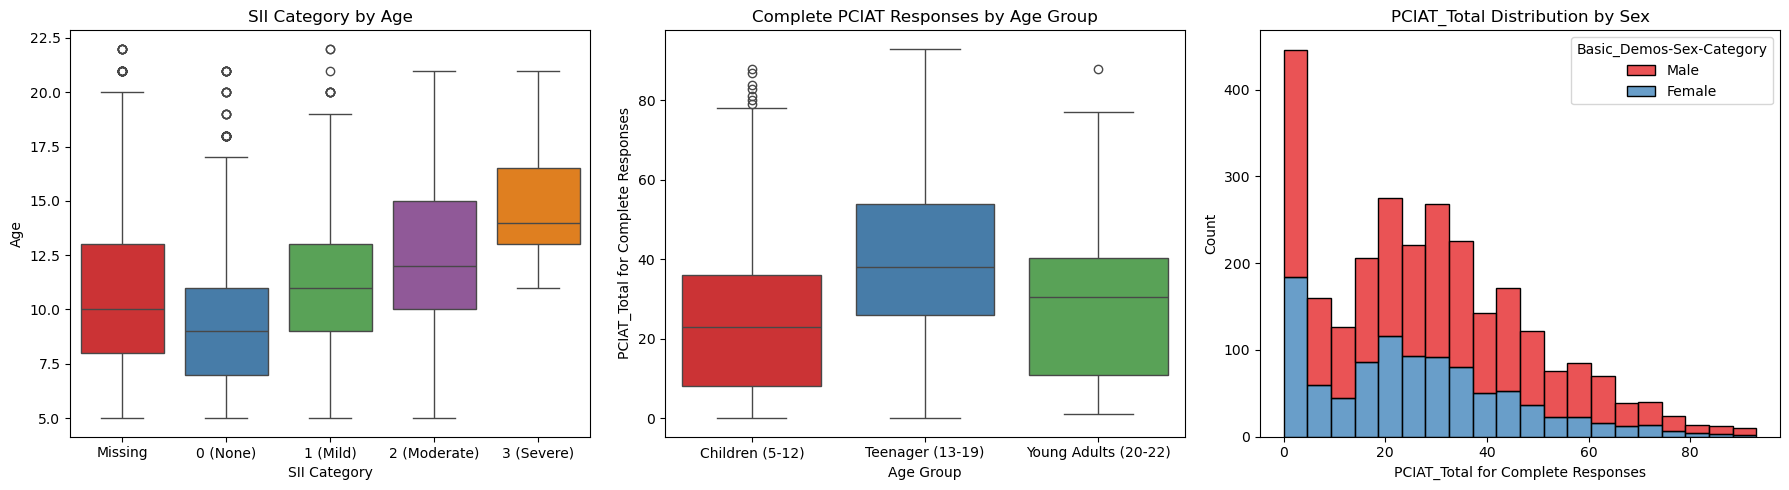

In [20]:
# Define the order for sii category
sii_order = ['Missing', '0 (None)', '1 (Mild)', '2 (Moderate)', '3 (Severe)']

# Specify the order of sii category
train_df['sii category'] = pd.Categorical(train_df['sii category'], categories=sii_order, ordered=True)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# SII Category by Age
sns.boxplot(
    y=train_df['Basic_Demos-Age'], x=train_df['sii category'],
    ax=axes[0], hue=train_df['sii category'], palette="Set1", legend=False
)
axes[0].set_title('SII Category by Age')
axes[0].set_ylabel('Age')
axes[0].set_xlabel('SII Category')

# Complete PCIAT Responses by Age Group
sns.boxplot(
    x='Age Group', y='PCIAT-PCIAT_Total',
    data=train_df, hue='Age Group', palette="Set1", ax=axes[1], legend=False
)
axes[1].set_title('Complete PCIAT Responses by Age Group')
axes[1].set_ylabel('PCIAT_Total for Complete Responses')
axes[1].set_xlabel('Age Group')

# PCIAT_Total by Sex
sns.histplot(
    data=train_df, x='PCIAT-PCIAT_Total',
    hue='Basic_Demos-Sex-Category', multiple='stack',
    palette="Set1", bins=20, ax=axes[2]
)
axes[2].set_title('PCIAT_Total Distribution by Sex')
axes[2].set_xlabel('PCIAT_Total for Complete Responses')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [21]:
# Define age groups and order for sii category
age_groups = ['Children (5-12)', 'Teenager (13-19)', 'Young Adults (20-22)']
sii_order = ['Missing', '0 (None)', '1 (Mild)', '2 (Moderate)', '3 (Severe)']

# Initialize a subplot figure with one row and three columns
fig = make_subplots(rows=1, cols=3, specs=[[{'type': 'pie'}, {'type': 'pie'}, {'type': 'pie'}]],
                    subplot_titles=[f'{age_group}' for age_group in age_groups],
                    horizontal_spacing=0.15)

# Loop through each age group and create a pie chart
for i, age_group in enumerate(age_groups):
    # Filter data for the current age group
    age_group_df = train_df[train_df['Age Group'] == age_group]
    
    # Count the distribution of sii category for the age group
    sii_counts = age_group_df['sii category'].value_counts().reindex(sii_order).reset_index()
    sii_counts.columns = ['sii category', 'count']
    
    # Add the pie chart to the subplot
    fig.add_trace(
        go.Pie(
            labels=sii_counts['sii category'],
            values=sii_counts['count'],
            textinfo='percent+label',
            marker=dict(colors=px.colors.qualitative.Set1)
        ),
        row=1, col=i+1
    )

# Update layout
fig.update_layout(title_text="Distribution of sii category by Age Group", 
                  title_x=0.5,
                  showlegend=False,
                  width=1000)

# Show the figure
fig.show()

In [22]:
stats = train_df.groupby(['Age Group', 'sii category'], observed=True).size().unstack()
stats_prop = stats.div(stats.sum(axis=1), axis=0) * 100
stats_table = stats.astype(str) +' (' + stats_prop.round(1).astype(str) + '%)'
stats_table['Total'] = stats.sum(axis=1)
stats_table

sii category              Missing      0 (None)     1 (Mild) 2 (Moderate)  \
Age Group                                                                   
Children (5-12)       850 (29.1%)  1360 (46.6%)  499 (17.1%)   204 (7.0%)   
Teenager (13-19)      340 (34.7%)   217 (22.1%)  223 (22.8%)  172 (17.6%)   
Young Adults (20-22)   37 (60.7%)    12 (19.7%)    8 (13.1%)     3 (4.9%)   

sii category         3 (Severe)  Total  
Age Group                               
Children (5-12)        6 (0.2%)   2919  
Teenager (13-19)      28 (2.9%)    980  
Young Adults (20-22)   1 (1.6%)     61

- Higher sii scores are generally associated with older age groups.
- There is an increasing-decreasing trend seen in the box plots of PCIAT_Total scores with age groups indicating that the peak of internet-related problems occur during teenage period.
- Based on the pie-chart, 
    - sii scores are more skewed towards the None and Mild categories.
    - Young adults have a significant missingness.
    - Teenagers seem to have more balanced categories.

## Internet Use

In [23]:
print(f"Number of missingness in Computer Internet hours per day is {train_df['PreInt_EduHx-computerinternet_hoursday'].isnull().sum()}.")
print(f"And its percentage is {train_df['PreInt_EduHx-computerinternet_hoursday'].isnull().sum()/train_df['PreInt_EduHx-computerinternet_hoursday'].shape[0]}.")
print(f"And its unique values are {train_df['PreInt_EduHx-computerinternet_hoursday'].unique()}")

train_df['internet_use_encoded'] = train_df[
    'PreInt_EduHx-computerinternet_hoursday'
].map({
    0: '< 1h/day',
    1: '~ 1h/day',
    2: '~ 2hs/day',
    3: '> 3hs/day'
}).fillna('Missing')

train_df['internet_use_encoded'] = pd.Categorical(
    train_df['internet_use_encoded'], categories=['Missing', '< 1h/day', '~ 1h/day', '~ 2hs/day', '> 3hs/day'],
    ordered=True
)

help_stat_func(train_df, 'PreInt_EduHx-computerinternet_hoursday')

Number of missingness in Computer Internet hours per day is 659.
And its percentage is 0.1664141414141414.
And its unique values are [ 3.  0.  2. nan  1.]


PreInt_EduHx-computerinternet_hoursday count (%)
PreInt_EduHx-computerinternet_hoursday                                                 
3.0                                                                         360 (9.09%)
0.0                                                                       1524 (38.48%)
2.0                                                                       1004 (25.35%)
NaN                                                                        659 (16.64%)
1.0                                                                        413 (10.43%)

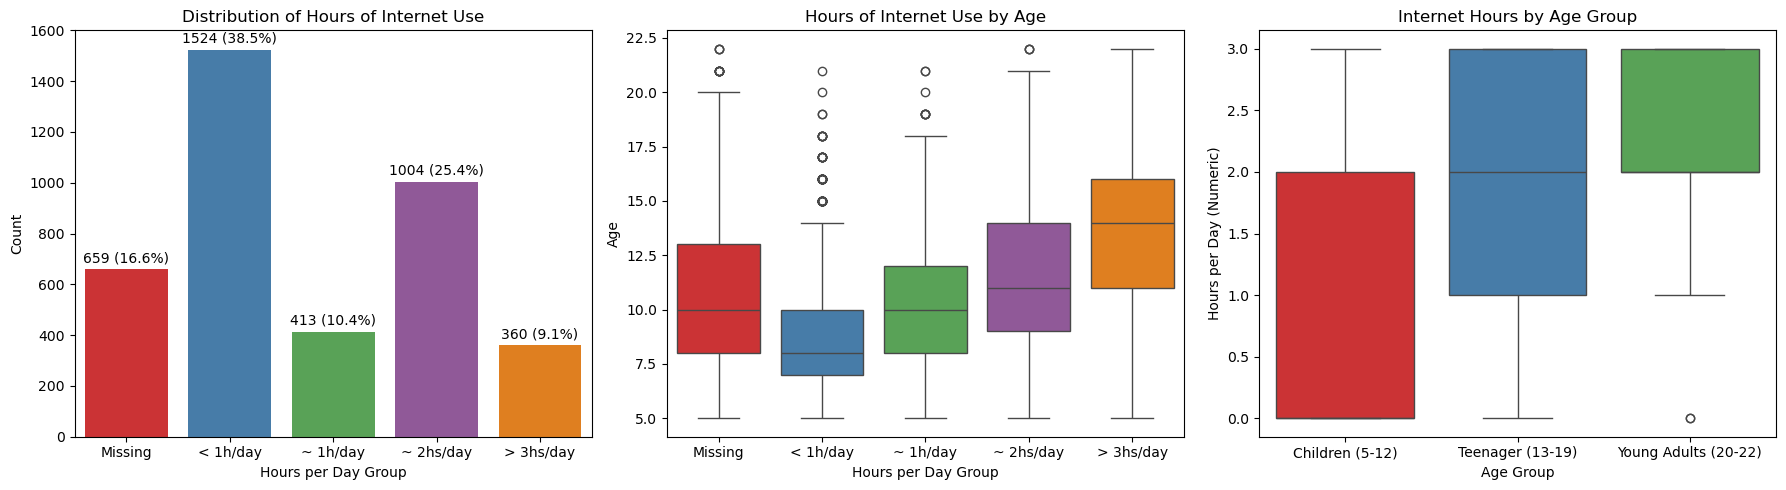

In [24]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Hours of Internet Use
ax1 = sns.countplot(x='internet_use_encoded', hue='internet_use_encoded', data=train_df, palette="Set1", ax=axes[0], legend=False)
axes[0].set_title('Distribution of Hours of Internet Use')
axes[0].set_xlabel('Hours per Day Group')
axes[0].set_ylabel('Count')

total = len(train_df['internet_use_encoded'])
for p in ax1.patches:
    count = int(p.get_height())
    percentage = '{:.1f}%'.format(100 * count / total)
    ax1.annotate(f'{count} ({percentage})', (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                 textcoords='offset points')

# Hours of Internet Use by Age
sns.boxplot(y='Basic_Demos-Age', x='internet_use_encoded', hue='internet_use_encoded', data=train_df, ax=axes[1], palette="Set1")
axes[1].set_title('Hours of Internet Use by Age')
axes[1].set_ylabel('Age')
axes[1].set_xlabel('Hours per Day Group')

# Hours of Internet Use (numeric) by Age Group
sns.boxplot(y='PreInt_EduHx-computerinternet_hoursday', x='Age Group', hue='Age Group', data=train_df, ax=axes[2], palette="Set1")
axes[2].set_title('Internet Hours by Age Group')
axes[2].set_ylabel('Hours per Day (Numeric)')
axes[2].set_xlabel('Age Group')

plt.tight_layout()
plt.show()


In [25]:
stats = train_df.groupby(['Age Group', 'internet_use_encoded'], observed=False).size().unstack(fill_value=0)

# Creating a subplot with 1 row and 3 columns for each age group
fig = make_subplots(rows=1, cols=len(stats.index), subplot_titles=stats.index,
    specs=[[{'type': 'pie'} for _ in range(len(stats.index))]],
    horizontal_spacing=0.1
)

# Loop through each age group and add a pie chart in the correct subplot position
for i, age_group in enumerate(stats.index):
    group_counts = stats.loc[age_group]
    fig.add_trace(
        go.Pie(
            labels=group_counts.index,
            values=group_counts,
            textinfo='percent+label',
            marker=dict(colors=px.colors.qualitative.Set1)
        ),
        row=1, col=i + 1
    )

# Update layout for titles and figure size
fig.update_layout(
    title_text="Distribution of Hours of Internet Use by Age Group",
    height=400,
    width=1000,
    showlegend=False
)

fig.show()

In [26]:
print(f"Non-NA Rows - Internet use 3h or more: {(train_df['PreInt_EduHx-computerinternet_hoursday'] == 3).sum()/(train_df['PreInt_EduHx-computerinternet_hoursday'].notna().sum()) * 100:.2f}%")
print(f"Non-NA Rows - Internet use 1h or less: {(train_df['PreInt_EduHx-computerinternet_hoursday'] == 0).sum()/(train_df['PreInt_EduHx-computerinternet_hoursday'].notna().sum()) * 100:.2f}%")

Non-NA Rows - Internet use 3h or more: 10.91%
Non-NA Rows - Internet use 1h or less: 46.17%


In [27]:
stats = train_df.groupby(['Basic_Demos-Sex-Category', 'internet_use_encoded'], observed=True).size().unstack(fill_value=0)
stats_prop = stats.div(stats.sum(axis=1), axis=0) * 100
stats_table = stats.astype(str) +' (' + stats_prop.round(1).astype(str) + '%)'
stats_table['Total'] = stats.sum(axis=1)
stats_table

internet_use_encoded          Missing     < 1h/day     ~ 1h/day    ~ 2hs/day  \
Basic_Demos-Sex-Category                                                       
Female                    271 (18.4%)  569 (38.6%)   139 (9.4%)  353 (23.9%)   
Male                      388 (15.6%)  955 (38.4%)  274 (11.0%)  651 (26.2%)   

internet_use_encoded       > 3hs/day  Total  
Basic_Demos-Sex-Category                     
Female                    144 (9.8%)   1476  
Male                      216 (8.7%)   2484

- Based on the bar plots, 16.6% of the Internet usage data is missing. 38.5% of samples used the Internet less than hour a day.
- Box plots shows that higher daily internet use is correlated with older age. However, considerable overlap in age ranges within each Internet usage category is observed.
- The pie charts for age groups are well aligned and shows the same.
- Creating a new feature based on combining the Internet use and age can be potentially usefull for modeling.
- Internet use in both genders is almost similar.

In [28]:
stats = train_df[train_df['sii'].notna()].groupby(['internet_use_encoded', 'sii category'], observed=True).size().unstack(fill_value=0)
stats_prop = stats.div(stats.sum(axis=1), axis=0) * 100
stats = stats.astype(str) +' (' + stats_prop.round(1).astype(str) + '%)'
stats

sii category             0 (None)     1 (Mild) 2 (Moderate) 3 (Severe)
internet_use_encoded                                                  
Missing                52 (63.4%)   15 (18.3%)   15 (18.3%)   0 (0.0%)
< 1h/day              935 (73.8%)  249 (19.7%)    78 (6.2%)   5 (0.4%)
~ 1h/day              160 (47.1%)  124 (36.5%)   54 (15.9%)   2 (0.6%)
~ 2hs/day             367 (46.9%)  255 (32.6%)  148 (18.9%)  12 (1.5%)
> 3hs/day              75 (28.6%)   87 (33.2%)   84 (32.1%)  16 (6.1%)

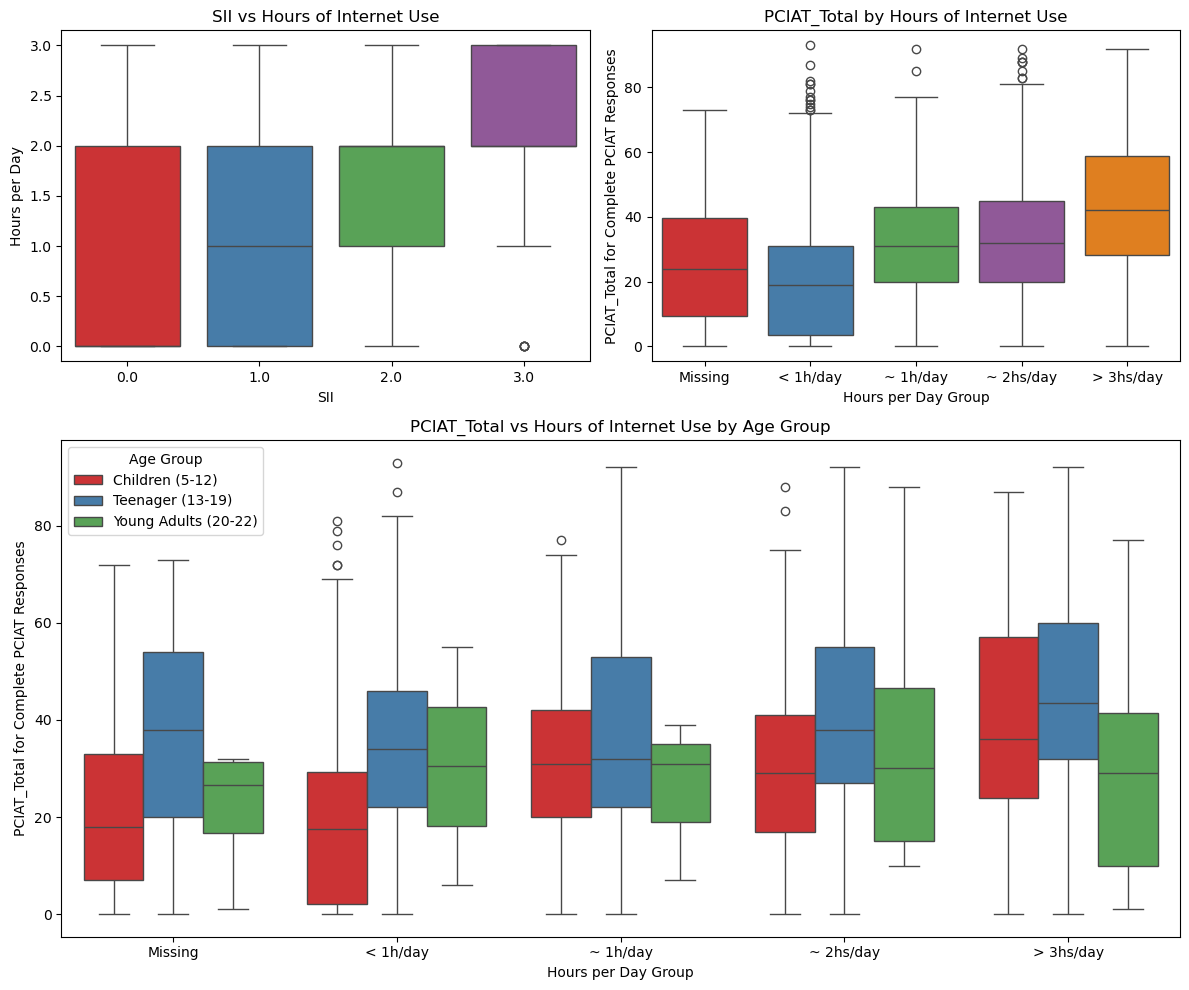

In [29]:
fig = plt.figure(figsize=(12, 10))
gs = fig.add_gridspec(2, 2, height_ratios=[1, 1.5])

# SII vs Hours of Internet Use
ax1 = fig.add_subplot(gs[0, 0])
sns.boxplot(x='sii', y='PreInt_EduHx-computerinternet_hoursday',
    data=train_df, ax=ax1, hue='sii', palette="Set1"
)
ax1.set_title('SII vs Hours of Internet Use')
ax1.set_ylabel('Hours per Day')
ax1.set_xlabel('SII')
ax1.legend_.remove()

# PCIAT_Total for Complete PCIAT Responses by Hours of Internet Use
ax2 = fig.add_subplot(gs[0, 1])
sns.boxplot(
    x='internet_use_encoded', y='PCIAT-PCIAT_Total',
    data=train_df, hue='internet_use_encoded',
    palette="Set1", ax=ax2
)
ax2.set_title('PCIAT_Total by Hours of Internet Use')
ax2.set_ylabel('PCIAT_Total for Complete PCIAT Responses')
ax2.set_xlabel('Hours per Day Group')


# SII vs Hours of Internet Use by Age Group (Full width)
ax3 = fig.add_subplot(gs[1, :])
sns.boxplot(
    x='internet_use_encoded', y='PCIAT-PCIAT_Total',
    data=train_df,
    hue='Age Group', ax=ax3, palette="Set1"
)
ax3.set_title('PCIAT_Total vs Hours of Internet Use by Age Group')
ax3.set_ylabel('PCIAT_Total for Complete PCIAT Responses')
ax3.set_xlabel('Hours per Day Group')

plt.tight_layout()
plt.show()

In [30]:
stats = train_df[train_df['sii'].notna()].groupby(['sii category', 'internet_use_encoded'], observed=True).size().unstack(fill_value=0)
stats

internet_use_encoded  Missing  < 1h/day  ~ 1h/day  ~ 2hs/day  > 3hs/day
sii category                                                           
0 (None)                   52       935       160        367         75
1 (Mild)                   15       249       124        255         87
2 (Moderate)               15        78        54        148         84
3 (Severe)                  0         5         2         12         16

In [31]:
# Data preparation
stats = train_df[train_df['sii'].notna()].groupby(['sii category', 'internet_use_encoded'], observed=True).size().unstack(fill_value=0)

# Creating a subplot with 1 row and as many columns as sii categories
fig = make_subplots(
    rows=1, cols=len(stats.index),
    subplot_titles=[f'SII = {sii_group}' for sii_group in stats.index],
    specs=[[{'type': 'pie'} for _ in range(len(stats.index))]],
    horizontal_spacing=0.1
)

# Loop through each SII group and add a pie chart in the correct subplot position
for i, sii_group in enumerate(stats.index):
    group_counts = stats.loc[sii_group] / stats.loc[sii_group].sum()
    fig.add_trace(
        go.Pie(
            labels=group_counts.index,
            values=group_counts,
            textinfo='percent+label',
            marker=dict(colors=px.colors.qualitative.Set1),
            hole=0  # Adjust if you prefer a donut chart
        ),
        row=1, col=i + 1
    )

# Update layout for titles and figure size
fig.update_layout(
    title_text="Distribution of Hours of Internet Use by SII Group",
    height=500,
    width=1200,
    showlegend=False
)

fig.show()

In [32]:
stats = train_df[train_df['sii'].notna()].groupby(
    ['sii', 'internet_use_encoded'], observed=True
).size().unstack(fill_value=0)
stats_prop = stats.div(stats.sum(axis=1), axis=0) * 100

stats = stats.astype(str) +' (' + stats_prop.round(1).astype(str) + '%)'
stats

internet_use_encoded    Missing     < 1h/day     ~ 1h/day    ~ 2hs/day  \
sii                                                                      
0.0                   52 (3.3%)  935 (58.8%)  160 (10.1%)  367 (23.1%)   
1.0                   15 (2.1%)  249 (34.1%)  124 (17.0%)  255 (34.9%)   
2.0                   15 (4.0%)   78 (20.6%)   54 (14.2%)  148 (39.1%)   
3.0                    0 (0.0%)    5 (14.3%)     2 (5.7%)   12 (34.3%)   

internet_use_encoded   > 3hs/day  
sii                               
0.0                    75 (4.7%)  
1.0                   87 (11.9%)  
2.0                   84 (22.2%)  
3.0                   16 (45.7%)

- In the box plots, despite the considerable overlap between the different SII and internet use categories, we see a positive trend between PIU impairment and internet use, with people with higher SII scores spending more time online.

- However, when the relationship between PCIAT_Total and hours of Internet use is further broken down by age group (bottom boxplot), the non-linear relationship between age, Internet use and PCIAT_Total score emerges, with adolescents standing out as the most affected age group across all categories of Internet use.

- The pie charts also show that there is a significant proportion of participants (83 in total), of all ages, who spend very little time online (less than 1 hour per day) but have high SII scores (20.7% with SII 2 - moderately impaired and 14.7% with SII = 3 - severely impaired).

## EDA for other features

In [33]:
groups = data_dictionary.groupby('Instrument')['Field'].apply(list).to_dict()
for instrument, features in groups.items():
    print(f"{instrument}: {features}\n")

Bio-electric Impedance Analysis: ['BIA-Season', 'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW']

Children's Global Assessment Scale: ['CGAS-Season', 'CGAS-CGAS_Score']

Demographics: ['Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex']

FitnessGram Child: ['FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND', 'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU', 'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR', 'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone']

FitnessGram Vitals and Treadmill: ['Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec']

Identifier: ['id']

Internet Use: ['PreInt_EduHx-Season', 'PreInt_EduHx-computerinternet_hoursday']

P

### Side note on the season-related columns

The presence of different season-related columns reflects the timing of data collection or participation in the study. Seasonal changes may play a significant role in the variables being measured (e.g., fitness, physical activity, sleep patterns, and of course internet usage).

In [34]:
season_columns = [col for col in train_df.columns if 'Season' in col]
season_df = train_df[season_columns]
train_df[season_columns] = train_df[season_columns].fillna("Missing")
season_df.head()

Basic_Demos-Enroll_Season CGAS-Season Physical-Season  \
0                      Fall      Winter            Fall   
1                    Summer         NaN            Fall   
2                    Summer        Fall            Fall   
3                    Winter        Fall          Summer   
4                    Spring      Summer             NaN   

  Fitness_Endurance-Season FGC-Season BIA-Season PAQ_A-Season PAQ_C-Season  \
0                      NaN       Fall       Fall          NaN          NaN   
1                      NaN       Fall     Winter          NaN         Fall   
2                     Fall       Fall        NaN          NaN       Summer   
3                   Summer     Summer     Summer          NaN       Winter   
4                      NaN        NaN        NaN       Summer          NaN   

  PCIAT-Season SDS-Season PreInt_EduHx-Season  
0         Fall        NaN                Fall  
1         Fall       Fall              Summer  
2         Fall       Fall              Summer  
3       Summer     Summer              Winter  
4          NaN        NaN                 NaN

In [35]:
train_df[season_columns] = train_df[season_columns].fillna("Missing")

In [36]:
# Remove target-related columns
data_dictionary = data_dictionary[data_dictionary['Instrument'] != 'Parent-Child Internet Addiction Test']
continuous_cols = data_dictionary[data_dictionary['Type'].str.contains(
    'float|int', case=False
)]['Field'].tolist()

# target = train[['sii']]
# train = train.drop(columns = columns_not_in_test)

## Demographics EDA

In [37]:
groups.get('Demographics', [])
# Create a subplot layout
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'pie'}, {'type': 'xy'}]],
    subplot_titles=['Season of Enrollment', 'Age Distribution by Sex']
)

# Plot 1: Season of Enrollment (Pie Chart)
season_counts = train_df['Basic_Demos-Enroll_Season'].value_counts(dropna=False).reset_index()
season_counts.columns = ['Season', 'Count']
season_counts['Percentage'] = 100 * season_counts['Count'] / season_counts['Count'].sum()

fig.add_trace(
    go.Pie(
        labels=season_counts['Season'],
        values=season_counts['Count'],
        hoverinfo='label+percent+value',
        marker=dict(colors=px.colors.qualitative.Set1),
    ),
    row=1, col=1
)

# Plot 2: Age Distribution by Sex (Histogram)
fig_hist = px.histogram(
    train_df,
    x='Basic_Demos-Age',
    color='Basic_Demos-Sex-Category',
    nbins=20,
    title='Age Distribution by Sex',
    labels={'Basic_Demos-Age': 'Age', 'count': 'Count', 'Basic_Demos-Sex-Category': 'Sex'},
    color_discrete_sequence=px.colors.qualitative.Set1,
    barmode='overlay',
)
# Update histogram axes titles
fig_hist.update_xaxes(title_text='Age')
fig_hist.update_yaxes(title_text='Count')

# Add histogram trace to subplot
for trace in fig_hist.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout
fig.update_layout(
    title_text="EDA: Demographics",
    title_x=0.5,
    showlegend=True,
    width=700
)

# Show the figure
fig.show()

- The distribution of enrollment by season is relatively balanced.

- There is a higher number of males (0) across most age groups, with fewer females (1) particularly visible in younger age groups.

## Children's Global Assessment Scale EDA

In [38]:
groups.get("Children's Global Assessment Scale", [])
data = train_df[train_df['CGAS-CGAS_Score'].notnull()]
age_range = data['Basic_Demos-Age']
print(
    f"Age range for participants with CGAS-CGAS_Score data:"
    f" {age_range.min()} - {age_range.max()} years"
)

Age range for participants with CGAS-CGAS_Score data: 5 - 22 years


In [39]:
stat = train_df['CGAS-CGAS_Score'].describe().to_frame().transpose()
stat['missing'] = train_df['CGAS-CGAS_Score'].isnull().sum()
stat

count       mean        std   min   25%   50%   75%    max  \
CGAS-CGAS_Score  2421.0  65.454771  22.341862  25.0  59.0  65.0  75.0  999.0   

                 missing  
CGAS-CGAS_Score     1539

In [40]:
train_df[train_df['CGAS-CGAS_Score'] > 100]

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
2065  83525bbe                      Fall               11                1   

     CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  \
2065      Winter            999.0            Fall           NaN   

      Physical-Height  Physical-Weight  Physical-Waist_Circumference  \
2065              NaN              NaN                           NaN   

      Physical-Diastolic_BP  Physical-HeartRate  Physical-Systolic_BP  \
2065                    NaN                 NaN                   NaN   

     Fitness_Endurance-Season  Fitness_Endurance-Max_Stage  \
2065                     Fall                          NaN   

      Fitness_Endurance-Time_Mins  Fitness_Endurance-Time_Sec FGC-Season  \
2065                          NaN                         NaN       Fall   

      FGC-FGC_CU  FGC-FGC_CU_Zone  FGC-FGC_GSND  FGC-FGC_GSND_Zone  \
2065         NaN              NaN           NaN                NaN   

      FGC-FGC_GSD  FGC-FGC_GSD_Zone  FGC-FGC_PU  FGC-FGC_PU_Zone  FGC-FGC_SRL  \
2065          NaN               NaN         NaN              NaN          NaN   

      FGC-FGC_SRL_Zone  FGC-FGC_SRR  FGC-FGC_SRR_Zone  FGC-FGC_TL  \
2065               NaN          NaN               NaN         NaN   

      FGC-FGC_TL_Zone BIA-Season  BIA-BIA_Activity_Level_num  BIA-BIA_BMC  \
2065              NaN    Missing                         NaN          NaN   

      BIA-BIA_BMI  BIA-BIA_BMR  BIA-BIA_DEE  BIA-BIA_ECW  BIA-BIA_FFM  \
2065          NaN          NaN          NaN          NaN          NaN   

      BIA-BIA_FFMI  BIA-BIA_FMI  BIA-BIA_Fat  BIA-BIA_Frame_num  BIA-BIA_ICW  \
2065           NaN          NaN          NaN                NaN          NaN   

      BIA-BIA_LDM  BIA-BIA_LST  BIA-BIA_SMM  BIA-BIA_TBW PAQ_A-Season  \
2065          NaN          NaN          NaN          NaN      Missing   

      PAQ_A-PAQ_A_Total PAQ_C-Season  PAQ_C-PAQ_C_Total PCIAT-Season  \
2065                NaN         Fall              2.241      Missing   

      PCIAT-PCIAT_01  PCIAT-PCIAT_02  PCIAT-PCIAT_03  PCIAT-PCIAT_04  \
2065             NaN             NaN             NaN             NaN   

      PCIAT-PCIAT_05  PCIAT-PCIAT_06  PCIAT-PCIAT_07  PCIAT-PCIAT_08  \
2065             NaN             NaN             NaN             NaN   

      PCIAT-PCIAT_09  PCIAT-PCIAT_10  PCIAT-PCIAT_11  PCIAT-PCIAT_12  \
2065             NaN             NaN             NaN             NaN   

      PCIAT-PCIAT_13  PCIAT-PCIAT_14  PCIAT-PCIAT_15  PCIAT-PCIAT_16  \
2065             NaN             NaN             NaN             NaN   

      PCIAT-PCIAT_17  PCIAT-PCIAT_18  PCIAT-PCIAT_19  PCIAT-PCIAT_20  \
2065             NaN             NaN             NaN             NaN   

      PCIAT-PCIAT_Total SDS-Season  SDS-SDS_Total_Raw  SDS-SDS_Total_T  \
2065                NaN    Missing                NaN              NaN   

     PreInt_EduHx-Season  PreInt_EduHx-computerinternet_hoursday  sii  \
2065                Fall                                     3.0  NaN   

     sii category        Age Group Basic_Demos-Sex-Category  \
2065      Missing  Children (5-12)                   Female   

     internet_use_encoded  
2065            > 3hs/day

There is one extreme value outlier (CGAS-CGAS_Score = 999), which is obviously an error.

In [41]:
train_df.loc[train_df['CGAS-CGAS_Score'] == 999, 'CGAS-CGAS_Score'] = np.nan

In [42]:
# Create a subplot layout
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'pie'}, {'type': 'xy'}]],
    subplot_titles=['CGAS-Season', 'CGAS-CGAS_Score (Without Outlier)']
)

# Plot 1: CGAS-Season (Pie Chart)
cgas_season_counts = train_df['CGAS-Season'].value_counts(normalize=True).reset_index()
cgas_season_counts.columns = ['Season', 'Proportion']
cgas_season_counts['Percentage'] = cgas_season_counts['Proportion'] * 100

fig.add_trace(
    go.Pie(
        labels=cgas_season_counts['Season'],
        values=cgas_season_counts['Proportion'],
        hoverinfo='label+percent',
        textinfo='percent',
        marker=dict(colors=px.colors.qualitative.Set1),
    ),
    row=1, col=1
)

# Plot 2: CGAS-CGAS_Score (Histogram without outliers)
fig_hist = px.histogram(
    train_df,
    x='CGAS-CGAS_Score',
    title='CGAS-CGAS_Score (Without Outlier)',
    nbins=20,
    labels={'CGAS-CGAS_Score': 'CGAS Score', 'count': 'Count'},
)
# Exclude NaN and ensure only cleaned values are plotted
fig_hist.update_traces(xbins_size=5)
fig_hist.update_layout(showlegend=False)
fig_hist.update_traces(marker_color=px.colors.qualitative.Set1[1])

# Add histogram trace to subplot
for trace in fig_hist.data:
    fig.add_trace(trace, row=1, col=2)

# Update layout
fig.update_layout(
    title_text="EDA: CGAS Analysis",
    title_x=0.5,
    showlegend=True,
    width=800
)

# Adjust axis labels
fig.update_xaxes(title_text='CGAS Score', row=1, col=2)
fig.update_yaxes(title_text='Count', row=1, col=2)

# Show the figure
fig.show()

In [43]:
stat = train_df['CGAS-CGAS_Score'].describe().to_frame().transpose()
stat['missing'] = train_df['CGAS-CGAS_Score'].isnull().sum()
stat

count       mean       std   min   25%   50%   75%   max  \
CGAS-CGAS_Score  2420.0  65.069008  11.78731  25.0  59.0  65.0  75.0  95.0   

                 missing  
CGAS-CGAS_Score     1540

- CGAS is a rating of general functioning for children and young people aged 4-16 years old. The CGAS asks the clinician to rate the child from 1 to 100 based on their lowest level of functioning, regardless of treatment or prognosis, over a specified time period.

- Since the CGAS is a measure of general functioning, and the SII reflects the severity of the impact of Internet use on that functioning, it is to be expected that this feature, along with Internet use, to be the most important in predicting the SII.

In [44]:
# Define bins and labels
bins = np.arange(0, 101, 10)
labels = [
    "1-10: Needs constant supervision (24 hour care)",
    "11-20: Needs considerable supervision",
    "21-30: Unable to function in almost all areas",
    "31-40: Major impairment in functioning in several areas",
    "41-50: Moderate degree of interference in functioning",
    "51-60: Variable functioning with sporadic difficulties",
    "61-70: Some difficulty in a single area",
    "71-80: No more than slight impairment in functioning",
    "81-90: Good functioning in all areas",
    "91-100: Superior functioning"
]

# Create CGAS score bins
train_df['CGAS_Score_Bin'] = pd.cut(
    train_df['CGAS-CGAS_Score'], bins=bins, labels=labels
)

# Count occurrences and calculate percentages
counts = train_df['CGAS_Score_Bin'].value_counts().reindex(labels)
prop = (counts / counts.sum() * 100).round(1)
count_prop_labels = counts.astype(str) + " (" + prop.astype(str) + "%)"

# Create the horizontal bar chart
fig = go.Figure()

fig.add_trace(
    go.Bar(
        y=labels,
        x=counts,
        orientation='h',
        text=count_prop_labels,
        textposition='outside',
        marker=dict(color=px.colors.qualitative.Set1[1])
    )
)

# Update layout
fig.update_layout(
    title_text="CGAS Score Distribution",
    title_x=0.5,
    xaxis_title="Count",
    yaxis_title="CGAS Score Bin",
    yaxis=dict(
        categoryorder='array',
        categoryarray=labels[::-1],  # Reverse for descending order
    ),
    height=600,
)

# Show the figure
fig.show()

- The majority of individuals have CGAS scores between 51-80 (79.7%), i.e. sporadic difficulties to only slight impairments

- Two participants have extreme difficulty in functioning.

In [45]:
train_df.head()

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1     Missing              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN         Missing           NaN              NaN   

   Physical-Weight  Physical-Waist_Circumference  Physical-Diastolic_BP  \
0             50.8                           NaN                    NaN   
1             46.0                          22.0                   75.0   
2             75.6                           NaN                   65.0   
3             81.6                           NaN                   60.0   
4              NaN                           NaN                    NaN   

   Physical-HeartRate  Physical-Systolic_BP Fitness_Endurance-Season  \
0                 NaN                   NaN                  Missing   
1                70.0                 122.0                  Missing   
2                94.0                 117.0                     Fall   
3                97.0                 117.0                   Summer   
4                 NaN                   NaN                  Missing   

   Fitness_Endurance-Max_Stage  Fitness_Endurance-Time_Mins  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          5.0                          7.0   
3                          6.0                          9.0   
4                          NaN                          NaN   

   Fitness_Endurance-Time_Sec FGC-Season  FGC-FGC_CU  FGC-FGC_CU_Zone  \
0                         NaN       Fall         0.0              0.0   
1                         NaN       Fall         3.0              0.0   
2                        33.0       Fall        20.0              1.0   
3                        37.0     Summer        18.0              1.0   
4                         NaN    Missing         NaN              NaN   

   FGC-FGC_GSND  FGC-FGC_GSND_Zone  FGC-FGC_GSD  FGC-FGC_GSD_Zone  FGC-FGC_PU  \
0           NaN                NaN          NaN               NaN         0.0   
1           NaN                NaN          NaN               NaN         5.0   
2          10.2                1.0         14.7               2.0         7.0   
3           NaN                NaN          NaN               NaN         5.0   
4           NaN                NaN          NaN               NaN         NaN   

   FGC-FGC_PU_Zone  FGC-FGC_SRL  FGC-FGC_SRL_Zone  FGC-FGC_SRR  \
0              0.0          7.0               0.0          6.0   
1              0.0         11.0               1.0         11.0   
2              1.0         10.0               1.0         10.0   
3              0.0          7.0               0.0          7.0   
4              NaN          NaN               NaN          NaN   

   FGC-FGC_SRR_Zone  FGC-FGC_TL  FGC-FGC_TL_Zone BIA-Season  \
0               0.0         6.0              1.0       Fall   
1               1.0         3.0              0.0     Winter   
2               1.0         5.0              0.0    Missing   
3               0.0         7.0              1.0     Summer   
4               NaN         NaN              NaN    Missing   

   BIA-BIA_Activity_Level_num  BIA-BIA_BMC  BIA-BIA_BMI  BIA-BIA_BMR  \
0                         2.0     

/var/folders/w0/zjn_yl050qn4kdvrggtg30sh0000gn/T/ipykernel_27435/3784400218.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/w0/zjn_yl050qn4kdvrggtg30sh0000gn/T/ipykernel_27435/3784400218.py:22: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



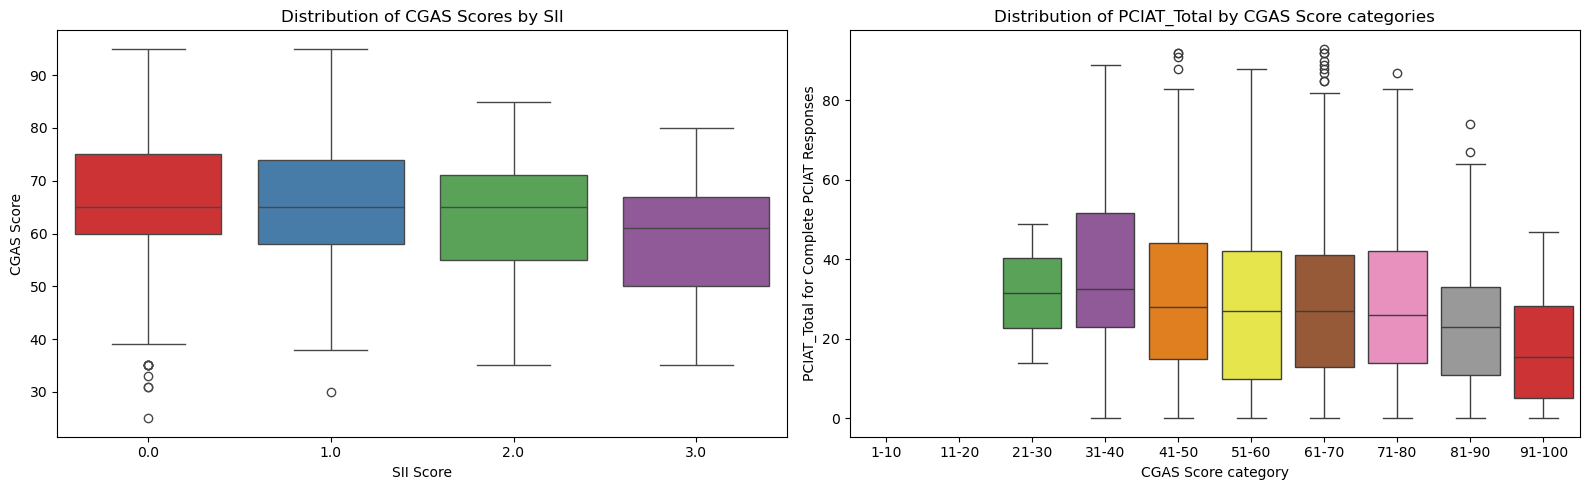

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# CGAS-CGAS_Score vs sii
sns.boxplot(
    data=train_df,
    x='sii', y='CGAS-CGAS_Score',
    palette='Set1', ax=axes[0], hue='sii', legend=False
)
axes[0].set_xlabel('SII Score')
axes[0].set_ylabel('CGAS Score')
axes[0].set_title('Distribution of CGAS Scores by SII')

# complete_resp_total vs CGAS_Score_Bin
sns.boxplot(
    data=train_df,
    x='CGAS_Score_Bin', y='PCIAT-PCIAT_Total',
    ax=axes[1], palette='Set1'
)

# Get the tick positions and match the labels
range_labels = [label.split(":")[0] for label in train_df['CGAS_Score_Bin'].cat.categories]
axes[1].set_xticklabels(range_labels)

axes[1].set_xlabel('CGAS Score category')
axes[1].set_ylabel('PCIAT_Total for Complete PCIAT Responses')
axes[1].set_title('Distribution of PCIAT_Total by CGAS Score categories')

plt.tight_layout()
plt.show()

- I would expect the higher the SII, the lower the median CGAS score, but the decrease is very small here.

- However, there are no participants with the highest SII scores (3 or severely problematic internet use) who have good CGAS scores (81-100: good/superior functioning in all domains). This suggests that parental responses to the PCIAT questionnaire (our target variable) may reflect some effects of PIU on global health and functioning.

## Physical Measures EDA

In [47]:
groups.get('Physical Measures', [])

['Physical-Season',
 'Physical-BMI',
 'Physical-Height',
 'Physical-Weight',
 'Physical-Waist_Circumference',
 'Physical-Diastolic_BP',
 'Physical-HeartRate',
 'Physical-Systolic_BP']

In [48]:
# Example data preparation
features_physical = groups.get('Physical Measures', [])
cols = [col for col in features_physical if col in continuous_cols]

# Create a subplot layout
n_cols = 4
n_rows = len(cols) // n_cols + (1 if len(cols) % n_cols != 0 else 0)
fig = make_subplots(
    rows=n_rows,  # No additional row needed; pie chart goes in the last column of the last row
    cols=n_cols,
    subplot_titles=cols + ['Physical-Season'],
    specs=[
        [{"type": "xy"}] * n_cols for _ in range(n_rows - 1)
    ] + [
        [{"type": "xy"}] * (len(cols) % n_cols) + [{"type": "domain"}] + [None] * (n_cols - (len(cols) % n_cols + 1))
    ]
)

# Add histograms for physical measures
for i, col in enumerate(cols):
    row, col_idx = divmod(i, n_cols)
    hist = go.Histogram(x=train_df[col], nbinsx=30, name=col)
    fig.add_trace(hist, row=row + 1, col=col_idx + 1)

# Add pie chart for Physical-Season
season_counts = train_df['Physical-Season'].value_counts(dropna=False)
pie = go.Pie(
    labels=season_counts.index,
    values=season_counts,
    name='Physical-Season',
    textinfo='percent+label',
    marker=dict(colors=px.colors.qualitative.Set3),
    scalegroup='small'
)

# Place the pie chart in the last column of the last row
fig.add_trace(pie, row=n_rows, col=(len(cols) % n_cols) + 1)

# Update layout
fig.update_layout(
    height=300 * n_rows,
    width=1000,
    title_text='Histograms for Physical Measures and Physical-Season Pie Chart',
    title_y=0.98,
    title_x=0.5,
    showlegend=False
)

# Display the figure
fig.show()


In [49]:
stat = train_df[groups.get('Physical Measures', [])].describe().transpose()
stat['missing'] = train_df[groups.get('Physical Measures', [])].isnull().sum()
stat

count        mean        std   min        25%  \
Physical-BMI                  3022.0   19.331929   5.113934   0.0   15.86935   
Physical-Height               3027.0   55.946713   7.473764  33.0   50.00000   
Physical-Weight               3076.0   89.038615  44.569040   0.0   57.20000   
Physical-Waist_Circumference   898.0   27.278508   5.567287  18.0   23.00000   
Physical-Diastolic_BP         2954.0   69.648951  13.611226   0.0   61.00000   
Physical-HeartRate            2967.0   81.597236  13.665196  27.0   72.00000   
Physical-Systolic_BP          2954.0  116.983074  17.061225   0.0  107.00000   

                                     50%         75%         max  missing  
Physical-BMI                   17.937682   21.571244   59.132048      938  
Physical-Height                55.000000   62.000000   78.500000      933  
Physical-Weight                77.000000  113.800000  315.000000      884  
Physical-Waist_Circumference   26.000000   30.000000   50.000000     3062  
Physical-Diastolic_BP          68.000000   76.000000  179.000000     1006  
Physical-HeartRate             81.000000   90.500000  138.000000      993  
Physical-Systolic_BP          114.000000  125.000000  203.000000     1006

In [50]:
# Replace the zero values of the following features with nan as zero does not make sense physically
cols_with_zero_min = [
    'Physical-BMI', 'Physical-Weight',
    'Physical-Diastolic_BP', 'Physical-Systolic_BP'
]
train_df[cols_with_zero_min] = train_df[cols_with_zero_min].replace(0, np.nan)
stat = train_df[groups.get('Physical Measures', [])].describe().transpose()
stat['missing'] = train_df[groups.get('Physical Measures', [])].isnull().sum()
stat

count        mean        std        min  \
Physical-BMI                  3015.0   19.376812   5.034191   8.522436   
Physical-Height               3027.0   55.946713   7.473764  33.000000   
Physical-Weight               3015.0   90.840060  43.161374  31.800000   
Physical-Waist_Circumference   898.0   27.278508   5.567287  18.000000   
Physical-Diastolic_BP         2953.0   69.672536  13.553022  11.000000   
Physical-HeartRate            2967.0   81.597236  13.665196  27.000000   
Physical-Systolic_BP          2953.0  117.022689  16.927687  49.000000   

                                     25%         50%         75%         max  \
Physical-BMI                   15.890526   17.950925   21.588631   59.132048   
Physical-Height                50.000000   55.000000   62.000000   78.500000   
Physical-Weight                58.200000   77.800000  114.300000  315.000000   
Physical-Waist_Circumference   23.000000   26.000000   30.000000   50.000000   
Physical-Diastolic_BP          61.000000   68.000000   76.000000  179.000000   
Physical-HeartRate             72.000000   81.000000   90.500000  138.000000   
Physical-Systolic_BP          107.000000  114.000000  125.000000  203.000000   

                              missing  
Physical-BMI                      945  
Physical-Height                   933  
Physical-Weight                   945  
Physical-Waist_Circumference     3062  
Physical-Diastolic_BP            1007  
Physical-HeartRate                993  
Physical-Systolic_BP             1007

In [51]:
fig = make_subplots(rows=1, cols=3, subplot_titles=[
    'Physical-Weight by Age',
    'Physical-Height by Age',
    'Waist Circumference vs Weight'
])

fig.add_trace(
    go.Scatter(x=train_df['Basic_Demos-Age'], y=train_df['Physical-Weight'], mode='markers', name='Weight by Age'),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=train_df['Basic_Demos-Age'], y=train_df['Physical-Height'], mode='markers', name='Height by Age'),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=train_df['Physical-Weight'], y=train_df['Physical-Waist_Circumference'], mode='markers', name='Waist vs Weight'),
    row=1, col=3
)

fig.update_layout(
    title='Physical Measurements Visualization',
    height=500,
    width=1000,
    showlegend=False,
    template='plotly_white'
)

fig.update_xaxes(title_text='Age', row=1, col=1)
fig.update_yaxes(title_text='Weight (kg)', row=1, col=1)

fig.update_xaxes(title_text='Age', row=1, col=2)
fig.update_yaxes(title_text='Height (cm)', row=1, col=2)

fig.update_xaxes(title_text='Weight (kg)', row=1, col=3)
fig.update_yaxes(title_text='Waist Circumference (cm)', row=1, col=3)

fig.show()

- There are individuals who are unusually tall for their age group or who are extremely overweight.

- There are also a few outliers in the waist circumference measurements, which are possible artifacts (e.g. 100 cm for a weight of 40 kg).

- The problem with data cleaning here is that we cannot guess which of the data is correct. For example, we may see an unrealistic combination of a waist circumference of 100cm and a weight of 40kg for a participant, but where is the error in the waist circumference or the weight? Or a height of around 175cm for a child of 7 has the height or age been entered incorrectly? Or this is true data and the child has gigantism or another disorder related to the growth hormone?

In [52]:
bp_hr_cols = [
    'Physical-Diastolic_BP', 'Physical-Systolic_BP',
    'Physical-HeartRate'
]
train_df[train_df['Physical-Systolic_BP'] <= train_df['Physical-Diastolic_BP']][bp_hr_cols]

Physical-Diastolic_BP  Physical-Systolic_BP  Physical-HeartRate
1140                  179.0                 139.0               103.0
1879                  117.0                 114.0               114.0
2386                   76.0                  76.0               116.0
3344                   98.0                  73.0                96.0

- We also know that systolic BP cannot be lower than diastolic BP!

In [53]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Diastolic BP vs Heart Rate", "Systolic BP vs Heart Rate")
)

fig.add_trace(
    go.Scatter(
        x=train_df['Physical-Diastolic_BP'],
        y=train_df['Physical-HeartRate'],
        mode='markers',
        marker=dict(size=6, color='blue'),
        name='Diastolic BP'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=train_df['Physical-Systolic_BP'],
        y=train_df['Physical-HeartRate'],
        mode='markers',
        marker=dict(size=6, color='red'),
        name='Systolic BP'
    ),
    row=1, col=2
)

fig.update_layout(
    title_text="Blood Pressure vs Heart Rate",
    title_x=0.5,
    height=500,
    width=900,
    showlegend=False
)

fig.update_xaxes(title_text="Diastolic Blood Pressure (mmHg)", row=1, col=1)
fig.update_yaxes(title_text="Heart rate (beats/min)", row=1, col=1)

fig.update_xaxes(title_text="Systolic Blood Pressure (mmHg)", row=1, col=2)
fig.update_yaxes(title_text="Heart rate (beats/min)", row=1, col=2)

fig.show()

In [54]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Diastolic BP vs Heart Rate", "Systolic BP vs Heart Rate")
)

fig.add_trace(
    go.Scatter(
        x=train_df['Physical-Diastolic_BP'],
        y=train_df['Physical-HeartRate'],
        mode='markers',
        marker=dict(size=6, color='blue'),
        name='Diastolic BP'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=train_df['Physical-Systolic_BP'],
        y=train_df['Physical-HeartRate'],
        mode='markers',
        marker=dict(size=6, color='red'),
        name='Systolic BP'
    ),
    row=1, col=2
)

fig.update_layout(
    title_text="Blood Pressure vs Heart Rate",
    title_x=0.5,
    height=500,
    width=900,
    showlegend=False
)

fig.update_xaxes(title_text="Diastolic Blood Pressure (mmHg)", row=1, col=1)
fig.update_yaxes(title_text="Heart rate (beats/min)", row=1, col=1)

fig.update_xaxes(title_text="Systolic Blood Pressure (mmHg)", row=1, col=2)
fig.update_yaxes(title_text="Heart rate (beats/min)", row=1, col=2)

fig.show()

- The absence of a clear direct correlation between heart rate and blood pressure in the plots suggests that the measurements were likely taken in a resting state or under non-stressful conditions.

In [55]:
fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("BMI vs Systolic Blood Pressure", "Systolic vs Diastolic Blood Pressure")
)

fig.add_trace(
    go.Scatter(
        x=train_df['Physical-BMI'],
        y=train_df['Physical-Systolic_BP'],
        mode='markers',
        marker=dict(size=6, color='blue'),
        name='BMI vs Systolic BP'
    ),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(
        x=train_df['Physical-Systolic_BP'],
        y=train_df['Physical-Diastolic_BP'],
        mode='markers',
        marker=dict(size=6, color='green'),
        name='Systolic vs Diastolic BP'
    ),
    row=1, col=2
)

fig.update_layout(
    title_text="Blood Pressure and BMI Analysis",
    title_x=0.5,
    height=600,
    width=900,
    showlegend=False
)

fig.update_xaxes(title_text="Body Mass Index (BMI) (kg/m²)", row=1, col=1)
fig.update_yaxes(title_text="Systolic Blood Pressure (mmHg)", row=1, col=1)

fig.update_xaxes(title_text="Systolic Blood Pressure (mmHg)", row=1, col=2)
fig.update_yaxes(title_text="Diastolic Blood Pressure (mmHg)", row=1, col=2)

fig.show()

- There does not appear to be a strong, clear correlation between body mass index (BMI) and systolic blood pressure (BP).

- As expected, there is a strong positive correlation between systolic and diastolic BP, but there are notable cases of isolated systolic or diastolic hypertension.

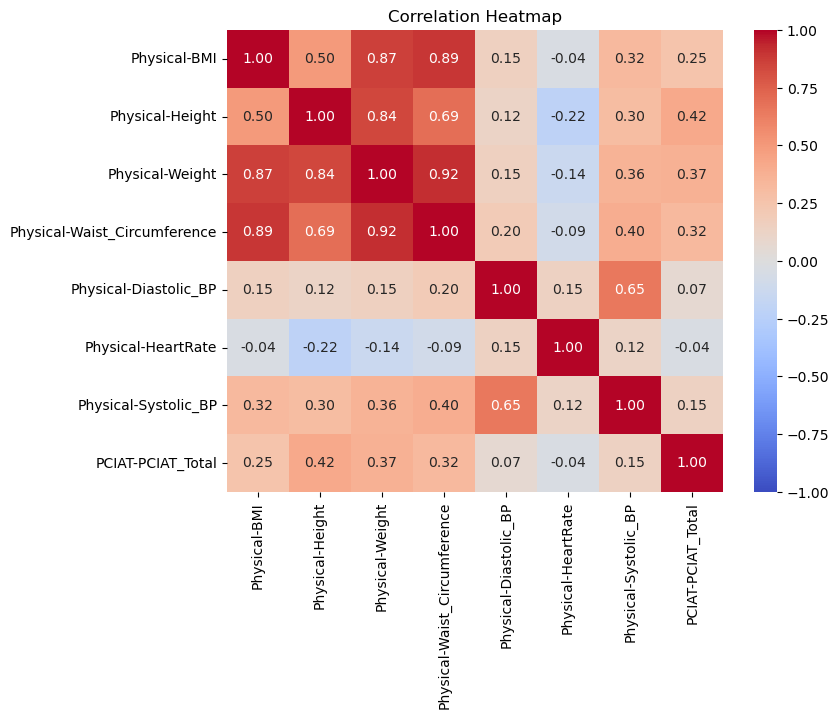

In [56]:
data_subset = train_df[cols + ['PCIAT-PCIAT_Total']]

corr_matrix = data_subset.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

- The positive correlation with the target is for height, weight, and waist circumference, which means that taller and fatter people tend to have a higher SII. But as these physical parameters increase with age, and we already know that SII tends to be highest in adolescents, this could indicate that they acts as a proxy for age (likely reflect age-related trends).

- Cardiovascular measures (systolic blood pressure, diastolic blood pressure and heart rate) also change with age, but do not vary as drastically between childhood and adolescence as physical measures, and may not be as sensitive to behaviours such as internet use. They also have a higher degree of variability, as we saw in the graphs above, so the weak correlation may indicate that cardiovascular health is not strongly linked to PIU, or that these data are just more scattered and noisy and the relationship with PIU is diluted.

In [57]:
# Extract categorical columns and their descriptions
bia_data_dict = data_dictionary[data_dictionary['Instrument'] == 'Bio-electric Impedance Analysis']
categorical_columns = bia_data_dict[bia_data_dict['Type'] == 'categorical int']['Field'].tolist()
continuous_columns = bia_data_dict[bia_data_dict['Type'] == 'float']['Field'].tolist()
categorical_descriptions = {
    field: bia_data_dict[bia_data_dict['Field'] == field]['Description'].values[0]
    for field in categorical_columns
}

# Create subplot layout
fig = make_subplots(
    rows=1, cols=len(categorical_columns) + 1,
    specs=[[{'type': 'pie'}] + [{'type': 'bar'}] * len(categorical_columns)],
    subplot_titles=[
        bia_data_dict[bia_data_dict['Field'] == 'BIA-Season']['Description'].values[0]
    ] + [categorical_descriptions[col] for col in categorical_columns]
)

# Plot 1: BIA-Season (Pie Chart)
season_counts = train_df['BIA-Season'].value_counts(normalize=True).reset_index()
season_counts.columns = ['Season', 'Proportion']
season_counts['Percentage'] = season_counts['Proportion'] * 100

fig.add_trace(
    go.Pie(
        labels=season_counts['Season'],
        values=season_counts['Proportion'],
        hoverinfo='label+percent',
        textinfo='percent',
        marker=dict(colors=px.colors.qualitative.Set1),
        showlegend=True
    ),
    row=1, col=1
)

# Plot 2 and beyond: Count Plots for Categorical Columns
for idx, col in enumerate(categorical_columns):
    count_data = train_df[col].value_counts().reset_index()
    count_data.columns = [col, 'Count']

    # Assign a unique color to each bar
    colors = px.colors.qualitative.Set1[:len(count_data)]  # Pick colors based on number of bars

    fig.add_trace(
        go.Bar(
            x=count_data[col],
            y=count_data['Count'],
            text=count_data['Count'],
            textposition='outside',
            marker_color=colors,
            showlegend=False
        ),
        row=1, col=idx + 2
    )

# Update layout
fig.update_layout(
    title_text="Bio-electric Impedance Analysis (BIA) Analysis",
    title_x=0.5,
    height=700,
    width=1200,
    legend=dict(
        x=1.1,  # Adjust the x position of the legend for better placement
        y=1.0   # Adjust the y position of the legend for better placement
    )
)

# Update x-axis and y-axis labels for count plots
for idx, col in enumerate(categorical_columns):
    fig.update_xaxes(title_text=col, row=1, col=idx + 2)
    fig.update_yaxes(title_text="Count", row=1, col=idx + 2)

# Show the figure
fig.show()


In [58]:
train_df[bia_data_dict['Field'].tolist()].drop(columns=['BIA-Season', 'BIA-BIA_Activity_Level_num'])
stat = train_df[bia_data_dict['Field'].tolist()].drop(columns=['BIA-Season', 'BIA-BIA_Activity_Level_num']).describe().transpose()
stat['missing'] = train_df[bia_data_dict['Field'].tolist()].drop(columns=['BIA-Season', 'BIA-BIA_Activity_Level_num']).isnull().sum()
stat

count         mean          std          min          25%  \
BIA-BIA_BMC        1991.0     6.719826    92.586325    -7.789610     2.966905   
BIA-BIA_BMI        1991.0    19.367048     5.047848     0.048267    15.913600   
BIA-BIA_BMR        1991.0  1237.018187  1872.383246   813.397000  1004.710000   
BIA-BIA_DEE        1991.0  2064.693747  2836.246272  1073.450000  1605.785000   
BIA-BIA_ECW        1991.0    20.825346    73.266287     1.789450    11.109550   
BIA-BIA_FFM        1991.0    74.021708   199.433753    28.900400    49.278100   
BIA-BIA_FFMI       1991.0    15.030554     5.792505     7.864850    13.408000   
BIA-BIA_FMI        1991.0     4.336495     6.356402  -194.163000     2.306915   
BIA-BIA_Fat        1991.0    16.855020   199.372119 -8745.080000     8.602395   
BIA-BIA_Frame_num  1991.0     1.745354     0.680635     1.000000     1.000000   
BIA-BIA_ICW        1991.0    33.173380    56.272346    14.489000    24.463500   
BIA-BIA_LDM        1991.0    20.022990    70.215610     4.635810    12.983150   
BIA-BIA_LST        1991.0    67.301883   108.705918    23.620100    45.204100   
BIA-BIA_SMM        1991.0    34.389466    84.050607     4.655730    21.141550   
BIA-BIA_TBW        1991.0    53.998726   129.362539    20.589200    35.887000   

                          50%          75%          max  missing  
BIA-BIA_BMC           3.92272     5.460925    4115.3600     1969  
BIA-BIA_BMI          17.96650    21.461100      53.9243     1969  
BIA-BIA_BMR        1115.38000  1310.360000   83152.2000     1969  
BIA-BIA_DEE        1863.98000  2218.145000  124728.0000     1969  
BIA-BIA_ECW          15.92800    25.162200    3233.0000     1969  
BIA-BIA_FFM          61.06620    81.833800    8799.0800     1969  
BIA-BIA_FFMI         14.09250    15.430950     217.7710     1969  
BIA-BIA_FMI           3.69863     5.987690      28.2515     1969  
BIA-BIA_Fat          16.17460    30.273100     153.8200     1969  
BIA-BIA_Frame_num     2.00000     2.000000       3.0000     1969  
BIA-BIA_ICW          28.85580    35.475700    2457.9100     1969  
BIA-BIA_LDM          16.43880    22.167600    3108.1700     1969  
BIA-BIA_LST          56.99640    77.105650    4683.7100     1969  
BIA-BIA_SMM          27.41510    38.179400    3607.6900     1969  
BIA-BIA_TBW          44.98700    60.271050    5690.9100     1969

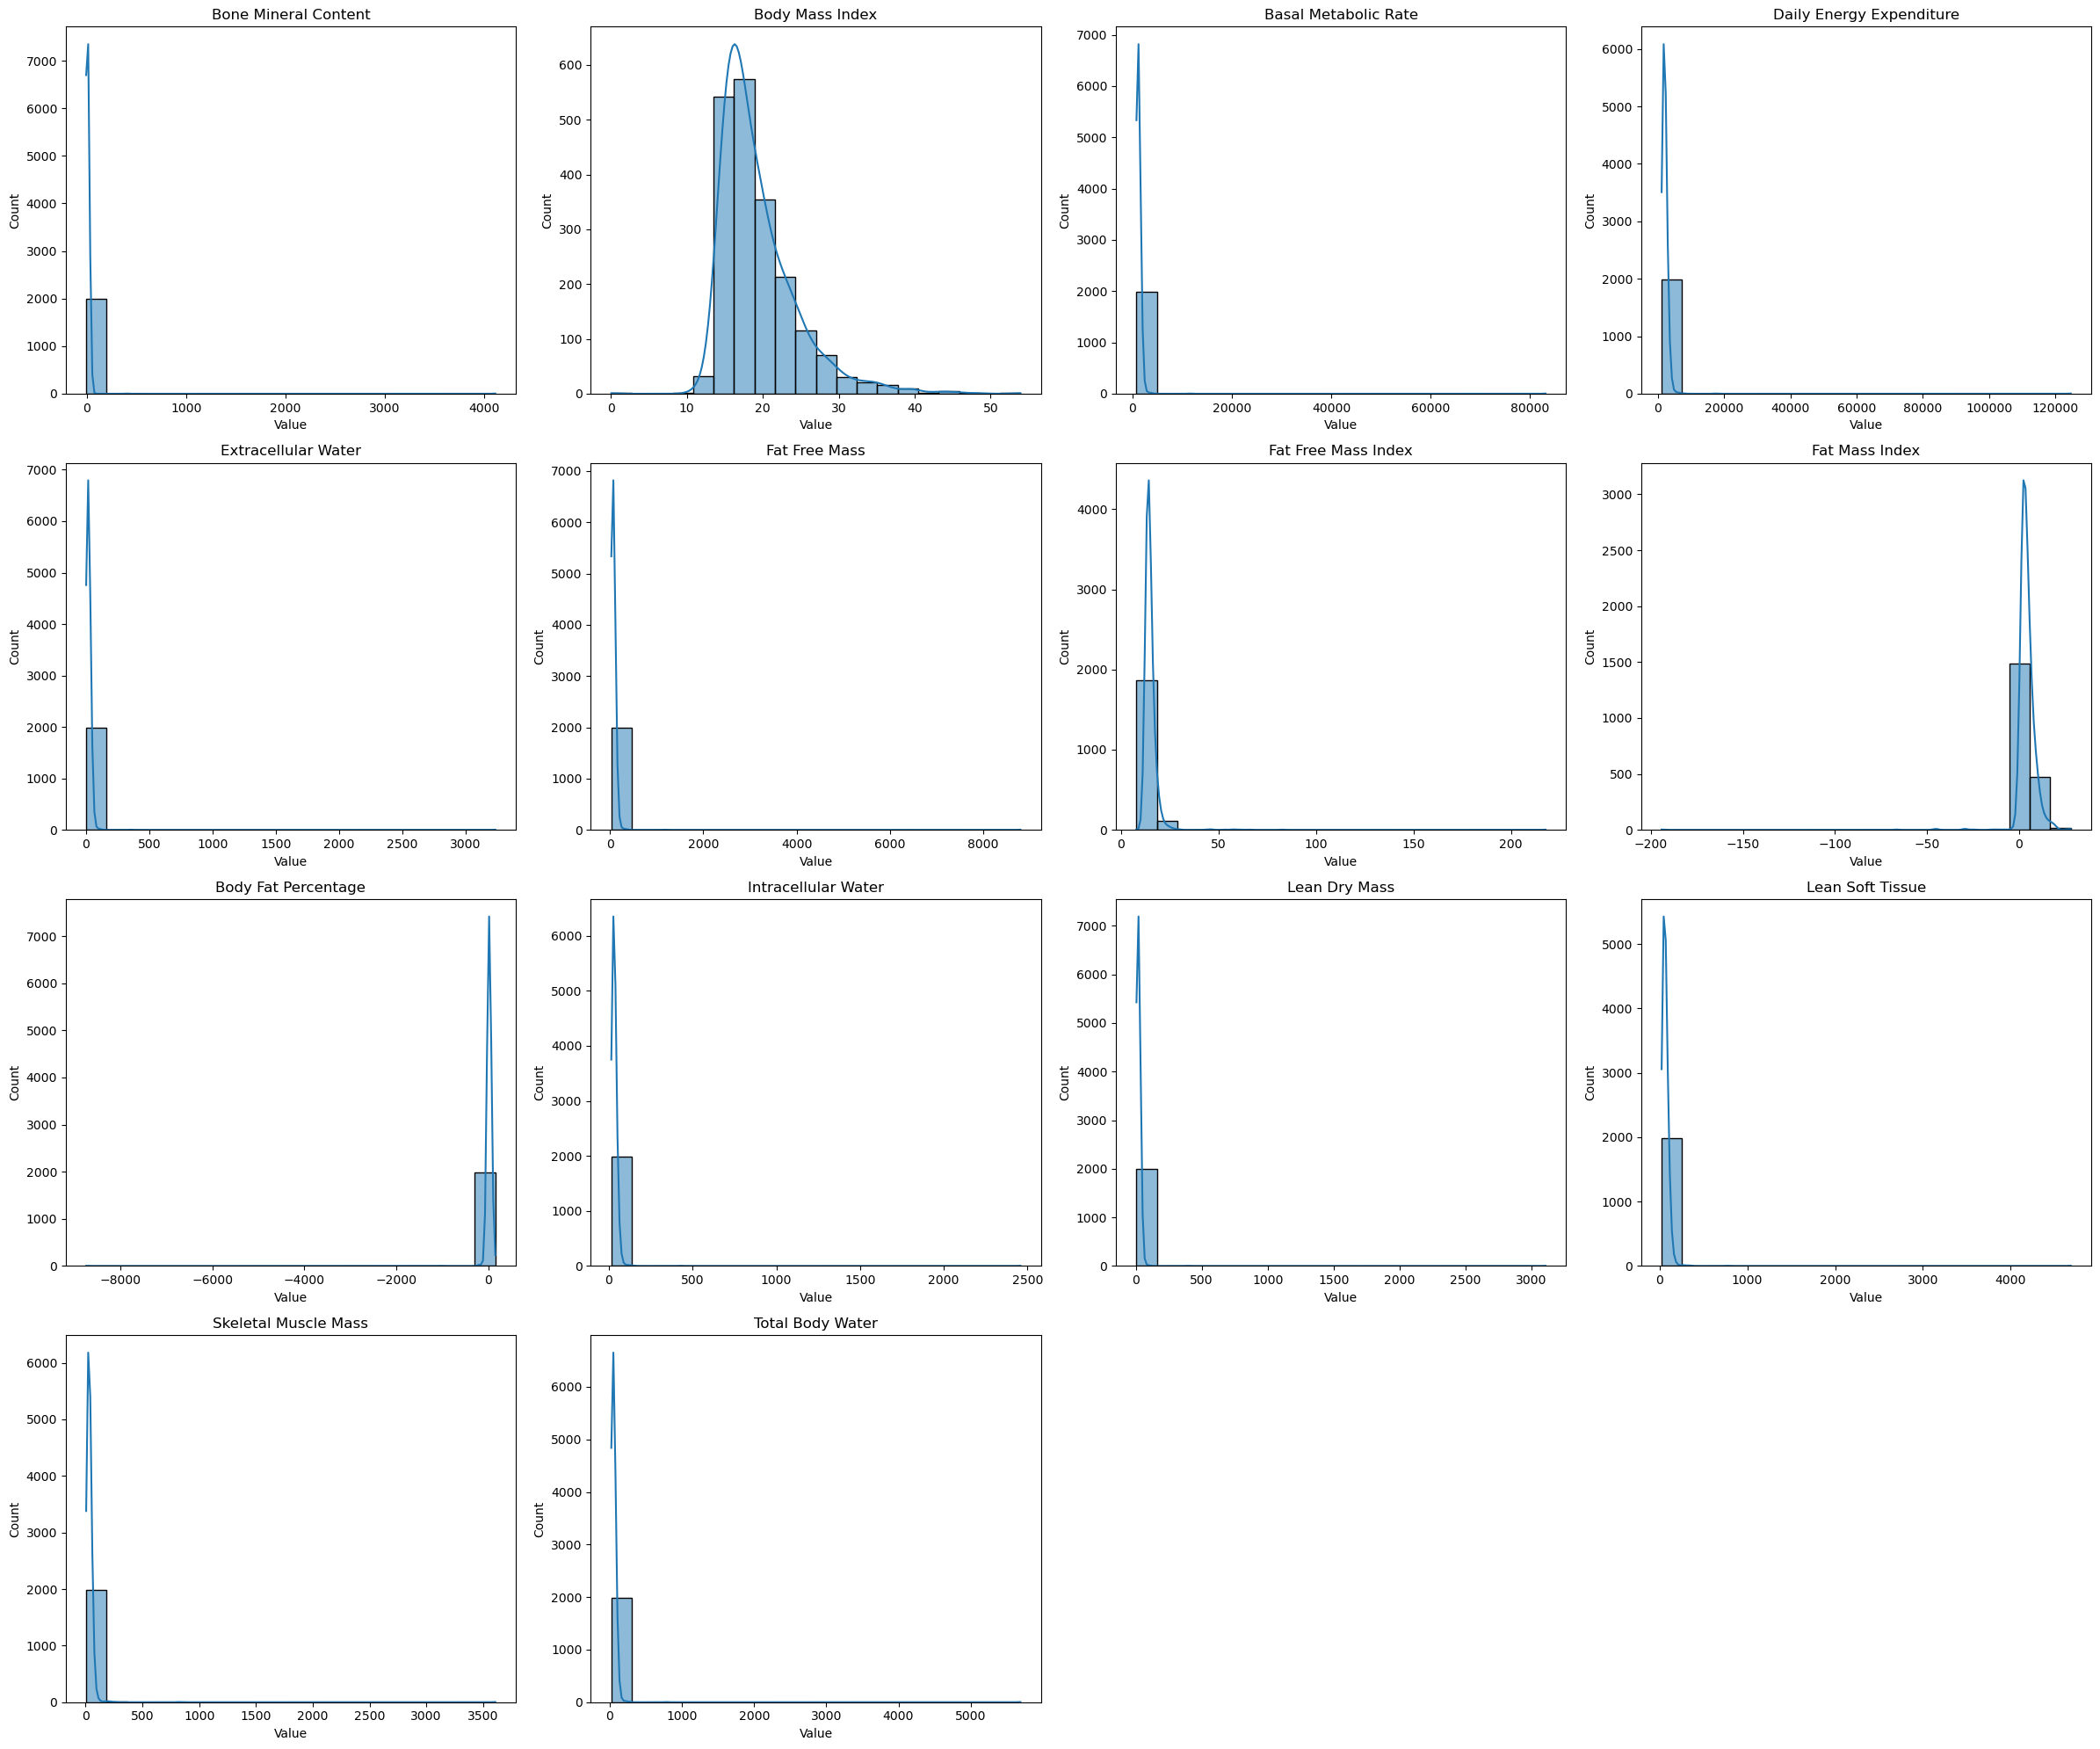

In [59]:
plt.figure(figsize=(24, 20))

for idx, col in enumerate(continuous_columns):
    plt.subplot(4, 4, idx + 1)
    sns.histplot(train_df[col].dropna(), bins=20, kde=True)
    plt.title(data_dictionary[data_dictionary['Field'] == col]['Description'].values[0])
    plt.xlabel('Value')

plt.tight_layout()
plt.show()

- The distribution of the various bioelectrical impedance analysis measurements in the data set indicates that most of them are not useful: highly skewed, with the majority of participants having marginal values and a few outliers (potential measurement errors).

- Some variables, such as Fat Mass Index and Body Fat Percentage, show implausible negative values, and almost all - extreme high values, indicating potential data quality issues.

In [60]:
bmi_data = train_df[['BIA-BIA_BMI', 'Physical-BMI']].dropna()

# Create the scatter plot
fig = px.scatter(
    bmi_data,
    x='BIA-BIA_BMI',
    y='Physical-BMI',
    title='Comparison of BIA-BMI vs Physical-BMI',
    labels={'BIA-BIA_BMI': 'BIA-BMI', 'Physical-BMI': 'Physical-BMI'},
    color_discrete_sequence=['blue']  # Set the color to blue
)

# Update the layout for better visualization
fig.update_layout(
    title={'x': 0.5},
    xaxis_title='BIA-BMI',
    yaxis_title='Physical-BMI',
    template='plotly_white',
    xaxis=dict(
        showline=True,
        linewidth=2,
        linecolor='black',
        showgrid=False,
        ticks='outside',
        tickwidth=2,
        tickcolor='black',
        ticklen=10
    ),
    yaxis=dict(
        showline=True,
        linewidth=2,
        linecolor='black',
        showgrid=False,
        ticks='outside',
        tickwidth=2,
        tickcolor='black',
        ticklen=10
    ),
    width=600
)

fig.show()

- This may not be exactly correct, because above I found zeros in the physical measurements and recalculated the BMI... As we can see, this BMI measured during the bioelectrical impedance also contains zeros that I cannot explain and that seem to be errors.

## FitnessGram EDA

### FitnessGram Vitals and Treadmill

In [61]:
groups.get('FitnessGram Vitals and Treadmill', [])

['Fitness_Endurance-Season',
 'Fitness_Endurance-Max_Stage',
 'Fitness_Endurance-Time_Mins',
 'Fitness_Endurance-Time_Sec']

In [62]:
data = train_df[train_df['Fitness_Endurance-Max_Stage'].notnull()]
age_range = data['Basic_Demos-Age']
print(
    f"Age range for participants with Fitness_Endurance-Max_Stage data:"
    f" {age_range.min()} - {age_range.max()} years"
)

Age range for participants with Fitness_Endurance-Max_Stage data: 6 - 12 years


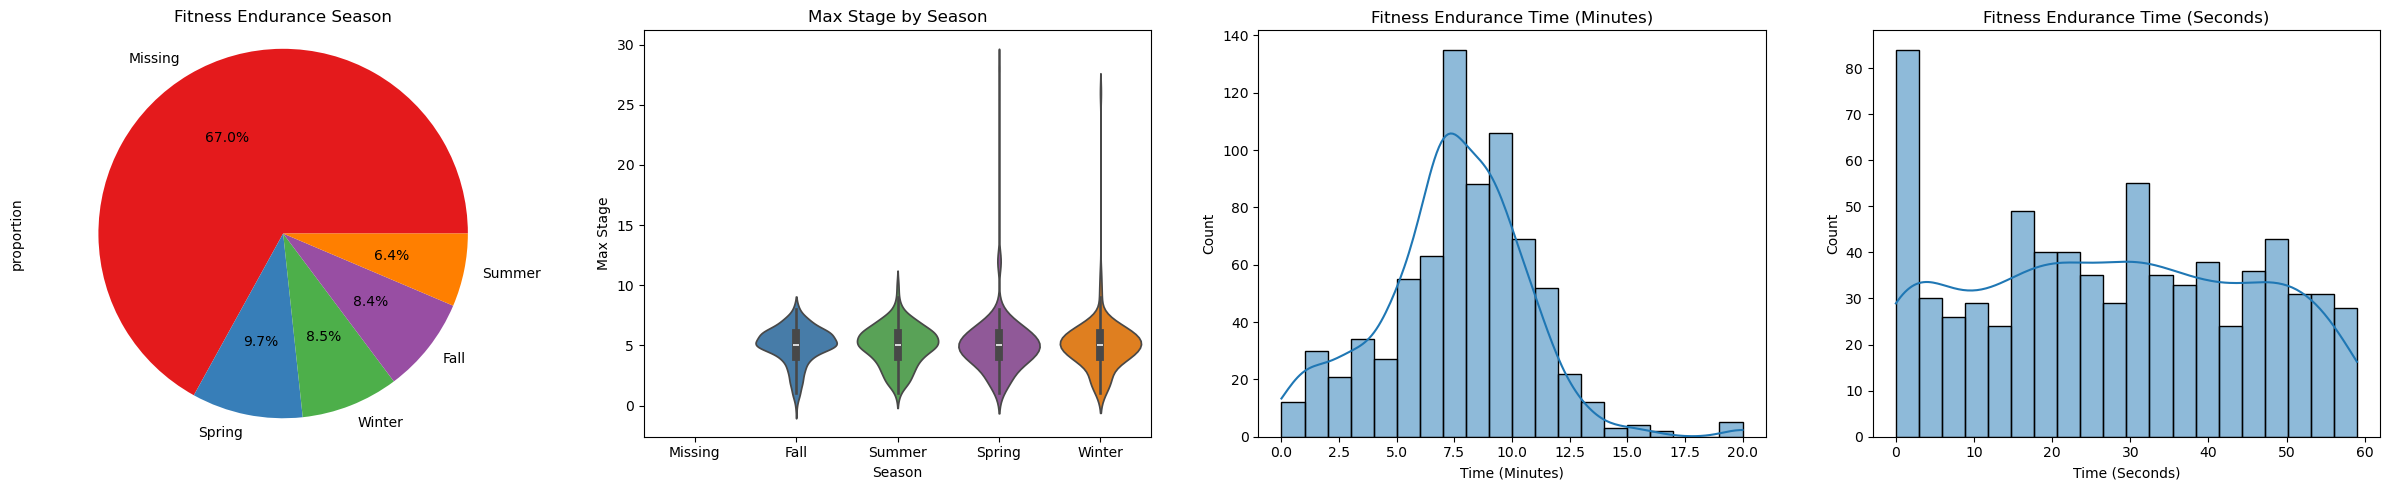

In [63]:
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

train_df['Fitness_Endurance-Season'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', colors=plt.cm.Set1.colors, ax=axes[0]
)
axes[0].set_title('Fitness Endurance Season')
axes[0].axis('equal')

sns.violinplot(
    x='Fitness_Endurance-Season',
    y='Fitness_Endurance-Max_Stage',
    data=train_df, palette="Set1",
    hue='Fitness_Endurance-Season', legend=False,
    ax=axes[1]
)
axes[1].set_title('Max Stage by Season')
axes[1].set_xlabel('Season')
axes[1].set_ylabel('Max Stage')

sns.histplot(train_df['Fitness_Endurance-Time_Mins'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Fitness Endurance Time (Minutes)')
axes[2].set_xlabel('Time (Minutes)')

sns.histplot(train_df['Fitness_Endurance-Time_Sec'], bins=20, kde=True, ax=axes[3])
axes[3].set_title('Fitness Endurance Time (Seconds)')
axes[3].set_xlabel('Time (Seconds)')

plt.tight_layout()
plt.show()

In [64]:
cols = ['Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec']
stat = train_df[cols].describe().transpose()
stat['missing'] = train_df[cols].isnull().sum()
stat

count       mean        std  min    25%   50%  \
Fitness_Endurance-Max_Stage  743.0   4.989233   2.014072  0.0   4.00   5.0   
Fitness_Endurance-Time_Mins  740.0   7.370270   3.189662  0.0   6.00   7.0   
Fitness_Endurance-Time_Sec   740.0  27.581081  17.707751  0.0  12.75  28.0   

                              75%   max  missing  
Fitness_Endurance-Max_Stage   6.0  28.0     3217  
Fitness_Endurance-Time_Mins   9.0  20.0     3220  
Fitness_Endurance-Time_Sec   43.0  59.0     3220

In [65]:
train_df[
    (train_df['Fitness_Endurance-Max_Stage'].notna()) & 
    (train_df['Fitness_Endurance-Time_Mins'].isna() | 
     train_df['Fitness_Endurance-Time_Sec'].isna())
][cols]

Fitness_Endurance-Max_Stage  Fitness_Endurance-Time_Mins  \
420                           4.0                          6.0   
1470                         26.0                          NaN   
2907                          1.0                          NaN   
3666                          2.0                          NaN   

      Fitness_Endurance-Time_Sec  
420                          NaN  
1470                         NaN  
2907                        26.0  
3666                         NaN

- It's possible that during data entry minutes or seconds were left blank (entered as NaN) when they should have been recorded as 0 minutes/seconds. While the missing seconds are not as important, the missing minutes may actually be missing and treating them as 0 would give an incorrect test result. I think it's better to just remove these suspicious cases.

In [66]:
train_df.loc[
    (train_df['Fitness_Endurance-Max_Stage'].notna()) & 
    (train_df['Fitness_Endurance-Time_Mins'].isna() | 
     train_df['Fitness_Endurance-Time_Sec'].isna()), cols
] = np.nan

train_df['Fitness_Endurance-Total_Time_Sec'] = train_df[
    'Fitness_Endurance-Time_Mins'
] * 60 + train_df['Fitness_Endurance-Time_Sec']

In [67]:
cols = ['Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Total_Time_Sec']
stat = train_df[cols].describe().transpose()
stat['missing'] = train_df[cols].isnull().sum()
stat

count        mean         std  min    25%  \
Fitness_Endurance-Max_Stage       739.0    4.971583    1.856069  0.0    4.0   
Fitness_Endurance-Total_Time_Sec  739.0  469.910690  188.716073  5.0  362.0   

                                    50%    75%     max  missing  
Fitness_Endurance-Max_Stage         5.0    6.0    28.0     3221  
Fitness_Endurance-Total_Time_Sec  476.0  590.5  1200.0     3221

### FitnessGram Child

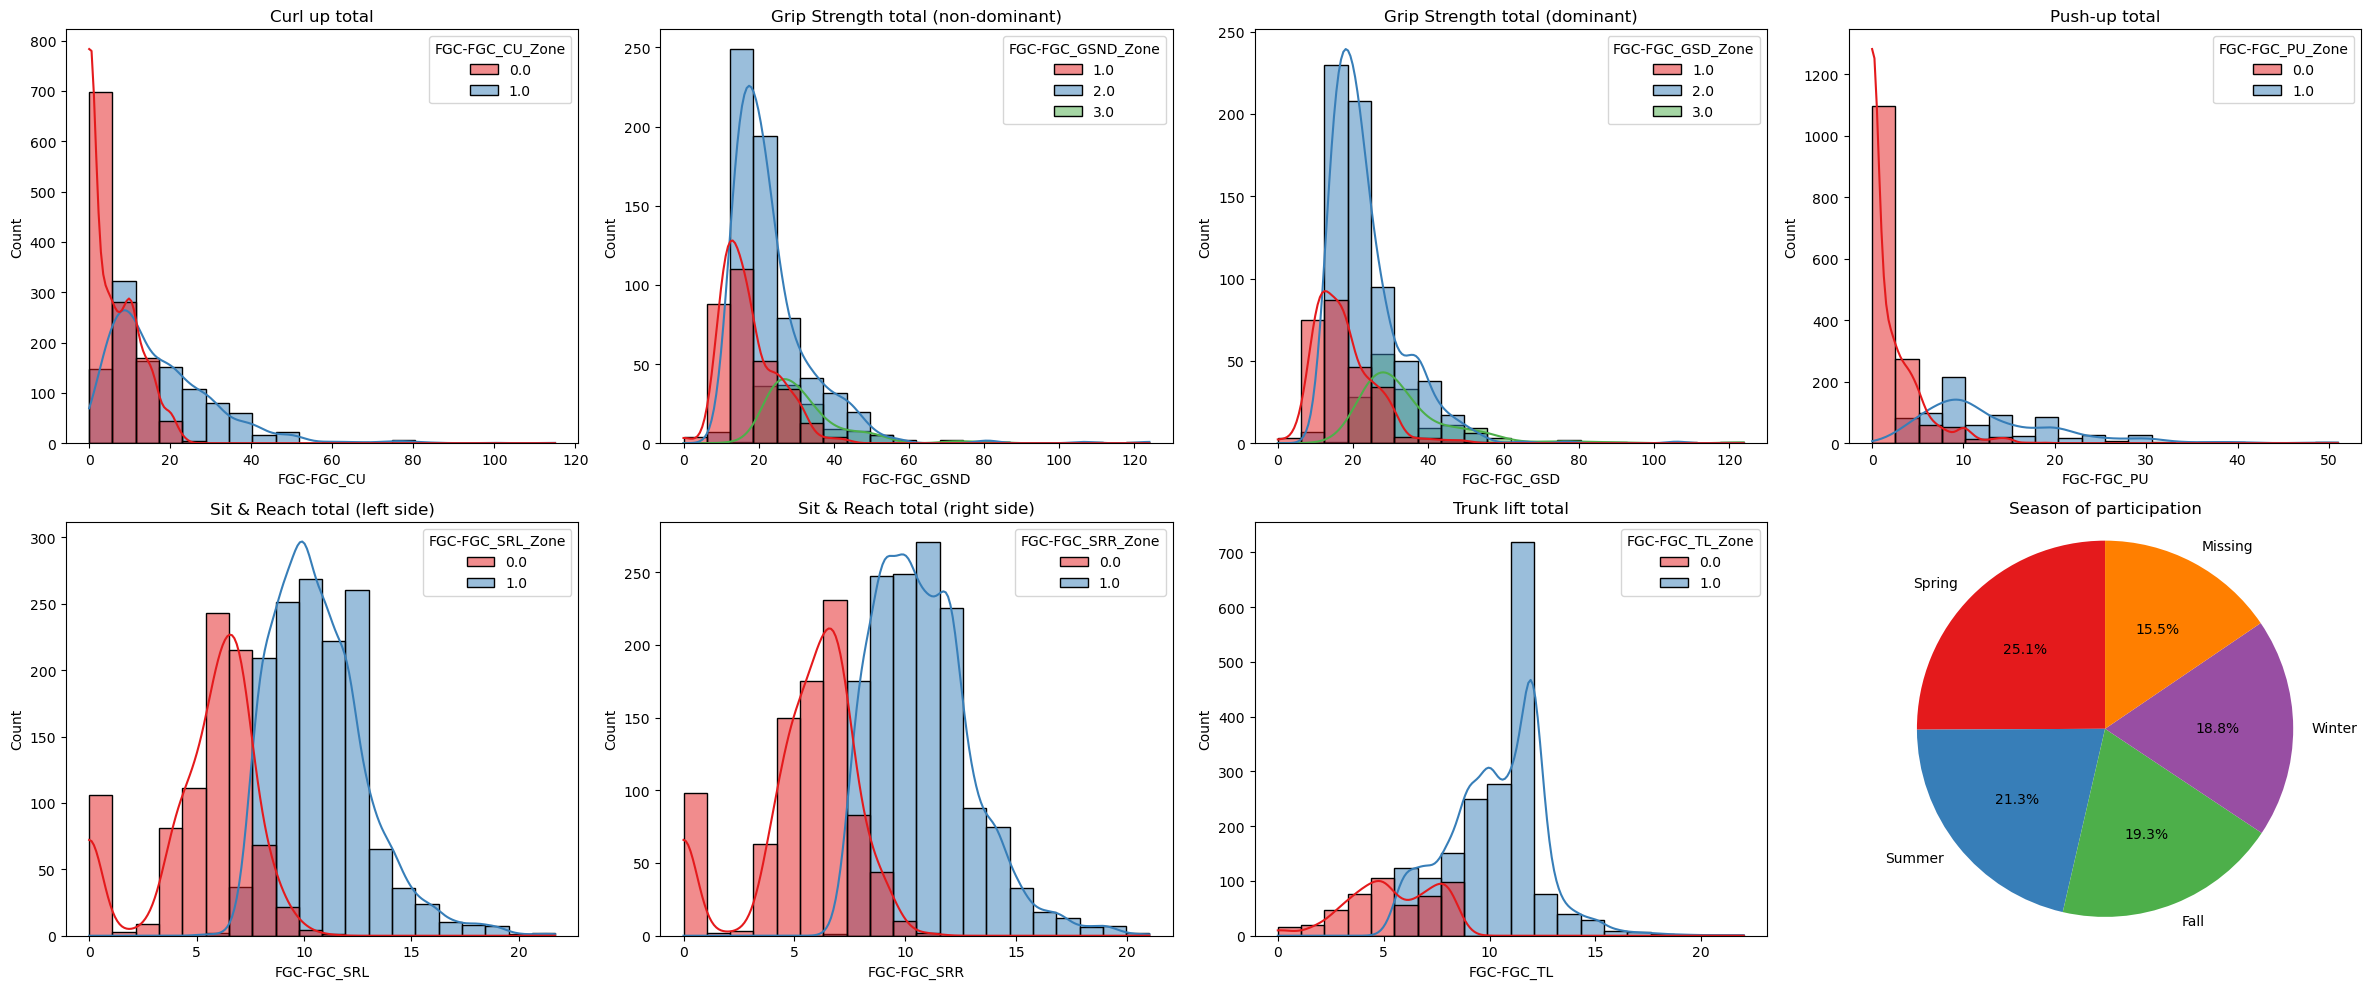

In [68]:
fgc_data_dict = data_dictionary[data_dictionary['Instrument'] == 'FitnessGram Child']
fgc_columns = []

for index, row in fgc_data_dict.iterrows():
    if '_Zone' not in row['Field']:
        measure_field = row['Field']
        measure_desc = row['Description']
        
        zone_field = measure_field + '_Zone'
        zone_row = fgc_data_dict[fgc_data_dict['Field'] == zone_field]
        
        if not zone_row.empty:
            zone_desc = zone_row['Description'].values[0]
            fgc_columns.append((measure_field, zone_field, measure_desc, zone_desc))
            
fig, axes = plt.subplots(2, 4, figsize=(24, 10))

for idx, (measure, zone, measure_desc, zone_desc) in enumerate(fgc_columns):
    row = idx // 4
    col = idx % 4
    
    sns.histplot(
        data=train_df, x=measure,
        hue=zone, bins=20, palette='Set1',
        ax=axes[row, col], kde=True
    )
    axes[row, col].set_title(f'{measure_desc}')

season_counts = train_df['FGC-Season'].value_counts(normalize=True)
axes[1, 3].pie(
    season_counts, labels=season_counts.index,
    autopct='%1.1f%%', startangle=90,
    colors=sns.color_palette("Set1")
)
axes[1, 3].set_title('Season of participation')
axes[1, 3].axis('equal')

plt.tight_layout()
plt.show()

- Most of the distributions are skewed towards lower performance totals.

In [69]:
measurement_columns = [measure for measure, _, _, _ in fgc_columns]
stat = train_df[measurement_columns].describe().transpose()
stat['Missing'] = train_df[measurement_columns].isnull().sum()
stat

count       mean        std  min   25%    50%     75%    max  \
FGC-FGC_CU    2322.0  11.259690  11.807781  0.0   3.0   9.00  15.750  115.0   
FGC-FGC_GSND  1074.0  22.420438  10.833995  0.0  15.1  20.05  26.600  124.0   
FGC-FGC_GSD   1074.0  23.518622  11.148951  0.0  16.2  21.20  28.175  123.8   
FGC-FGC_PU    2310.0   5.579654   7.390161  0.0   0.0   3.00   9.000   51.0   
FGC-FGC_SRL   2305.0   8.694924   3.429301  0.0   7.0   9.00  11.000   21.7   
FGC-FGC_SRR   2307.0   8.805635   3.422167  0.0   7.0   9.00  11.000   21.0   
FGC-FGC_TL    2324.0   9.252775   2.988863  0.0   7.0  10.00  12.000   22.0   

              Missing  
FGC-FGC_CU       1638  
FGC-FGC_GSND     2886  
FGC-FGC_GSD      2886  
FGC-FGC_PU       1650  
FGC-FGC_SRL      1655  
FGC-FGC_SRR      1653  
FGC-FGC_TL       1636

In [70]:
age_ranges = []

for measure in measurement_columns:
    valid_rows = train_df[~train_df[measure].isna()]
    
    min_age = valid_rows['Basic_Demos-Age'].min()
    max_age = valid_rows['Basic_Demos-Age'].max()
    
    age_ranges.append({
        'Measurement': measure,
        'Min Age': min_age,
        'Max Age': max_age
    })

pd.DataFrame(age_ranges)

Measurement  Min Age  Max Age
0    FGC-FGC_CU        5       21
1  FGC-FGC_GSND        6       21
2   FGC-FGC_GSD        6       21
3    FGC-FGC_PU        5       21
4   FGC-FGC_SRL        5       21
5   FGC-FGC_SRR        5       21
6    FGC-FGC_TL        5       21

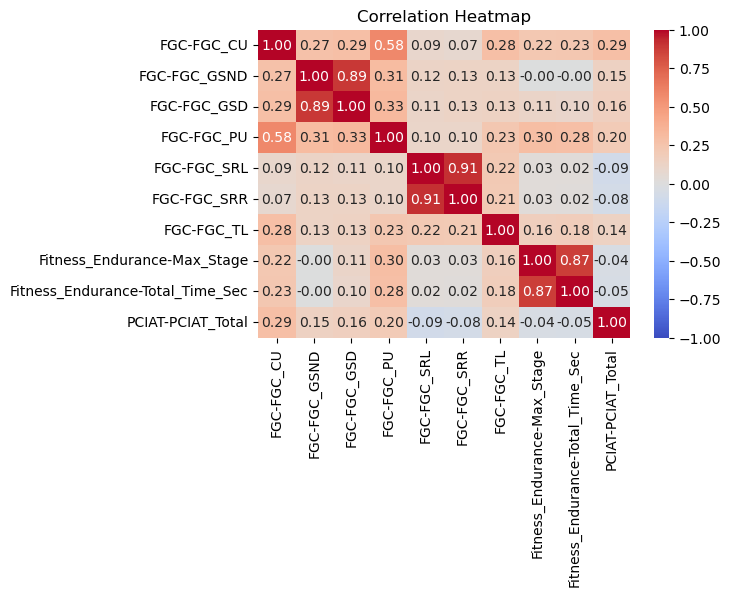

In [71]:
cols = [col for col in train_df.columns if col.startswith('FGC-') 
        and 'Zone' not in col and 'Season' not in col]
cols.extend(['Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Total_Time_Sec'])

data_subset = train_df[cols + ['PCIAT-PCIAT_Total']]

corr_matrix = data_subset.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

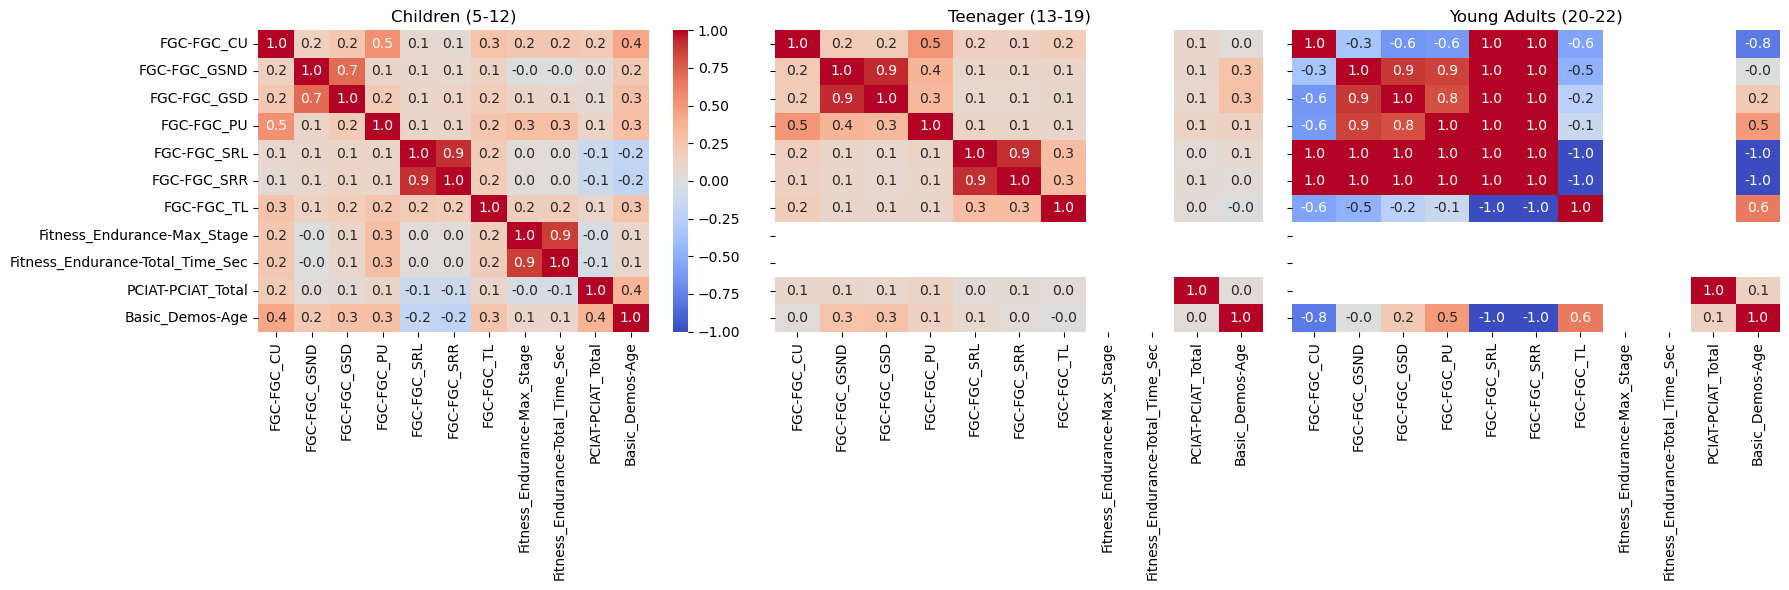

In [72]:
age_groups = train_df['Age Group'].unique()

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

for i, age_group in enumerate(age_groups):
    group_data = train_df[train_df['Age Group'] == age_group]
    corr_matrix = group_data[cols + ['PCIAT-PCIAT_Total', 'Basic_Demos-Age']].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.1f',
                vmin=-1, vmax=1, ax=axes[i], cbar=i == 0)
    axes[i].set_title(f'{age_group}')

plt.tight_layout()
plt.show()

Positive correlation between multiple physical performance measures and the PCIAT_Total score simply does not make senes, as it suggests that physical performance improves as PIU severity increases ...

## Sleep Disturbance Scale

In [73]:
groups.get('Sleep Disturbance Scale', [])

['SDS-Season', 'SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']

In [74]:
data = train_df[train_df['SDS-SDS_Total_Raw'].notnull()]
age_range = data['Basic_Demos-Age']
print(
    f"Age range for participants with SDS-SDS_Total_Raw data:"
    f" {age_range.min()} - {age_range.max()} years"
)

Age range for participants with SDS-SDS_Total_Raw data: 5 - 22 years


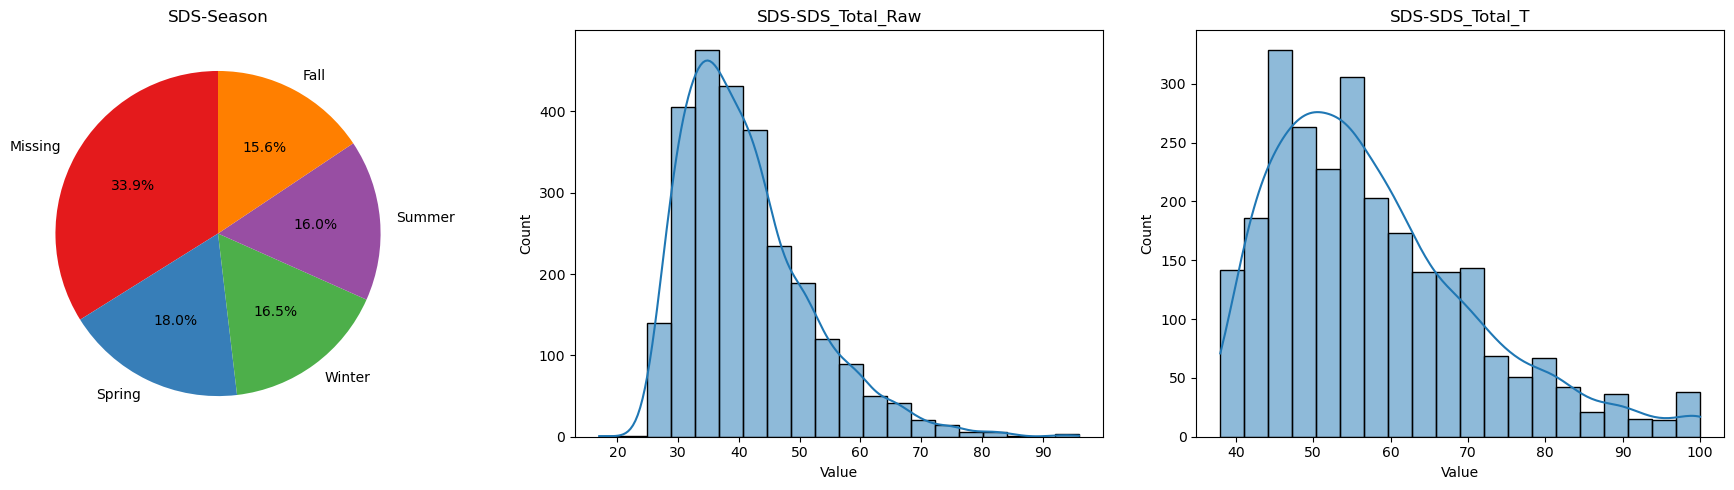

In [75]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sds_season_counts = train_df['SDS-Season'].value_counts(normalize=True)
plt.pie(
    sds_season_counts, 
    labels=sds_season_counts.index, 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=sns.color_palette("Set1")
)
plt.title('SDS-Season')

plt.subplot(1, 3, 2)
sns.histplot(train_df['SDS-SDS_Total_Raw'].dropna(), bins=20, kde=True)
plt.title('SDS-SDS_Total_Raw')
plt.xlabel('Value')

plt.subplot(1, 3, 3)
sns.histplot(train_df['SDS-SDS_Total_T'].dropna(), bins=20, kde=True)
plt.title('SDS-SDS_Total_T')
plt.xlabel('Value')

plt.tight_layout()
plt.show()

In [76]:
stat = train_df[['SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']].describe().transpose()
stat['Missing'] = train_df[['SDS-SDS_Total_Raw', 'SDS-SDS_Total_T']].isnull().sum()
stat

count       mean        std   min   25%   50%   75%  \
SDS-SDS_Total_Raw  2609.0  41.088923  10.427433  17.0  33.0  39.0  46.0   
SDS-SDS_Total_T    2606.0  57.763622  13.196091  38.0  47.0  55.0  64.0   

                     max  Missing  
SDS-SDS_Total_Raw   96.0     1351  
SDS-SDS_Total_T    100.0     1354

## Physical Activity Questionnaires (Adolescents and Children)

In [77]:
groups.get('Physical Activity Questionnaire (Adolescents)', [])

['PAQ_A-Season', 'PAQ_A-PAQ_A_Total']

In [78]:
data = train_df[train_df['PAQ_A-PAQ_A_Total'].notnull()]
age_range = data['Basic_Demos-Age']
print(
    f"Age range for Adolescents (with PAQ_A_Total data):"
    f" {age_range.min()} - {age_range.max()} years"
)

Age range for Adolescents (with PAQ_A_Total data): 13 - 18 years


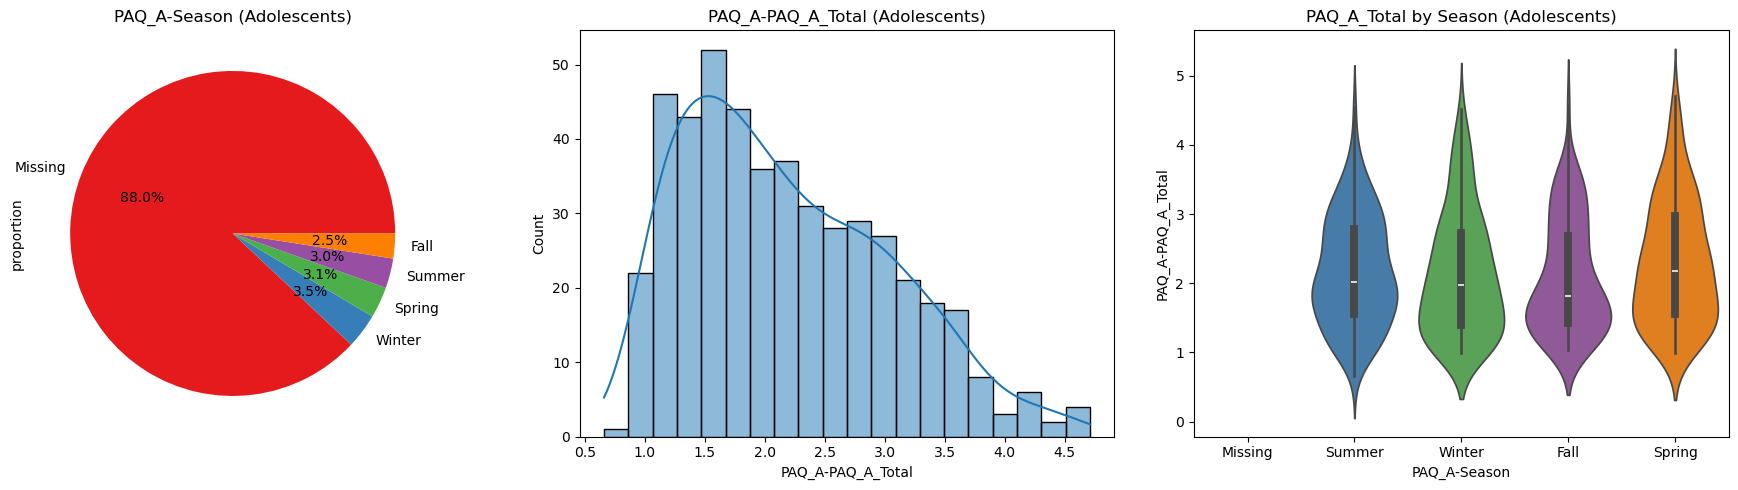

In [79]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
train_df['PAQ_A-Season'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', colors=plt.cm.Set1.colors
)
plt.title('PAQ_A-Season (Adolescents)')

plt.subplot(1, 3, 2)
sns.histplot(train_df['PAQ_A-PAQ_A_Total'], bins=20, kde=True)
plt.title('PAQ_A-PAQ_A_Total (Adolescents)')

plt.subplot(1, 3, 3)
sns.violinplot(x='PAQ_A-Season', 
               y='PAQ_A-PAQ_A_Total', 
               data=train_df, 
               hue='PAQ_A-Season', 
               palette="Set1", 
               dodge=False,
               legend=False)

plt.title('PAQ_A_Total by Season (Adolescents)')

plt.tight_layout()
plt.show()

In [80]:
stat = train_df[['PAQ_A-PAQ_A_Total']].describe().transpose()
stat['Missing'] = train_df[['PAQ_A-PAQ_A_Total']].isnull().sum()
stat

count      mean       std   min   25%   50%   75%   max  \
PAQ_A-PAQ_A_Total  475.0  2.178853  0.849476  0.66  1.49  2.01  2.78  4.71   

                   Missing  
PAQ_A-PAQ_A_Total     3485

In [81]:
data = train_df[train_df['PAQ_C-PAQ_C_Total'].notnull()]
age_range = data['Basic_Demos-Age']
print(
    f"Age range for Children (with PAQ_C_Total data):"
    f" {age_range.min()} - {age_range.max()} years"
)

Age range for Children (with PAQ_C_Total data): 7 - 17 years


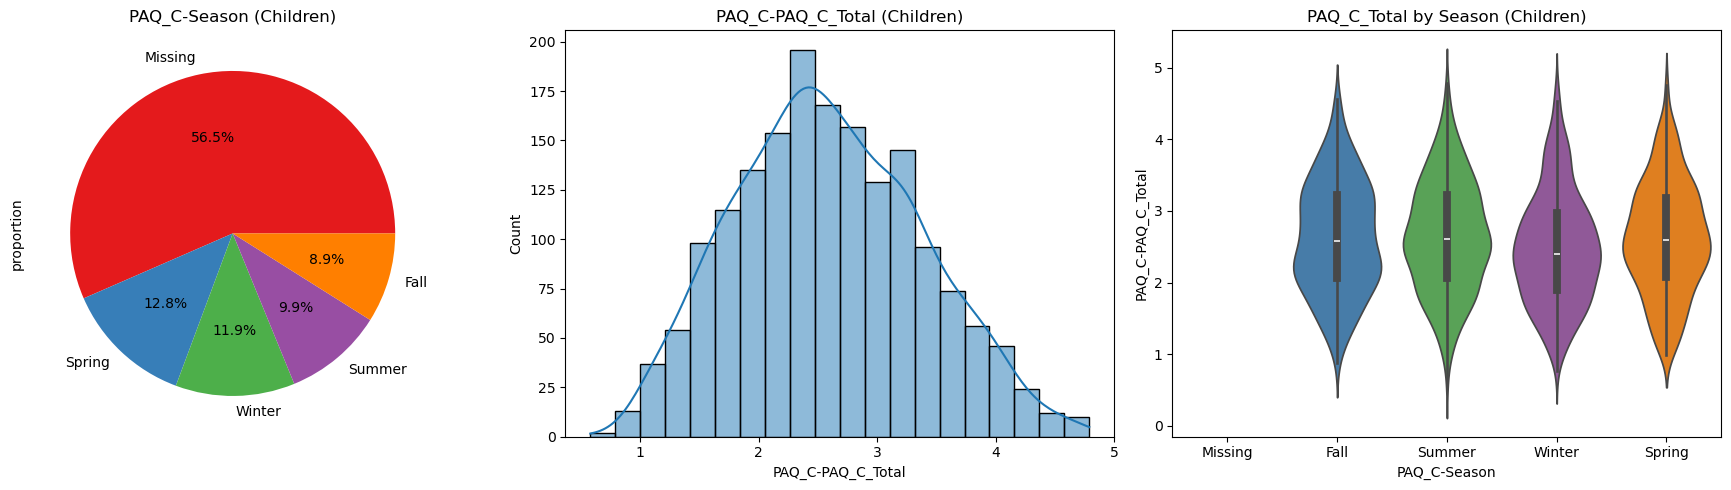

In [82]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
train_df['PAQ_C-Season'].value_counts(normalize=True).plot.pie(
    autopct='%1.1f%%', colors=plt.cm.Set1.colors
)
plt.title('PAQ_C-Season (Children)')

plt.subplot(1, 3, 2)
sns.histplot(train_df['PAQ_C-PAQ_C_Total'], bins=20, kde=True)
plt.title('PAQ_C-PAQ_C_Total (Children)')

plt.subplot(1, 3, 3)
sns.violinplot(x='PAQ_C-Season', y='PAQ_C-PAQ_C_Total', data=train_df, palette="Set1",
               hue='PAQ_C-Season', dodge=False, legend=False)
plt.title('PAQ_C_Total by Season (Children)')

plt.tight_layout()
plt.show()

In [83]:
stat = train_df[['PAQ_C-PAQ_C_Total']].describe().transpose()
stat['Missing'] = train_df[['PAQ_C-PAQ_C_Total']].isnull().sum()
stat

count     mean       std   min   25%   50%   75%   max  \
PAQ_C-PAQ_C_Total  1721.0  2.58955  0.783937  0.58  2.02  2.54  3.16  4.79   

                   Missing  
PAQ_C-PAQ_C_Total     2239

- The division into adolescents and children seems to be incorrect (participants with data in the children columns (PAQ_C_Total) are 7 - 17 years old - overlapping with those with non-missing data in the adolescents columns - 13 - 18 years old).
- Physical activity levels are fairly stable over the seasons, with only minor variations, although are slightly lower in the fall and winter for adolescents and children, respectively.
- There are many missing values for these features.

### EDA Idea [Credit](https://www.kaggle.com/code/antoninadolgorukova/cmi-piu-features-eda)!

# Handling Missingness

In [84]:
train_df.head()

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
4  0016bb22                    Spring               18                1   

  CGAS-Season  CGAS-CGAS_Score Physical-Season  Physical-BMI  Physical-Height  \
0      Winter             51.0            Fall     16.877316             46.0   
1     Missing              NaN            Fall     14.035590             48.0   
2        Fall             71.0            Fall     16.648696             56.5   
3        Fall             71.0          Summer     18.292347             56.0   
4      Summer              NaN         Missing           NaN              NaN   

   Physical-Weight  Physical-Waist_Circumference  Physical-Diastolic_BP  \
0             50.8                           NaN                    NaN   
1             46.0                          22.0                   75.0   
2             75.6                           NaN                   65.0   
3             81.6                           NaN                   60.0   
4              NaN                           NaN                    NaN   

   Physical-HeartRate  Physical-Systolic_BP Fitness_Endurance-Season  \
0                 NaN                   NaN                  Missing   
1                70.0                 122.0                  Missing   
2                94.0                 117.0                     Fall   
3                97.0                 117.0                   Summer   
4                 NaN                   NaN                  Missing   

   Fitness_Endurance-Max_Stage  Fitness_Endurance-Time_Mins  \
0                          NaN                          NaN   
1                          NaN                          NaN   
2                          5.0                          7.0   
3                          6.0                          9.0   
4                          NaN                          NaN   

   Fitness_Endurance-Time_Sec FGC-Season  FGC-FGC_CU  FGC-FGC_CU_Zone  \
0                         NaN       Fall         0.0              0.0   
1                         NaN       Fall         3.0              0.0   
2                        33.0       Fall        20.0              1.0   
3                        37.0     Summer        18.0              1.0   
4                         NaN    Missing         NaN              NaN   

   FGC-FGC_GSND  FGC-FGC_GSND_Zone  FGC-FGC_GSD  FGC-FGC_GSD_Zone  FGC-FGC_PU  \
0           NaN                NaN          NaN               NaN         0.0   
1           NaN                NaN          NaN               NaN         5.0   
2          10.2                1.0         14.7               2.0         7.0   
3           NaN                NaN          NaN               NaN         5.0   
4           NaN                NaN          NaN               NaN         NaN   

   FGC-FGC_PU_Zone  FGC-FGC_SRL  FGC-FGC_SRL_Zone  FGC-FGC_SRR  \
0              0.0          7.0               0.0          6.0   
1              0.0         11.0               1.0         11.0   
2              1.0         10.0               1.0         10.0   
3              0.0          7.0               0.0          7.0   
4              NaN          NaN               NaN          NaN   

   FGC-FGC_SRR_Zone  FGC-FGC_TL  FGC-FGC_TL_Zone BIA-Season  \
0               0.0         6.0              1.0       Fall   
1               1.0         3.0              0.0     Winter   
2               1.0         5.0              0.0    Missing   
3               0.0         7.0              1.0     Summer   
4               NaN         NaN              NaN    Missing   

   BIA-BIA_Activity_Level_num  BIA-BIA_BMC  BIA-BIA_BMI  BIA-BIA_BMR  \
0                         2.0     

In [85]:
train_df.drop(columns=['CGAS_Score_Bin', 'internet_use_encoded', 'Age Group', 'sii category'], inplace=True)

In [86]:
train_df.replace('Missing', np.nan, inplace=True)

In [87]:
pciat_columns = [f'PCIAT-PCIAT_{i:02d}' for i in range(1, 21)]
train_df.drop(columns=pciat_columns, inplace=True)

In [88]:
season_columns = [col for col in train_df.columns if col.endswith('-Season')]
train_df.drop(columns=season_columns, inplace=True)
zone_columns = [col for col in train_df.columns if col.endswith('_Zone')]
train_df.drop(columns=zone_columns, inplace=True)
train_df.drop(columns=['Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec'], inplace=True)

In [89]:
train_df.to_csv('train_df.csv', index=False)

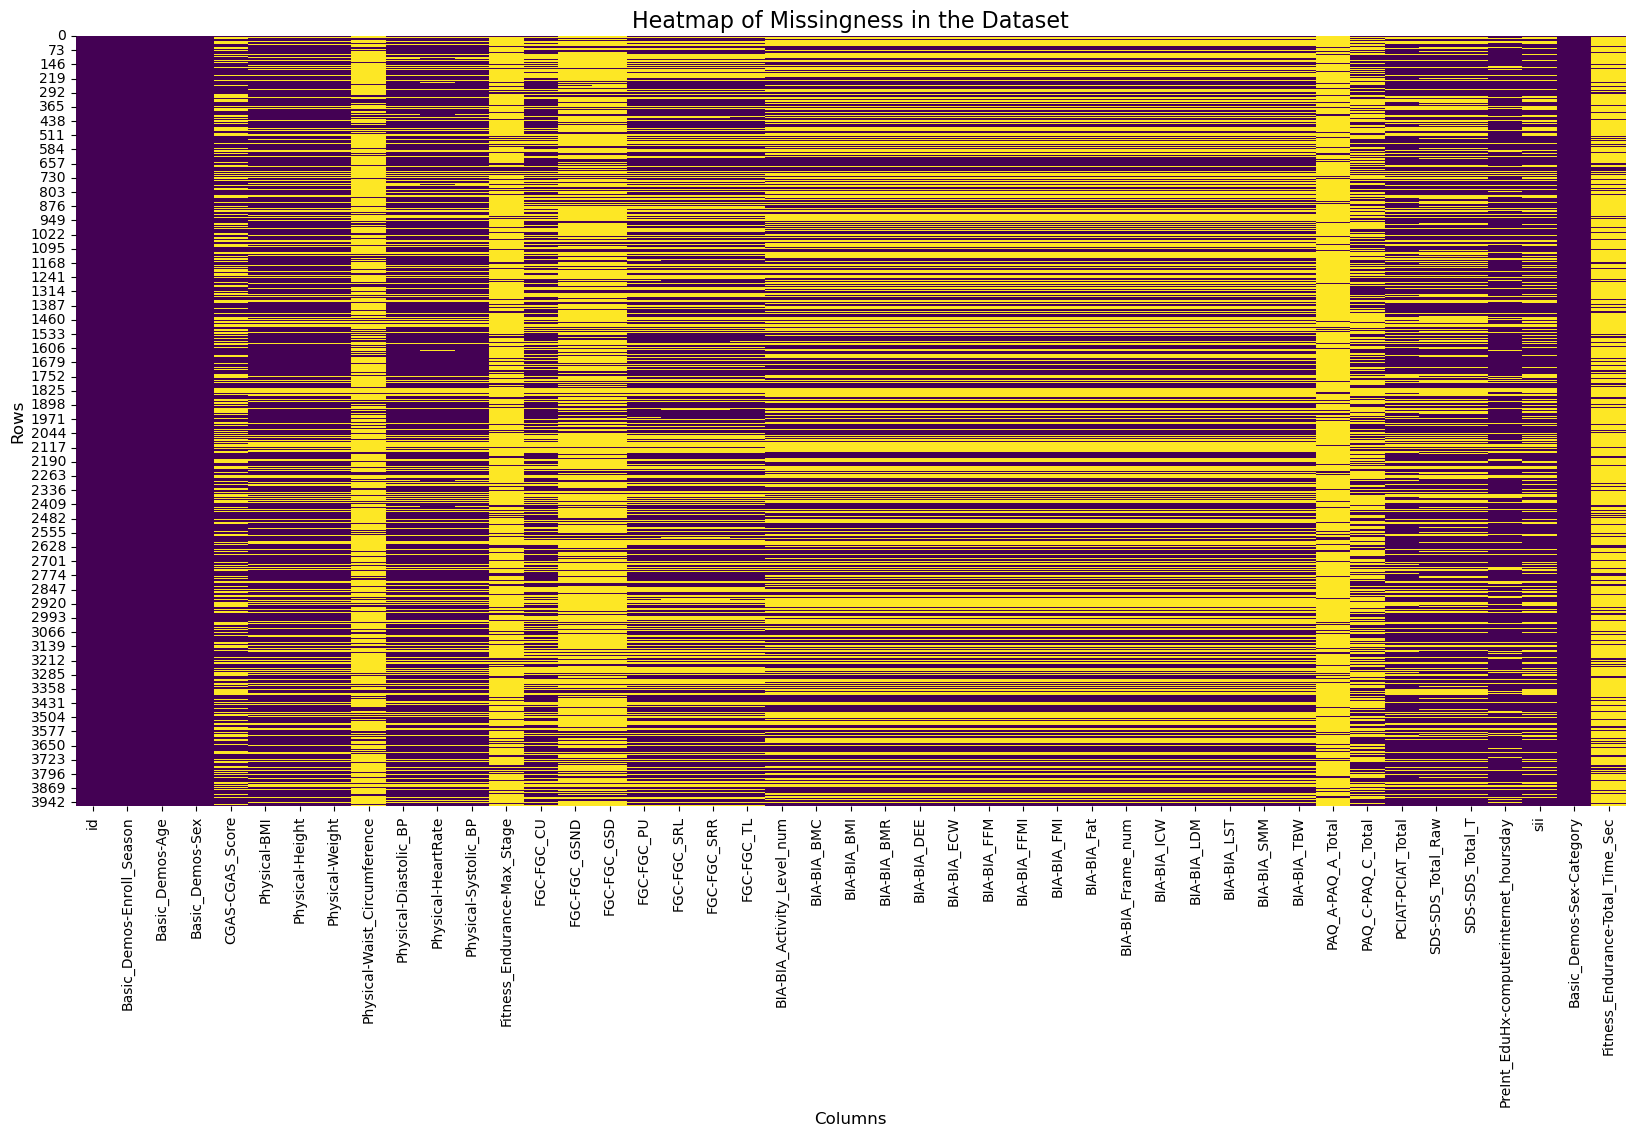

In [90]:
# Missingness heatmap
sns.set_palette("Set1")
plt.figure(figsize=(20, 10))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Heatmap of Missingness in the Dataset", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.show()

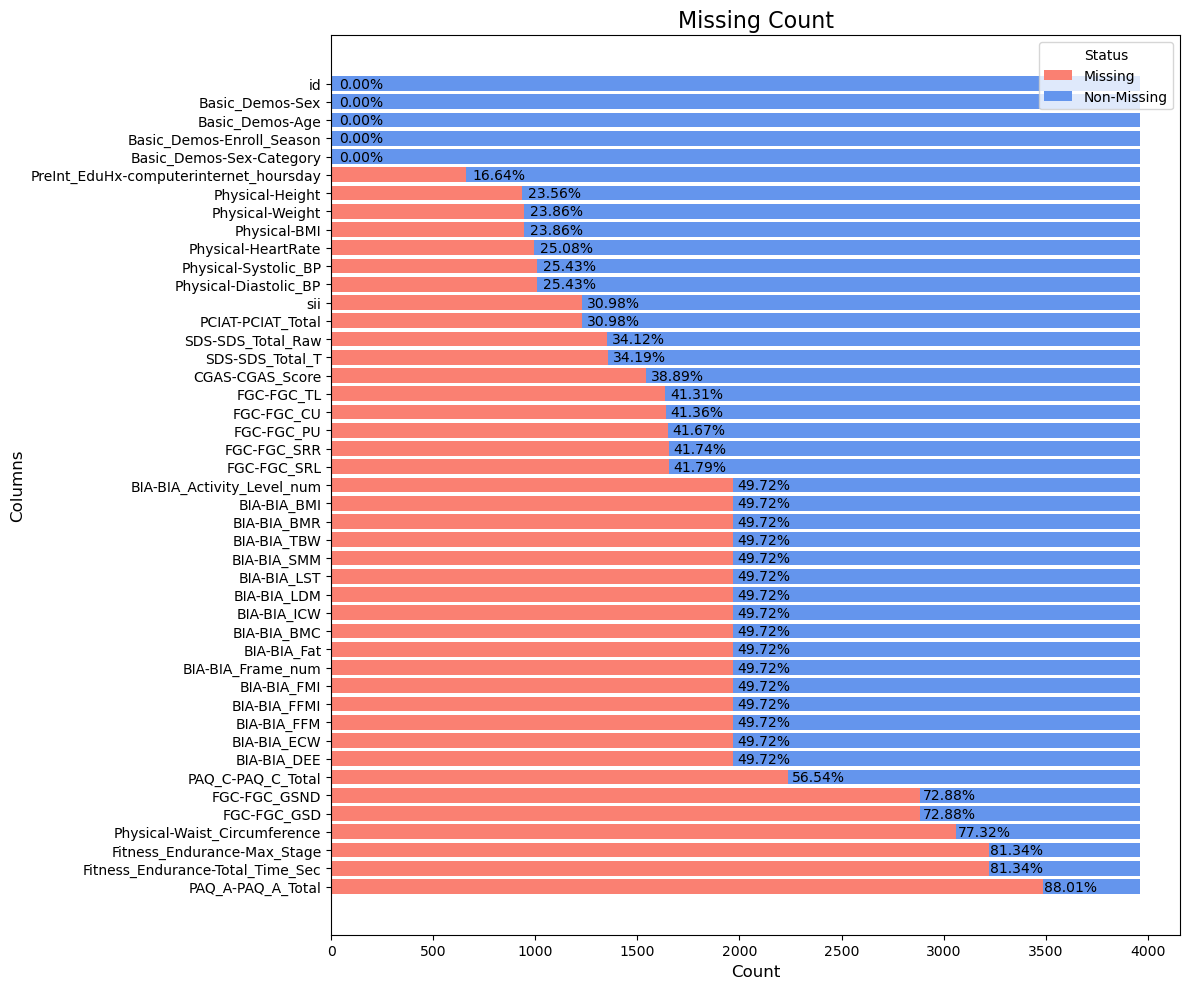

In [91]:
# Missing count and percentage
missing_data = train_df.isnull().sum()
non_missing_data = train_df.notnull().sum()

missingness_df = pd.DataFrame({
    "Column": train_df.columns,
    "Missing Count": missing_data,
    "Non-Missing Count": non_missing_data,
    "Total Count": missing_data + non_missing_data,
}).sort_values(by="Missing Count", ascending=False)

plt.figure(figsize=(12, 10))
for i, column in enumerate(missingness_df['Column']):
    missing_count = missingness_df['Missing Count'].iloc[i]
    non_missing_count = missingness_df['Non-Missing Count'].iloc[i]
    total_count = missingness_df['Total Count'].iloc[i]

    # Plot the bars
    plt.barh(column, missing_count, color='salmon', label='Missing' if i == 0 else "")
    plt.barh(column, non_missing_count, left=missing_count, color='cornflowerblue', label='Non-Missing' if i == 0 else "")

    # Calculate and annotate missing percentage
    missing_percentage = (missing_count / total_count) * 100
    plt.text(missing_count + non_missing_count * 0.01, i, f"{missing_percentage:.2f}%", va='center', ha='left', fontsize=10)

plt.title("Missing Count", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Columns", fontsize=12)
plt.legend(title="Status")
plt.tight_layout()
plt.show()

In [92]:
train_df['Physical-Weight'].min(), train_df['Physical-Height'].min()

(31.8, 33.0)

/Users/armankhoshnevis/anaconda3/envs/FDS_Project/lib/python3.11/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



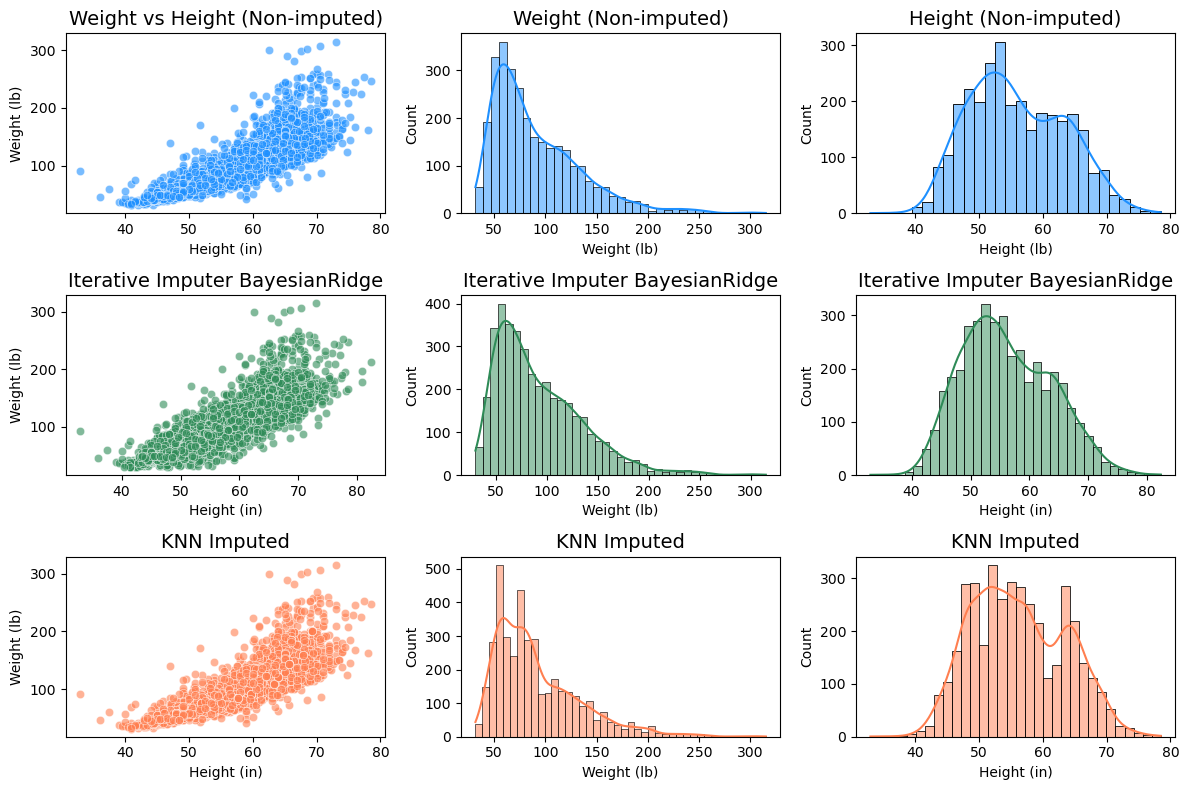

In [93]:
# Imputing heights and weights
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor

columns_to_impute = ['Basic_Demos-Age', 'Physical-Height', 'Physical-Weight']
data_for_imputation = train_df[columns_to_impute]
data_for_imputation_copy = data_for_imputation.copy()

# BayesianRidge Iterative Imputer
imputer = IterativeImputer(random_state=42, sample_posterior=True, min_value=30, max_iter=500)
data_imputed = imputer.fit_transform(data_for_imputation_copy)
data_imputed_itr_df = pd.DataFrame(data=data_imputed, columns=data_for_imputation.columns)

# KNN Iterative Imputer
imputer = IterativeImputer(estimator=KNeighborsRegressor(n_neighbors=4), random_state=42)
data_imputed = imputer.fit_transform(data_for_imputation_copy)
data_imputed_itrknn_df = pd.DataFrame(data=data_imputed, columns=data_for_imputation.columns)

fig, axes = plt.subplots(3, 3, figsize=(12, 8))

# Non-imputed data
sns.scatterplot(
    data=data_for_imputation,
    x='Physical-Height', 
    y='Physical-Weight',
    color='dodgerblue',
    alpha=0.6,
    ax=axes[0, 0]
)
axes[0, 0].set_title('Weight vs Height (Non-imputed)', fontsize=14)
axes[0, 0].set_xlabel('Height (in)')
axes[0, 0].set_ylabel('Weight (lb)')

sns.histplot(
    data=data_for_imputation,
    x='Physical-Weight',
    kde=True,
    color='dodgerblue',
    ax=axes[0, 1]
)
axes[0, 1].set_title('Weight (Non-imputed)', fontsize=14)
axes[0, 1].set_xlabel('Weight (lb)')

sns.histplot(
    data=data_for_imputation,
    x='Physical-Height',
    kde=True,
    color='dodgerblue',
    ax=axes[0, 2]
)
axes[0, 2].set_title('Height (Non-imputed)', fontsize=14)
axes[0, 2].set_xlabel('Height (lb)')

# Data imputed with Iterative Imputer (default)
sns.scatterplot(
    data=data_imputed_itr_df,
    x='Physical-Height',
    y='Physical-Weight',
    color='seagreen',
    alpha=0.6,
    ax=axes[1, 0]
)
axes[1, 0].set_title('Iterative Imputer BayesianRidge', fontsize=14)
axes[1, 0].set_xlabel('Height (in)')
axes[1, 0].set_ylabel('Weight (lb)')

sns.histplot(
    data=data_imputed_itr_df,
    x='Physical-Weight',
    kde=True,
    color='seagreen',
    ax=axes[1, 1]
)
axes[1, 1].set_title('Iterative Imputer BayesianRidge', fontsize=14)
axes[1, 1].set_xlabel('Weight (lb)')

sns.histplot(
    data=data_imputed_itr_df,
    x='Physical-Height',
    kde=True,
    color='seagreen',
    ax=axes[1, 2]
)
axes[1, 2].set_title('Iterative Imputer BayesianRidge', fontsize=14)
axes[1, 2].set_xlabel('Height (in)')

# Data imputed with KNN
sns.scatterplot(
    data=data_imputed_itrknn_df,
    x='Physical-Height',
    y='Physical-Weight',
    color='coral',
    alpha=0.6,
    ax=axes[2, 0]
)
axes[2, 0].set_title('KNN Imputed', fontsize=14)
axes[2, 0].set_xlabel('Height (in)')
axes[2, 0].set_ylabel('Weight (lb)')

sns.histplot(
    data=data_imputed_itrknn_df,
    x='Physical-Weight',
    kde=True,
    color='coral',
    ax=axes[2, 1]
)
axes[2, 1].set_title('KNN Imputed', fontsize=14)
axes[2, 1].set_xlabel('Weight (lb)')

sns.histplot(
    data=data_imputed_itrknn_df,
    x='Physical-Height',
    kde=True,
    color='coral',
    ax=axes[2, 2]
)
axes[2, 2].set_title('KNN Imputed', fontsize=14)
axes[2, 2].set_xlabel('Height (in)')

plt.tight_layout()
plt.show()

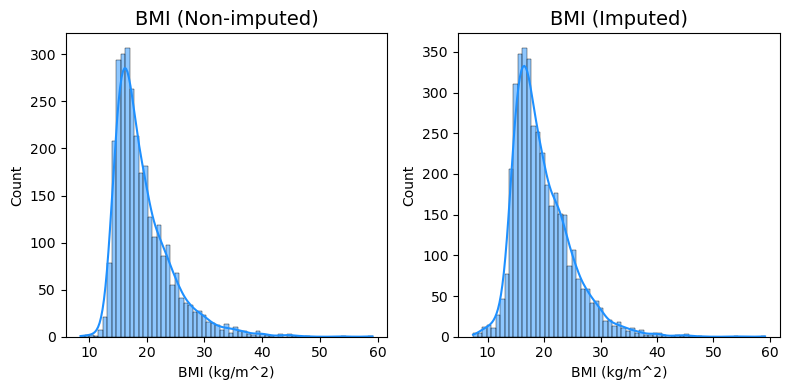

In [94]:
# Both methods results into almost the same outputs!
train_df.loc[:, columns_to_impute] = data_imputed_itr_df

# Impute BMI
INCH_TO_METER = 0.0254
POUND_TO_KG = 0.453592

height_in_meters = train_df['Physical-Height'] * INCH_TO_METER
weight_in_kg = train_df['Physical-Weight'] * POUND_TO_KG

train_df['Physical-BMI-Imputed'] = weight_in_kg / (height_in_meters ** 2)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))

sns.histplot(
    data=train_df,
    x='Physical-BMI',
    kde=True,
    color='dodgerblue',
    ax=axes[0]
)
axes[0].set_title('BMI (Non-imputed)', fontsize=14)
axes[0].set_xlabel('BMI (kg/m^2)')

sns.histplot(
    data=train_df,
    x='Physical-BMI-Imputed',
    kde=True,
    color='dodgerblue',
    ax=axes[1]
)
axes[1].set_title('BMI (Imputed)', fontsize=14)
axes[1].set_xlabel('BMI (kg/m^2)')

plt.tight_layout()
plt.show()

- For this imputation, Age, Height, and Weight are used for the imputation task.
- Both methods resulted into almost the same imputation as they display the similar distribution. However, the Iterative Imputer BayesianRidge method is chosen due to a relatively better performance in the imputed distribution of weight.
- Distribution of the imputed BMI also seems reasonable.

In [95]:
train_df['Physical-BMI'] = train_df['Physical-BMI-Imputed']
train_df = train_df.drop(columns=['Physical-BMI-Imputed'])

In [96]:
train_df['Physical-Waist_Circumference'].min()

18.0

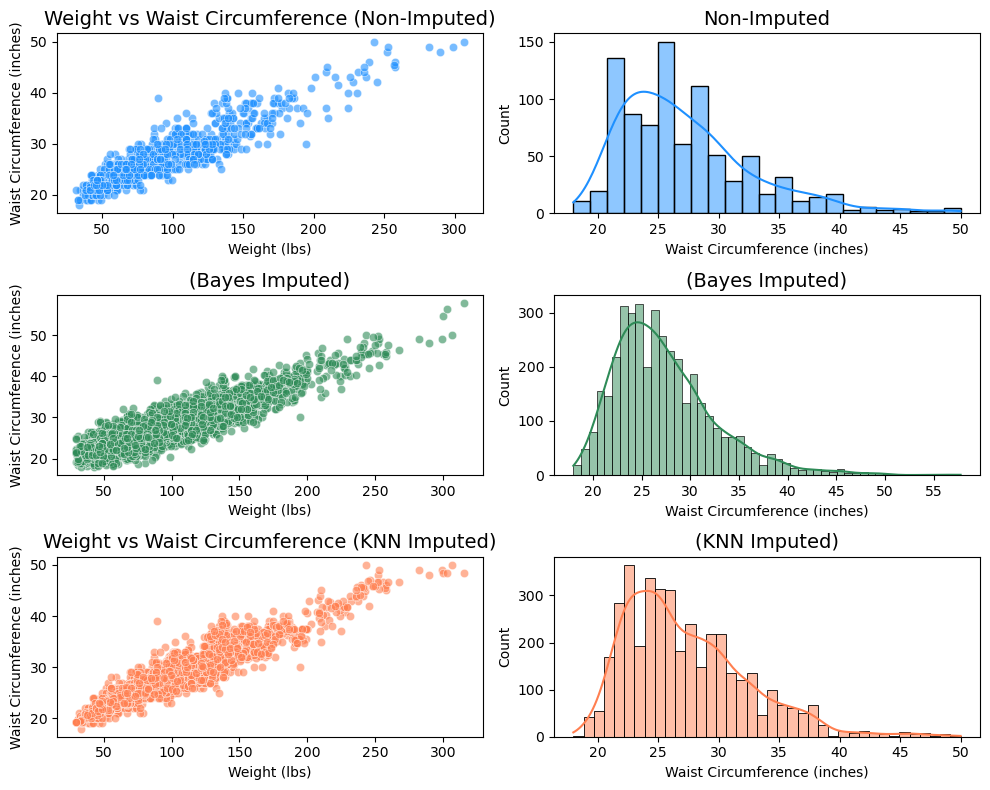

In [97]:
# Impute weight circumference
columns_to_impute = ['Basic_Demos-Age', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference']
data_for_imputation = train_df[columns_to_impute]

data_for_imputation_copy = data_for_imputation.copy()

data_for_mice_imputation = data_for_imputation_copy.copy()
data_for_knn_imputation = data_for_imputation_copy.copy()

# Iterative Imputer with Bayesian Ridge
mice_imputer = IterativeImputer(random_state=42, sample_posterior=True, max_iter=500, min_value=18)
data_imputed_bayes = mice_imputer.fit_transform(data_for_mice_imputation)
data_imputed_bayes_df = pd.DataFrame(data=data_imputed_bayes, columns=data_for_imputation.columns)

# Iterative Imputer with KNN
knn_estimator = KNeighborsRegressor(n_neighbors=5)
knn_imputer = IterativeImputer(estimator=knn_estimator, random_state=42, max_iter=500, min_value=18)
data_imputed_knn = knn_imputer.fit_transform(data_for_knn_imputation)
data_imputed_knn_df = pd.DataFrame(data=data_imputed_knn, columns=data_for_imputation.columns)

fig, axes = plt.subplots(3, 2, figsize=(10, 8))

sns.scatterplot(
    data=data_for_imputation_copy,
    x='Physical-Weight',
    y='Physical-Waist_Circumference',
    color='dodgerblue',
    alpha=0.6,
    ax=axes[0, 0]
)
axes[0, 0].set_title('Weight vs Waist Circumference (Non-Imputed)', fontsize=14)
axes[0, 0].set_xlabel('Weight (lbs)')
axes[0, 0].set_ylabel('Waist Circumference (inches)')

sns.histplot(
    data=data_for_imputation_copy,
    x='Physical-Waist_Circumference',
    kde=True,
    color='dodgerblue',
    ax=axes[0, 1]
)
axes[0, 1].set_title('Non-Imputed', fontsize=14)
axes[0, 1].set_xlabel('Waist Circumference (inches)')

# Bayes Imputed Data
sns.scatterplot(
    data=data_imputed_bayes_df,
    x='Physical-Weight',
    y='Physical-Waist_Circumference',
    color='seagreen',
    alpha=0.6,
    ax=axes[1, 0]
)
axes[1, 0].set_title('(Bayes Imputed)', fontsize=14)
axes[1, 0].set_xlabel('Weight (lbs)')
axes[1, 0].set_ylabel('Waist Circumference (inches)')

sns.histplot(
    data=data_imputed_bayes_df,
    x='Physical-Waist_Circumference',
    kde=True,
    color='seagreen',
    ax=axes[1, 1]
)
axes[1, 1].set_title('(Bayes Imputed)', fontsize=14)
axes[1, 1].set_xlabel('Waist Circumference (inches)')

# KNN Imputed Data
sns.scatterplot(
    data=data_imputed_knn_df,
    x='Physical-Weight',
    y='Physical-Waist_Circumference',
    color='coral',
    alpha=0.6,
    ax=axes[2, 0]
)
axes[2, 0].set_title('Weight vs Waist Circumference (KNN Imputed)', fontsize=14)
axes[2, 0].set_xlabel('Weight (lbs)')
axes[2, 0].set_ylabel('Waist Circumference (inches)')

sns.histplot(
    data=data_imputed_knn_df,
    x='Physical-Waist_Circumference',
    kde=True,
    color='coral',
    ax=axes[2, 1]
)
axes[2, 1].set_title('(KNN Imputed)', fontsize=14)
axes[2, 1].set_xlabel('Waist Circumference (inches)')

plt.tight_layout()
plt.show()

In [98]:
train_df.loc[:, 'Physical-Waist_Circumference'] = data_imputed_bayes_df['Physical-Waist_Circumference']

In [99]:
train_df['Physical-Diastolic_BP'].min()

11.0

/Users/armankhoshnevis/anaconda3/envs/FDS_Project/lib/python3.11/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



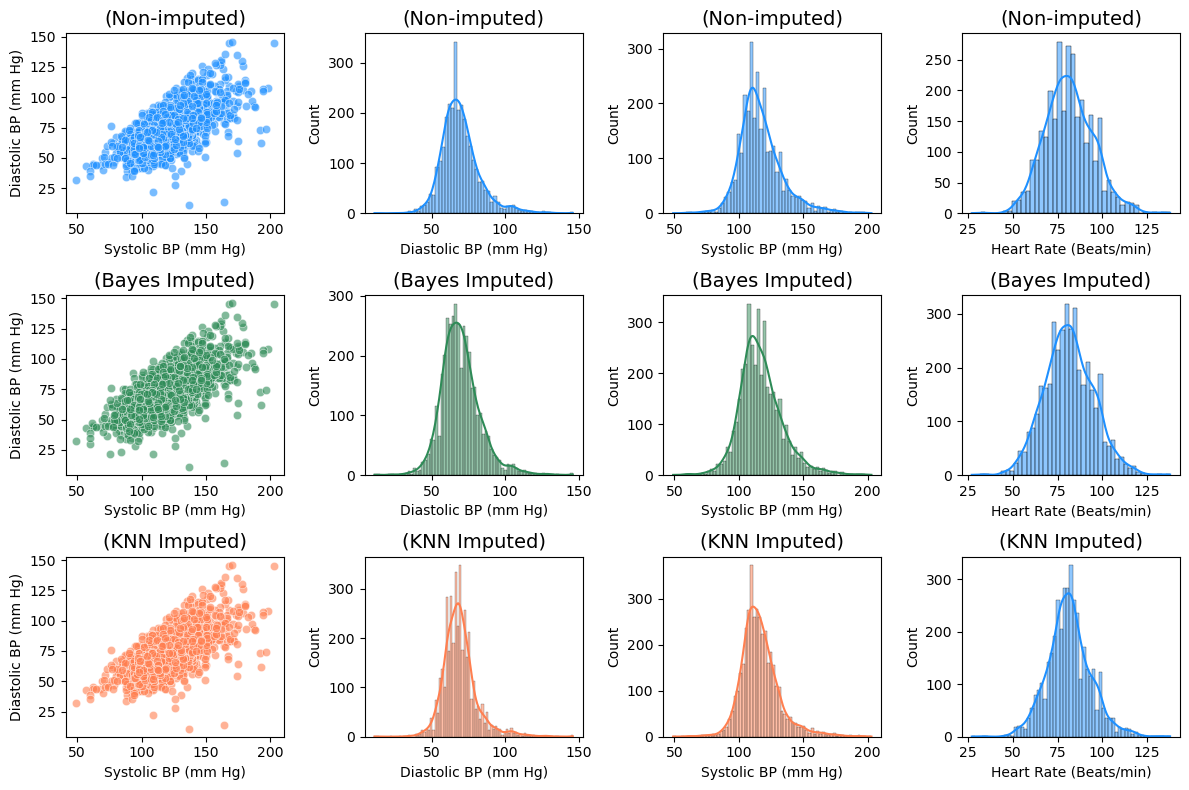

In [100]:
# Impute Systolic and Diastolic BP and Heart Rate
# Systolic-BP must be higher than Diastolic-BP!
condition = train_df['Physical-Diastolic_BP']>train_df['Physical-Systolic_BP']
train_df.loc[condition, ['Physical-Diastolic_BP', 'Physical-Systolic_BP']] = np.nan

bp_columns = ['Physical-Weight', 'Physical-Systolic_BP', 'Physical-Diastolic_BP', 'Physical-HeartRate']
data_for_imputation = train_df[bp_columns]

data_for_imputation_copy = data_for_imputation.copy()

bayes_imputer = IterativeImputer(random_state=42, sample_posterior=True, max_iter=500, min_value=10.0)
data_imputed_bayes = bayes_imputer.fit_transform(data_for_imputation_copy)
data_imputed_bayes_df = pd.DataFrame(data=data_imputed_bayes, columns=bp_columns)

knn_estimator = KNeighborsRegressor(n_neighbors=5)
knn_imputer = IterativeImputer(estimator=knn_estimator, random_state=42, max_iter=500, min_value=10.0)
data_imputed_knn = knn_imputer.fit_transform(data_for_imputation_copy)
data_imputed_knn_df = pd.DataFrame(data=data_imputed_knn, columns=bp_columns)

fig, axes = plt.subplots(3, 4, figsize=(12, 8))

sns.scatterplot(
    data=data_for_imputation_copy,
    x='Physical-Systolic_BP',
    y='Physical-Diastolic_BP',
    color='dodgerblue',
    alpha=0.6,
    ax=axes[0, 0]
)
axes[0, 0].set_title('(Non-imputed)', fontsize=14)
axes[0, 0].set_xlabel('Systolic BP (mm Hg)')
axes[0, 0].set_ylabel('Diastolic BP (mm Hg)')

sns.histplot(
    data=data_for_imputation_copy,
    x='Physical-Diastolic_BP',
    kde=True,
    color='dodgerblue',
    ax=axes[0, 1]
)
axes[0, 1].set_title('(Non-imputed)', fontsize=14)
axes[0, 1].set_xlabel('Diastolic BP (mm Hg)')

sns.histplot(
    data=data_for_imputation_copy,
    x='Physical-Systolic_BP',
    kde=True,
    color='dodgerblue',
    ax=axes[0, 2]
)
axes[0, 2].set_title('(Non-imputed)', fontsize=14)
axes[0, 2].set_xlabel('Systolic BP (mm Hg)')

sns.histplot(
    data=data_for_imputation_copy,
    x='Physical-HeartRate',
    kde=True,
    color='dodgerblue',
    ax=axes[0, 3]
)
axes[0, 3].set_title('(Non-imputed)', fontsize=14)
axes[0, 3].set_xlabel('Heart Rate (Beats/min)')

sns.scatterplot(
    data=data_imputed_bayes_df,
    x='Physical-Systolic_BP',
    y='Physical-Diastolic_BP',
    color='seagreen',
    alpha=0.6,
    ax=axes[1, 0]
)
axes[1, 0].set_title('(Bayes Imputed)', fontsize=14)
axes[1, 0].set_xlabel('Systolic BP (mm Hg)')
axes[1, 0].set_ylabel('Diastolic BP (mm Hg)')

sns.histplot(
    data=data_imputed_bayes_df,
    x='Physical-Diastolic_BP',
    kde=True,
    color='seagreen',
    ax=axes[1, 1]
)
axes[1, 1].set_title('(Bayes Imputed)', fontsize=14)
axes[1, 1].set_xlabel('Diastolic BP (mm Hg)')

sns.histplot(
    data=data_imputed_bayes_df,
    x='Physical-Systolic_BP',
    kde=True,
    color='seagreen',
    ax=axes[1, 2]
)
axes[1, 2].set_title('(Bayes Imputed)', fontsize=14)
axes[1, 2].set_xlabel('Systolic BP (mm Hg)')

sns.histplot(
    data=data_imputed_bayes_df,
    x='Physical-HeartRate',
    kde=True,
    color='dodgerblue',
    ax=axes[1, 3]
)
axes[1, 3].set_title('(Bayes Imputed)', fontsize=14)
axes[1, 3].set_xlabel('Heart Rate (Beats/min)')

sns.scatterplot(
    data=data_imputed_knn_df,
    x='Physical-Systolic_BP',
    y='Physical-Diastolic_BP',
    color='coral',
    alpha=0.6,
    ax=axes[2, 0]
)
axes[2, 0].set_title('(KNN Imputed)', fontsize=14)
axes[2, 0].set_xlabel('Systolic BP (mm Hg)')
axes[2, 0].set_ylabel('Diastolic BP (mm Hg)')

sns.histplot(
    data=data_imputed_knn_df,
    x='Physical-Diastolic_BP',
    kde=True,
    color='coral',
    ax=axes[2, 1]
)
axes[2, 1].set_title('(KNN Imputed)', fontsize=14)
axes[2, 1].set_xlabel('Diastolic BP (mm Hg)')

sns.histplot(
    data=data_imputed_knn_df,
    x='Physical-Systolic_BP',
    kde=True,
    color='coral',
    ax=axes[2, 2]
)
axes[2, 2].set_title('(KNN Imputed)', fontsize=14)
axes[2, 2].set_xlabel('Systolic BP (mm Hg)')


sns.histplot(
    data=data_imputed_knn_df,
    x='Physical-HeartRate',
    kde=True,
    color='dodgerblue',
    ax=axes[2, 3]
)
axes[2, 3].set_title('(KNN Imputed)', fontsize=14)
axes[2, 3].set_xlabel('Heart Rate (Beats/min)')

plt.tight_layout()
plt.show()

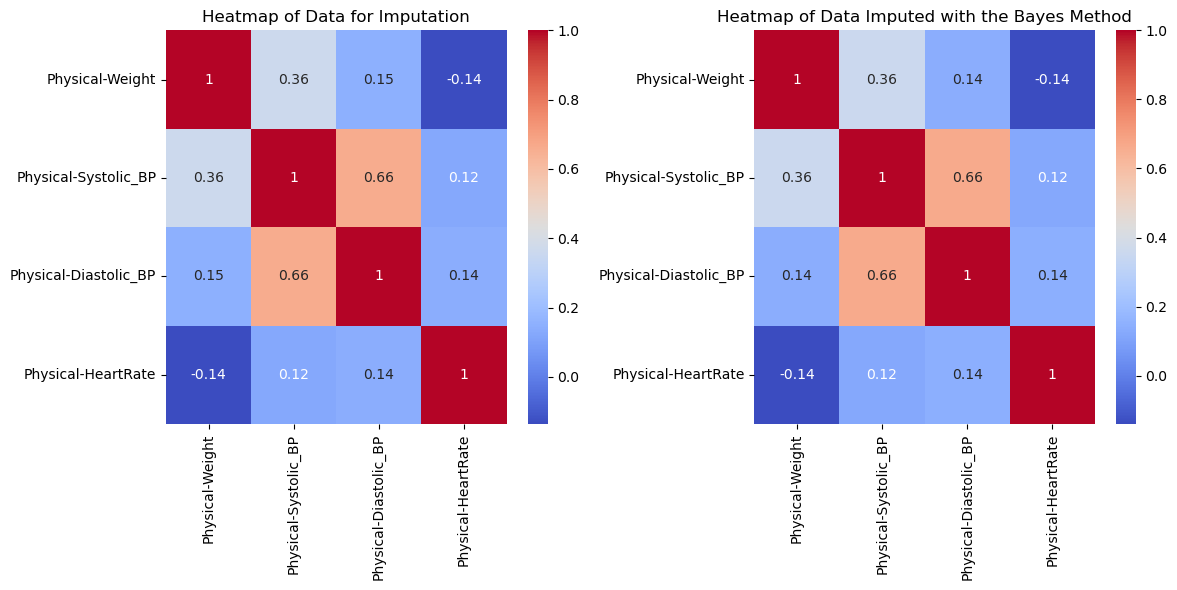

In [101]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.heatmap(data_for_imputation.corr(), annot=True, cmap='coolwarm', ax=axes[0])
axes[0].set_title('Heatmap of Data for Imputation')

sns.heatmap(data_imputed_bayes_df.corr(), annot=True, cmap='coolwarm', ax=axes[1])
axes[1].set_title('Heatmap of Data Imputed with the Bayes Method')

plt.tight_layout()
plt.show()

In [102]:
train_df.loc[:, ['Physical-Systolic_BP', 'Physical-Diastolic_BP', 'Physical-HeartRate']] = data_imputed_knn_df[['Physical-Systolic_BP', 'Physical-Diastolic_BP', 'Physical-HeartRate']]

Dropping BIA-related columns because:
- Roughly half of the data is missing.
- std of most of the features are two or three times greater than their corresponding mean value.
- Most of them have extreme min or max values.
- Most of them have a very skewed distribution.

In [103]:
BIA_columns = ['BIA-BIA_BMC', 'BIA-BIA_BMI', 'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM', 'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST', 'BIA-BIA_SMM', 'BIA-BIA_TBW', 'BIA-BIA_Frame_num', 'BIA-BIA_Activity_Level_num']
train_df.drop(columns=BIA_columns, inplace=True)

<Axes: >

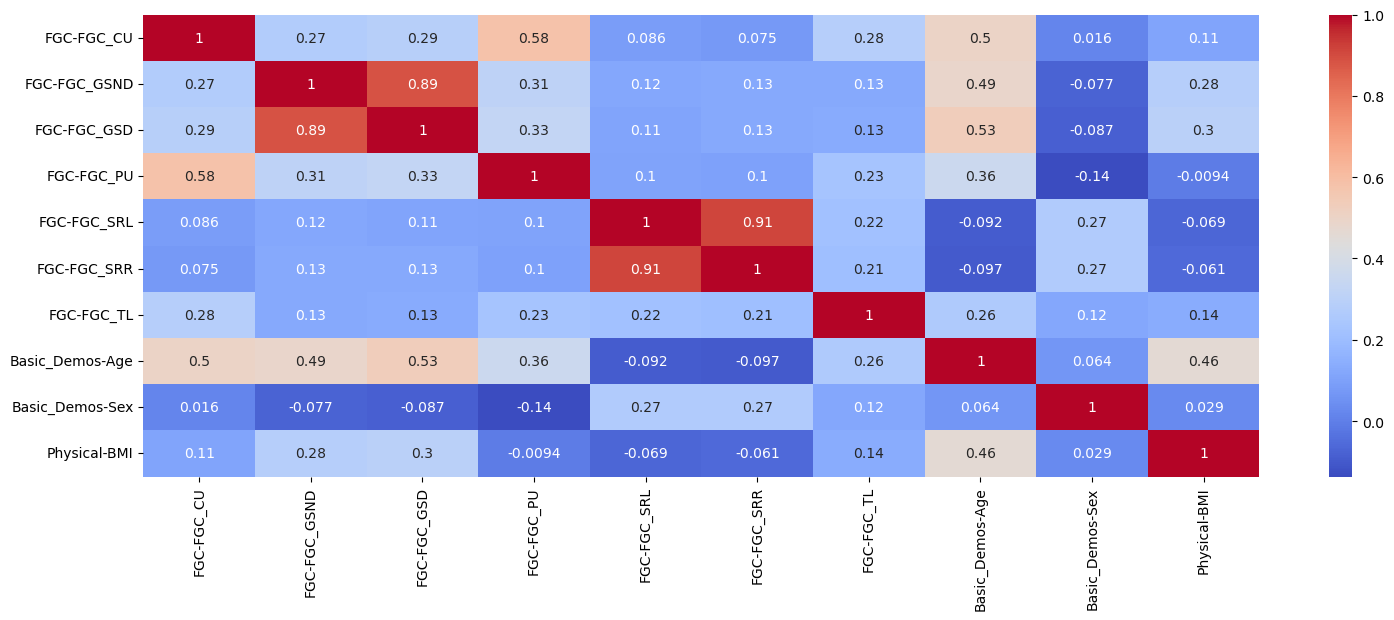

In [104]:
FGC_columns = ['FGC-FGC_CU', 'FGC-FGC_GSND', 'FGC-FGC_GSD', 'FGC-FGC_PU', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_TL']
# other_columns= ['Physical-BMI', 'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP']
other_columns = ['Basic_Demos-Age', 'Basic_Demos-Sex', 'Physical-BMI']
plt.figure(figsize=(18, 6))
sns.heatmap(train_df[FGC_columns + other_columns].corr(), annot=True, cmap='coolwarm')

In [105]:
# Columns to impute
FGC_columns = ['FGC-FGC_CU', 'FGC-FGC_GSND', 'FGC-FGC_GSD', 'FGC-FGC_PU', 'FGC-FGC_SRL', 'FGC-FGC_SRR', 'FGC-FGC_TL']
auxiliary_features = ['Basic_Demos-Age', 'Basic_Demos-Sex', 'Physical-BMI']

# Create a dataset for imputation
columns_to_impute = FGC_columns + auxiliary_features
data_for_imputation = train_df[columns_to_impute].copy()

# Left-skewed columns: Using KNN Imputer within Iterative Imputer
knn_estimator = KNeighborsRegressor(n_neighbors=5)
knn_imputer = IterativeImputer(estimator=knn_estimator, random_state=42, max_iter=500)

# Normally distributed columns: Using Bayesian Ridge within Iterative Imputer
bayesian_ridge_imputer = IterativeImputer(random_state=42, max_iter=500)

# Split data for different imputations
left_skewed_columns = ['FGC-FGC_CU', 'FGC-FGC_GSND', 'FGC-FGC_GSD', 'FGC-FGC_PU']
normal_columns = ['FGC-FGC_TL', 'FGC-FGC_SRL', 'FGC-FGC_SRR']

# Impute left-skewed columns
data_for_left_skewed = data_for_imputation[left_skewed_columns + auxiliary_features]
data_imputed_knn = knn_imputer.fit_transform(data_for_left_skewed)
data_imputed_knn_df = pd.DataFrame(data=data_imputed_knn, columns=left_skewed_columns + auxiliary_features)

# Impute normally distributed columns
data_for_normal = data_for_imputation[normal_columns + auxiliary_features]
data_imputed_bayesian = bayesian_ridge_imputer.fit_transform(data_for_normal)
data_imputed_bayesian_df = pd.DataFrame(data=data_imputed_bayesian, columns=normal_columns + auxiliary_features)

/Users/armankhoshnevis/anaconda3/envs/FDS_Project/lib/python3.11/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning:

[IterativeImputer] Early stopping criterion not reached.



In [106]:
train_df.loc[:, left_skewed_columns] = data_imputed_knn_df[left_skewed_columns]
train_df.loc[:, normal_columns] = data_imputed_bayesian_df[normal_columns]

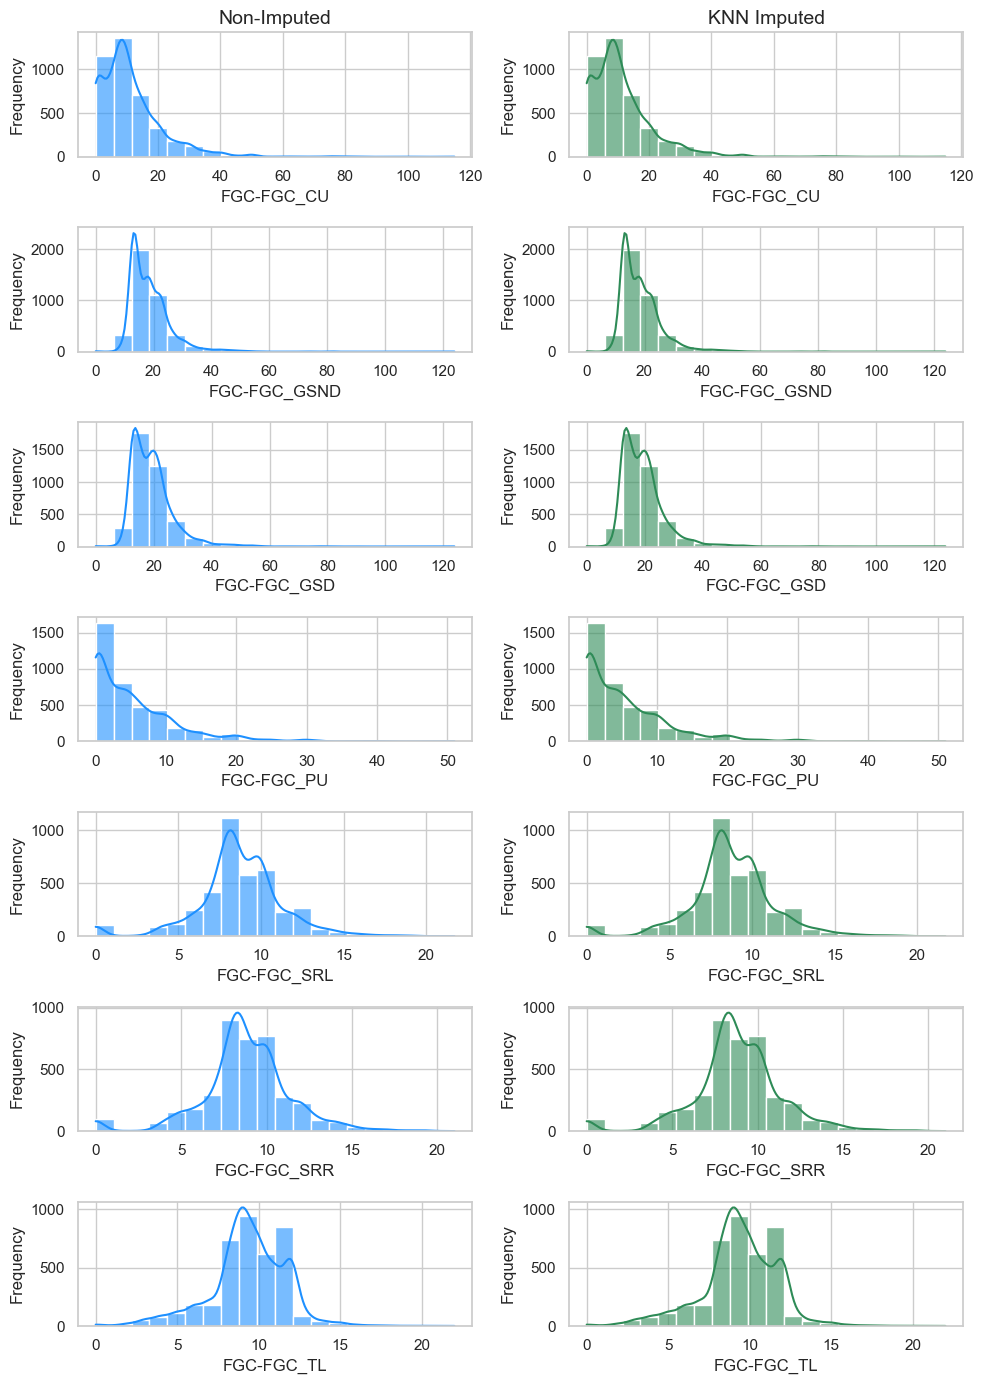

In [107]:
# Plot the histograms for comparison
sns.set(style="whitegrid")
fig, axes = plt.subplots(len(FGC_columns), 2, figsize=(10, 2* len(FGC_columns)))

for i, column in enumerate(FGC_columns):
    # Un-imputed data histogram
    sns.histplot(
        train_df[column].dropna(), 
        kde=True, color='dodgerblue', alpha=0.6, bins=20, ax=axes[i, 0]
    )
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')
    
    # Imputed data histogram
    sns.histplot(
        train_df[column],
        kde=True, color='seagreen', alpha=0.6, bins=20, ax=axes[i, 1]
    )
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Frequency')

axes[0, 0].set_title('Non-Imputed', fontsize=14)
axes[0, 1].set_title('KNN Imputed', fontsize=14)

# Adjust layout for better spacing between subplots
plt.tight_layout()
plt.show()

In [108]:
train_df_imputed_internet = train_df[['PreInt_EduHx-computerinternet_hoursday', 'sii']].copy()
internet_use_col = 'PreInt_EduHx-computerinternet_hoursday'
sii_col = 'sii'
sii_unique_values = train_df_imputed_internet[sii_col].dropna().unique()
sii_group_data = train_df_imputed_internet[train_df_imputed_internet[sii_col] == sii_unique_values[0]]


In [109]:
import pandas as pd

# Create a copy of the train_df to preserve original data
train_df_imputed_mode = train_df.copy()

# Column names
internet_use_col = 'PreInt_EduHx-computerinternet_hoursday'
sii_col = 'sii'

# Loop through each unique sii value, excluding NaN
for sii_value in train_df_imputed_mode[sii_col].dropna().unique():
    # Filter the data for the specific sii group
    sii_group_data = train_df_imputed_mode[train_df_imputed_mode[sii_col] == sii_value]
    
    # Calculate the mode of internet use within this sii group
    if not sii_group_data[internet_use_col].dropna().empty:  # Check if non-missing values are available
        mode_value = sii_group_data[internet_use_col].mode().iloc[0]  # Get the mode value
        
        # Get indices of the missing values for the current sii group
        missing_indices = sii_group_data[sii_group_data[internet_use_col].isna()].index

        # Impute missing values with the mode value
        train_df_imputed_mode.loc[missing_indices, internet_use_col] = mode_value

# After looping through each sii group, handle any remaining missing values globally
remaining_missing_indices = train_df_imputed_mode[train_df_imputed_mode[internet_use_col].isna()].index

if len(remaining_missing_indices) > 0:
    # Calculate the mode for the entire column (excluding NaN)
    overall_mode = train_df_imputed_mode[internet_use_col].mode().iloc[0]
    
    # Impute remaining missing values with the overall mode
    train_df_imputed_mode.loc[remaining_missing_indices, internet_use_col] = overall_mode

# Verify that the missing values have been imputed
print(train_df_imputed_mode[internet_use_col].isna().sum())


0


In [110]:
# Define the new labels mapping
label_mapping = {0: '<1hr/day', 1: '~1hr/day', 2: '~2hr/day', 3: '~3hr/day'}

# Data preparation
stats = train_df_imputed_mode.groupby(['sii', 'PreInt_EduHx-computerinternet_hoursday'], observed=True).size().unstack(fill_value=0)

# Creating a subplot with 1 row and as many columns as sii categories
fig = make_subplots(
    rows=1, cols=len(stats.index),
    subplot_titles=[f'SII = {sii}' for sii in stats.index],
    specs=[[{'type': 'pie'} for _ in range(len(stats.index))]],
    horizontal_spacing=0.1
)

# Loop through each SII group and add a pie chart in the correct subplot position
for i, sii_group in enumerate(stats.index):
    group_counts = stats.loc[sii_group] / stats.loc[sii_group].sum()
    updated_labels = [label_mapping.get(label, label) for label in group_counts.index]  # Map the labels
    fig.add_trace(
        go.Pie(
            labels=updated_labels,  # Use updated labels
            values=group_counts,
            textinfo='percent+label',
            marker=dict(colors=px.colors.qualitative.Set1[1:5]),
            hole=0  # Adjust if you prefer a donut chart
        ),
        row=1, col=i + 1
    )

# Update layout for titles and figure size
fig.update_layout(
    title_text="Distribution of Hours of Internet Use by SII Group",
    width=1000,
    showlegend=False
)

fig.show()

In [111]:
train_df['PreInt_EduHx-computerinternet_hoursday'] = train_df_imputed_mode['PreInt_EduHx-computerinternet_hoursday']

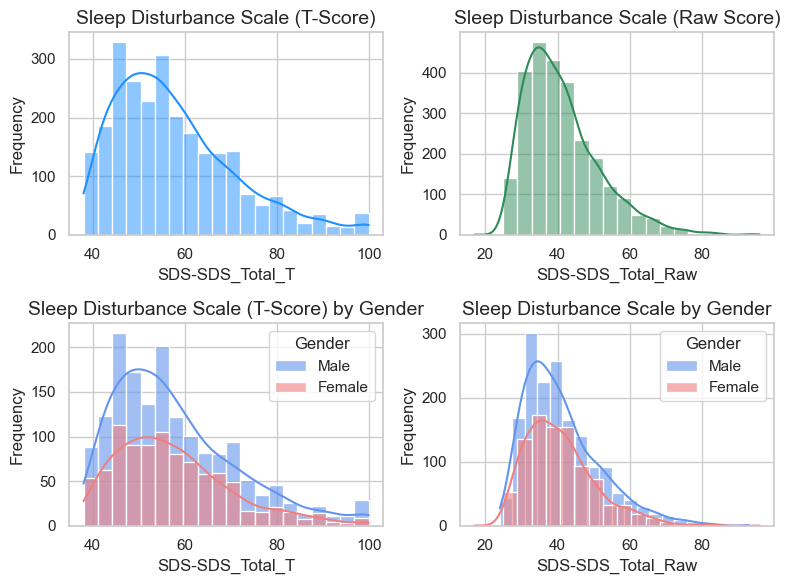

In [112]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(8, 6))

sds_total_t_col = 'SDS-SDS_Total_T'
sds_total_raw_col = 'SDS-SDS_Total_Raw'

sns.histplot(
    train_df[sds_total_t_col].dropna(), 
    bins=20, kde=True, color='dodgerblue', ax=axes[0, 0]
)
axes[0, 0].set_title('Sleep Disturbance Scale (T-Score)', fontsize=14)
axes[0, 0].set_xlabel('SDS-SDS_Total_T')
axes[0, 0].set_ylabel('Frequency')

sns.histplot(
    train_df[sds_total_raw_col].dropna(), 
    bins=20, kde=True, color='seagreen', ax=axes[0, 1]
)
axes[0, 1].set_title('Sleep Disturbance Scale (Raw Score)', fontsize=14)
axes[0, 1].set_xlabel('SDS-SDS_Total_Raw')
axes[0, 1].set_ylabel('Frequency')

male_data = train_df[train_df['Basic_Demos-Sex'] == 0]
female_data = train_df[train_df['Basic_Demos-Sex'] == 1]

sns.histplot(
    male_data[sds_total_t_col].dropna(), 
    bins=20, kde=True, color='cornflowerblue', label='Male', ax=axes[1, 0], alpha=0.6
)
sns.histplot(
    female_data[sds_total_t_col].dropna(), 
    bins=20, kde=True, color='lightcoral', label='Female', ax=axes[1, 0], alpha=0.6
)
axes[1, 0].set_title('Sleep Disturbance Scale (T-Score) by Gender', fontsize=14)
axes[1, 0].set_xlabel('SDS-SDS_Total_T')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend(title='Gender')

sns.histplot(
    male_data[sds_total_raw_col].dropna(), 
    bins=20, kde=True, color='cornflowerblue', label='Male', ax=axes[1, 1], alpha=0.6
)
sns.histplot(
    female_data[sds_total_raw_col].dropna(), 
    bins=20, kde=True, color='lightcoral', label='Female', ax=axes[1, 1], alpha=0.6
)
axes[1, 1].set_title('Sleep Disturbance Scale by Gender', fontsize=14)
axes[1, 1].set_xlabel('SDS-SDS_Total_Raw')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend(title='Gender')

plt.tight_layout()
plt.show()

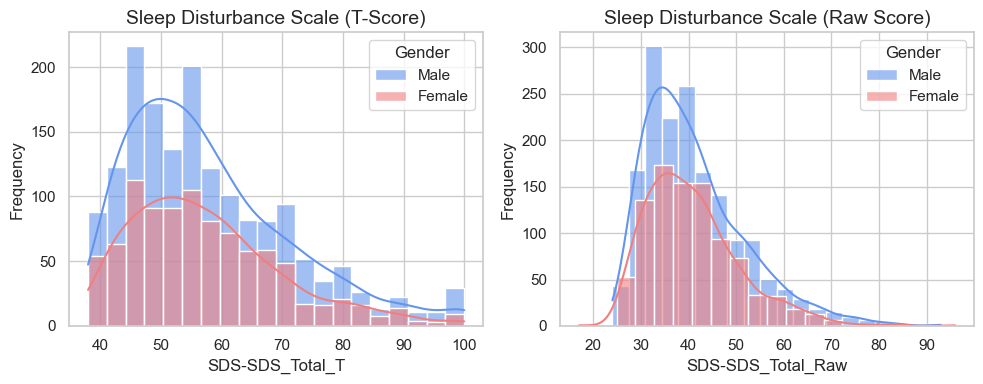

In [113]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sds_total_t_col = 'SDS-SDS_Total_T'
sds_total_raw_col = 'SDS-SDS_Total_Raw'

male_data = train_df[train_df['Basic_Demos-Sex'] == 0]
female_data = train_df[train_df['Basic_Demos-Sex'] == 1]

sns.histplot(
    male_data[sds_total_t_col].dropna(), 
    bins=20, kde=True, color='cornflowerblue', label='Male', ax=axes[0], alpha=0.6
)
sns.histplot(
    female_data[sds_total_t_col].dropna(), 
    bins=20, kde=True, color='lightcoral', label='Female', ax=axes[0], alpha=0.6
)
axes[0].set_title('Sleep Disturbance Scale (T-Score)', fontsize=14)
axes[0].set_xlabel('SDS-SDS_Total_T')
axes[0].set_ylabel('Frequency')
axes[0].legend(title='Gender')

sns.histplot(
    male_data[sds_total_raw_col].dropna(), 
    bins=20, kde=True, color='cornflowerblue', label='Male', ax=axes[1], alpha=0.6
)
sns.histplot(
    female_data[sds_total_raw_col].dropna(), 
    bins=20, kde=True, color='lightcoral', label='Female', ax=axes[1], alpha=0.6
)
axes[1].set_title('Sleep Disturbance Scale (Raw Score)', fontsize=14)
axes[1].set_xlabel('SDS-SDS_Total_Raw')
axes[1].set_ylabel('Frequency')
axes[1].legend(title='Gender')

plt.tight_layout()
plt.show()

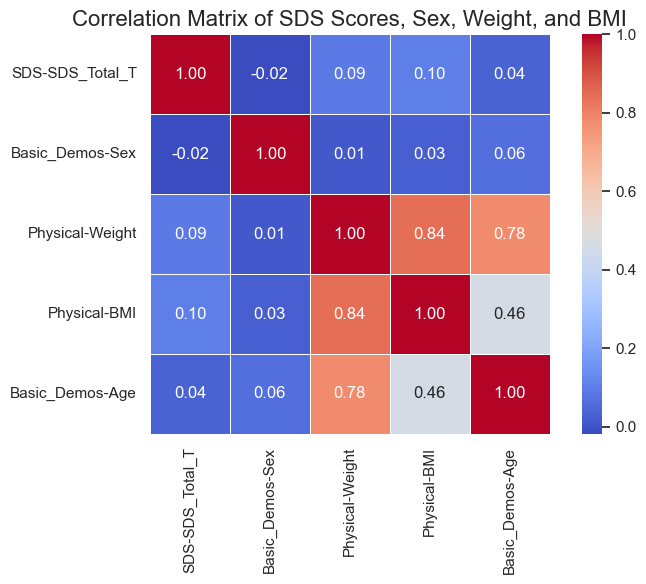

In [114]:
correlation_columns = [
    'SDS-SDS_Total_T', 'Basic_Demos-Sex', 'Physical-Weight', 'Physical-BMI', 'Basic_Demos-Age'
]

correlation_df = train_df[correlation_columns].copy()

correlation_matrix = correlation_df.corr()

sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
sns.heatmap(
    correlation_matrix, 
    annot=True, fmt=".2f", cmap="coolwarm", cbar=True,
    linewidths=0.5, linecolor='white', square=True
)
plt.title('Correlation Matrix of SDS Scores, Sex, Weight, and BMI', fontsize=16)
plt.tight_layout()
plt.show()

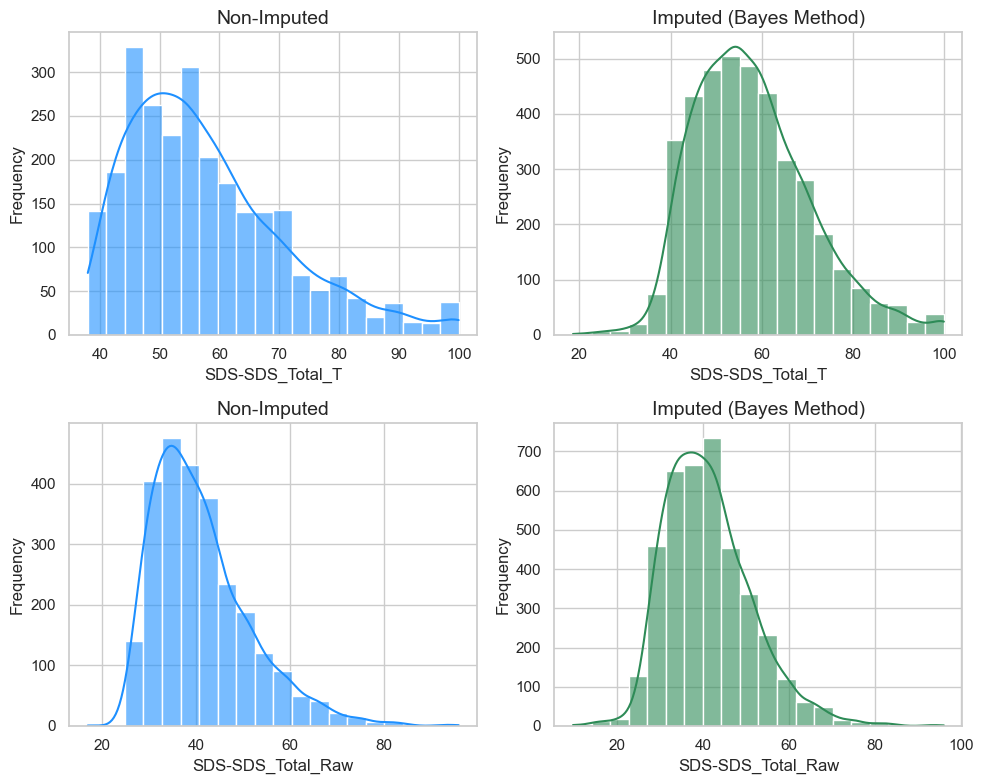

In [115]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import BayesianRidge

sds_columns = ['SDS-SDS_Total_T', 'SDS-SDS_Total_Raw']
auxiliary_features = ['Physical-BMI']

columns_to_impute = sds_columns + auxiliary_features
data_for_imputation = train_df[columns_to_impute].copy()

imputer = IterativeImputer(
    estimator=BayesianRidge(),
    random_state=42,
    sample_posterior=True,
    max_iter=100
)

data_imputed = imputer.fit_transform(data_for_imputation)
data_imputed_df = pd.DataFrame(data=data_imputed, columns=data_for_imputation.columns)

train_df_imputed = train_df.copy()
train_df_imputed[sds_columns] = data_imputed_df[sds_columns]

sns.set(style="whitegrid")
fig, axes = plt.subplots(len(sds_columns), 2, figsize=(10, 8))

for i, column in enumerate(sds_columns):
    # Original Data
    sns.histplot(
        train_df[column].dropna(),
        kde=True, color='dodgerblue', alpha=0.6, bins=20, ax=axes[i, 0]
    )
    axes[i, 0].set_title('Non-Imputed', fontsize=14)
    axes[i, 0].set_xlabel(column)
    axes[i, 0].set_ylabel('Frequency')
    
    # Imputed Data
    sns.histplot(
        train_df_imputed[column],
        kde=True, color='seagreen', alpha=0.6, bins=20, ax=axes[i, 1]
    )
    axes[i, 1].set_title('Imputed (Bayes Method)', fontsize=14)
    axes[i, 1].set_xlabel(column)
    axes[i, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [116]:
train_df[sds_columns] = train_df_imputed[sds_columns]

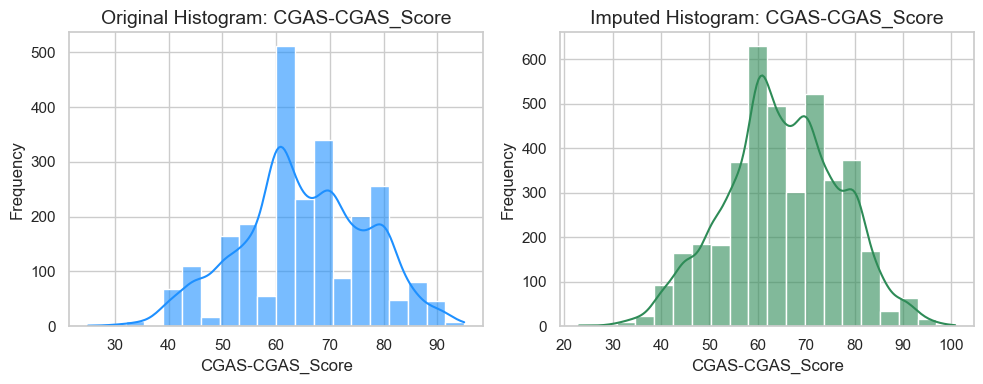

In [117]:
cgas_column = ['CGAS-CGAS_Score']

auxiliary_features = ['Basic_Demos-Age', 'Physical-BMI', 'Physical-Weight']

columns_to_impute = cgas_column + auxiliary_features
data_for_imputation = train_df[columns_to_impute].copy()

cgas_min_value = data_for_imputation[cgas_column].min().iloc[0]
cgas_max_value = data_for_imputation[cgas_column].max().iloc[0]

imputer = IterativeImputer(
    estimator=BayesianRidge(),
    random_state=42,
    sample_posterior=True,
    max_iter=100,
    min_value=cgas_min_value * 0.8,
    max_value=cgas_max_value * 1.1
)

data_imputed = imputer.fit_transform(data_for_imputation)
data_imputed_df = pd.DataFrame(data=data_imputed, columns=data_for_imputation.columns)

train_df_imputed = train_df.copy()
train_df_imputed[cgas_column] = data_imputed_df[cgas_column]

sns.set(style="whitegrid")
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(
    train_df[cgas_column[0]].dropna(),
    kde=True, color='dodgerblue', alpha=0.6, bins=20, ax=axes[0]
)
axes[0].set_title(f'Original Histogram: {cgas_column[0]}', fontsize=14)
axes[0].set_xlabel(cgas_column[0])
axes[0].set_ylabel('Frequency')

sns.histplot(
    train_df_imputed[cgas_column[0]],
    kde=True, color='seagreen', alpha=0.6, bins=20, ax=axes[1]
)
axes[1].set_title(f'Imputed Histogram: {cgas_column[0]}', fontsize=14)
axes[1].set_xlabel(cgas_column[0])
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [118]:
train_df['CGAS-CGAS_Score'] = train_df_imputed['CGAS-CGAS_Score']

In [121]:
train_df.drop(columns=['PAQ_C-PAQ_C_Total', 'PAQ_A-PAQ_A_Total', 
                      'Fitness_Endurance-Max_Stage', 'Fitness_Endurance-Total_Time_Sec'], inplace=True)

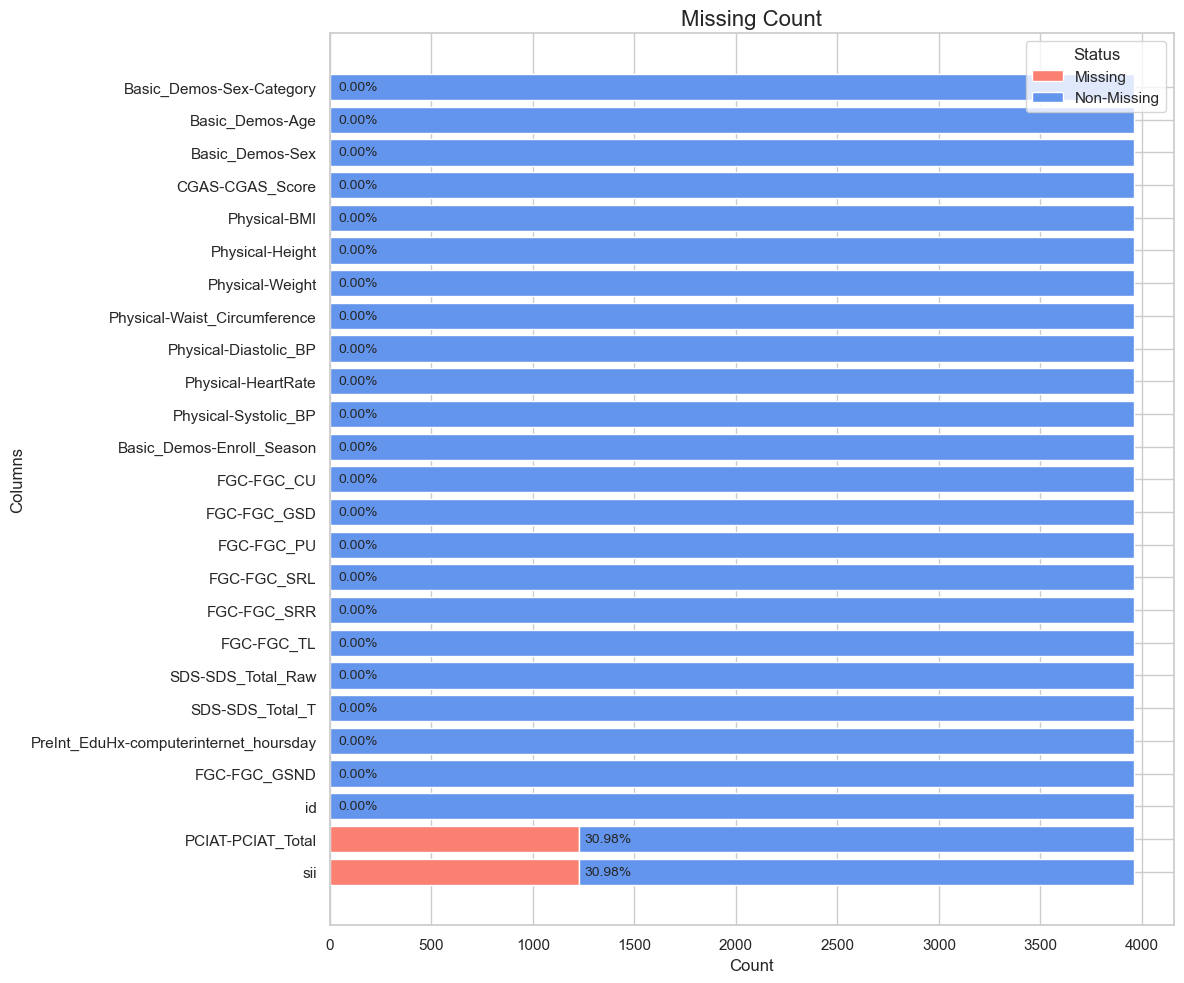

In [122]:
# Assuming train_df is already defined
missing_data = train_df.isnull().sum()
non_missing_data = train_df.notnull().sum()

missingness_df = pd.DataFrame({
    "Column": train_df.columns,
    "Missing Count": missing_data,
    "Non-Missing Count": non_missing_data,
    "Total Count": missing_data + non_missing_data,
}).sort_values(by="Missing Count", ascending=False)

plt.figure(figsize=(12, 10))
for i, column in enumerate(missingness_df['Column']):
    missing_count = missingness_df['Missing Count'].iloc[i]
    non_missing_count = missingness_df['Non-Missing Count'].iloc[i]
    total_count = missingness_df['Total Count'].iloc[i]

    # Plot the bars
    plt.barh(column, missing_count, color='salmon', label='Missing' if i == 0 else "")
    plt.barh(column, non_missing_count, left=missing_count, color='cornflowerblue', label='Non-Missing' if i == 0 else "")

    # Calculate and annotate missing percentage
    missing_percentage = (missing_count / total_count) * 100
    plt.text(missing_count + non_missing_count * 0.01, i, f"{missing_percentage:.2f}%", va='center', ha='left', fontsize=10)

plt.title("Missing Count", fontsize=16)
plt.xlabel("Count", fontsize=12)
plt.ylabel("Columns", fontsize=12)
plt.legend(title="Status")
plt.tight_layout()
plt.show()

In [125]:
train_df.dropna(subset=['sii', 'PCIAT-PCIAT_Total'], inplace=True)

In [ ]:
train_df.shape

(2733, 25)

In [127]:
train_df.head()

id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0  00008ff9                      Fall                5                0   
1  000fd460                    Summer                9                0   
2  00105258                    Summer               10                1   
3  00115b9f                    Winter                9                0   
5  001f3379                    Spring               13                1   

   CGAS-CGAS_Score  Physical-BMI  Physical-Height  Physical-Weight  \
0        51.000000     16.878972             46.0             50.8   
1        63.225548     14.036968             48.0             46.0   
2        71.000000     16.650330             56.5             75.6   
3        71.000000     18.294143             56.0             81.6   
5        50.000000     22.282139             59.5            112.2   

   Physical-Waist_Circumference  Physical-Diastolic_BP  Physical-HeartRate  \
0                     24.565675                   61.2                84.4   
1                     22.000000                   75.0                70.0   
2                     22.074960                   65.0                94.0   
3                     24.331448                   60.0                97.0   
5                     30.968808                   60.0                73.0   

   Physical-Systolic_BP  FGC-FGC_CU  FGC-FGC_GSND  FGC-FGC_GSD  FGC-FGC_PU  \
0                 107.8         0.0         12.90        12.62         0.0   
1                 122.0         3.0         13.52        13.20         5.0   
2                 117.0        20.0         10.20        14.70         7.0   
3                 117.0        18.0         19.58        21.74         5.0   
5                 102.0        12.0         16.50        17.90         6.0   

   FGC-FGC_SRL  FGC-FGC_SRR  FGC-FGC_TL  PCIAT-PCIAT_Total  SDS-SDS_Total_Raw  \
0          7.0          6.0         6.0               55.0          36.521592   
1         11.0         11.0         3.0                0.0          46.000000   
2         10.0         10.0         5.0               28.0          38.000000   
3          7.0          7.0         7.0               44.0          31.000000   
5         10.0         11.0         8.0               34.0          40.000000   

   SDS-SDS_Total_T  PreInt_EduHx-computerinternet_hoursday  sii  \
0        53.386029                                     3.0  2.0   
1        64.000000                                     0.0  0.0   
2        54.000000                                     2.0  0.0   
3        45.000000                                     0.0  1.0   
5        56.000000                                     0.0  1.0   

  Basic_Demos-Sex-Category  
0                     Male  
1                     Male  
2                   Female  
3                     Male  
5                   Female

In [ ]:
train_df.drop(columns=['Basic_Demos-Enroll_Season'], inplace=True)

In [132]:
train_df.drop(columns=['Basic_Demos-Sex-Category'], inplace=True)

In [133]:
train_df.head()

id  Basic_Demos-Age  Basic_Demos-Sex  CGAS-CGAS_Score  Physical-BMI  \
0  00008ff9                5                0        51.000000     16.878972   
1  000fd460                9                0        63.225548     14.036968   
2  00105258               10                1        71.000000     16.650330   
3  00115b9f                9                0        71.000000     18.294143   
5  001f3379               13                1        50.000000     22.282139   

   Physical-Height  Physical-Weight  Physical-Waist_Circumference  \
0             46.0             50.8                     24.565675   
1             48.0             46.0                     22.000000   
2             56.5             75.6                     22.074960   
3             56.0             81.6                     24.331448   
5             59.5            112.2                     30.968808   

   Physical-Diastolic_BP  Physical-HeartRate  Physical-Systolic_BP  \
0                   61.2                84.4                 107.8   
1                   75.0                70.0                 122.0   
2                   65.0                94.0                 117.0   
3                   60.0                97.0                 117.0   
5                   60.0                73.0                 102.0   

   FGC-FGC_CU  FGC-FGC_GSND  FGC-FGC_GSD  FGC-FGC_PU  FGC-FGC_SRL  \
0         0.0         12.90        12.62         0.0          7.0   
1         3.0         13.52        13.20         5.0         11.0   
2        20.0         10.20        14.70         7.0         10.0   
3        18.0         19.58        21.74         5.0          7.0   
5        12.0         16.50        17.90         6.0         10.0   

   FGC-FGC_SRR  FGC-FGC_TL  PCIAT-PCIAT_Total  SDS-SDS_Total_Raw  \
0          6.0         6.0               55.0          36.521592   
1         11.0         3.0                0.0          46.000000   
2         10.0         5.0               28.0          38.000000   
3          7.0         7.0               44.0          31.000000   
5         11.0         8.0               34.0          40.000000   

   SDS-SDS_Total_T  PreInt_EduHx-computerinternet_hoursday  sii  
0        53.386029                                     3.0  2.0  
1        64.000000                                     0.0  0.0  
2        54.000000                                     2.0  0.0  
3        45.000000                                     0.0  1.0  
5        56.000000                                     0.0  1.0

In [134]:
train_df.to_csv('train_df_cleaned.csv')